In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox, shapiro

In [263]:
df = pd.read_csv("database/casks_database__casks_valuation_2.csv")

In [264]:
df.describe()

strength         rla  bulk_litres         age  \
count  556.000000  552.000000   554.000000  468.000000   
mean    59.970081  100.976322   172.475925   14.170705   
std      6.276445   49.128171    76.566902    8.487764   
min     32.800000   17.000000    29.410000    0.650000   
25%     56.975000   70.617500   132.512500    7.500000   
50%     60.900000   96.760000   164.100000   12.005000   
75%     63.600000  119.532500   196.000000   20.000000   
max     71.260000  317.660000   511.330000   38.000000   

       bottles_at_cask_strength  volume_12m   volume_6m   volume_3m  \
count                554.000000  562.000000  562.000000  562.000000   
mean                 246.394329   74.866548   40.325623   20.656584   
std                  109.381330   34.651949   21.637320   12.687294   
min                   42.010000    0.000000    0.000000    0.000000   
25%                  189.302500   41.000000   21.000000    9.000000   
50%                  234.430000   84.000000   42.000000   23.000000   
75%                  280.000000   99.000000   61.000000   28.000000   
max                  730.470000  134.000000   87.000000   46.000000   

       inf_adj_hammer_price  inf_adj_hammer_price_per_bottle_at_cask_strength  \
count          5.620000e+02                                        554.000000   
mean           1.893175e+04                                         82.969585   
std            5.562210e+04                                        188.503325   
min            2.571900e+02                                          1.040000   
25%            3.118480e+03                                         13.287500   
50%            5.749270e+03                                         27.805000   
75%            1.656492e+04                                         66.047500   
max            1.064269e+06                                       1991.930000   

       inf_adj_hammer_price_per_litre_of_alcohol  \
count                                 552.000000   
mean                                  248.525797   
std                                   623.285863   
min                                     2.300000   
25%                                    29.232500   
50%                                    66.740000   
75%                                   168.057500   
max                                  6105.910000   

       inf_adj_hammer_price_per_litre_of_alcohol_per_age  \
count                                         461.000000   
mean                                           14.156746   
std                                            22.629892   
min                                             0.260000   
25%                                             4.980000   
50%                                             7.750000   
75%                                            13.310000   
max                                           210.330000   

       inf_adj_hammer_price_per_age  
count                    468.000000  
mean                    1138.136624  
std                     1875.216278  
min                       28.580000  
25%                      418.450000  
50%                      712.550000  
75%                     1201.225000  
max                    31019.200000

# Exploring numerical X variables

In [265]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if 'hammer_price' not in col]

strength


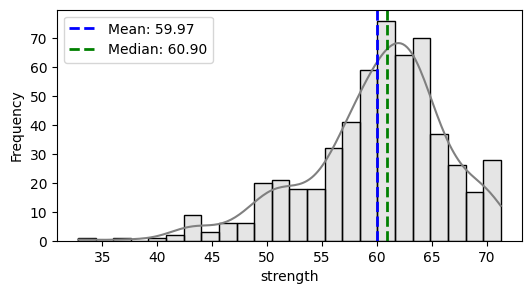

rla


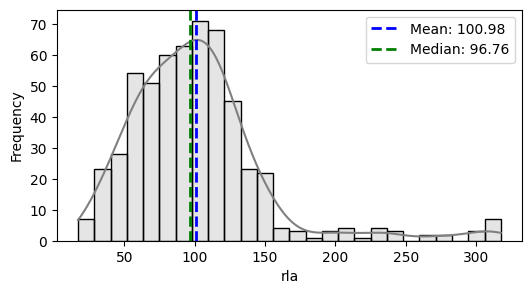

bulk_litres


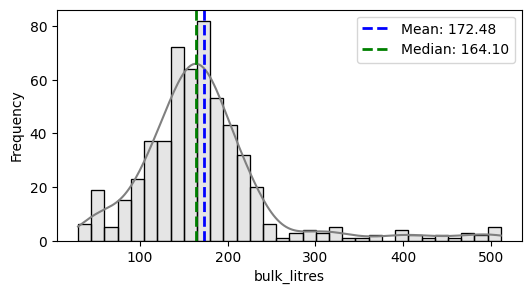

age


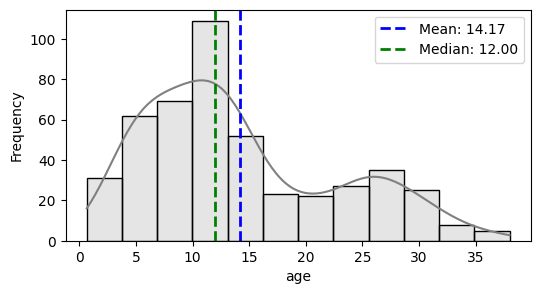

bottles_at_cask_strength


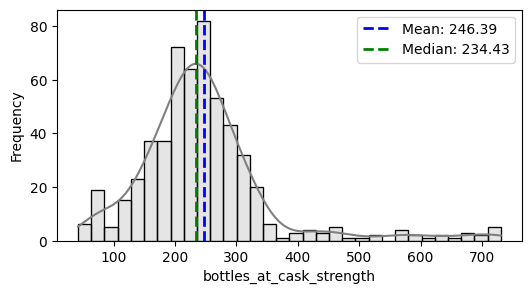

volume_12m


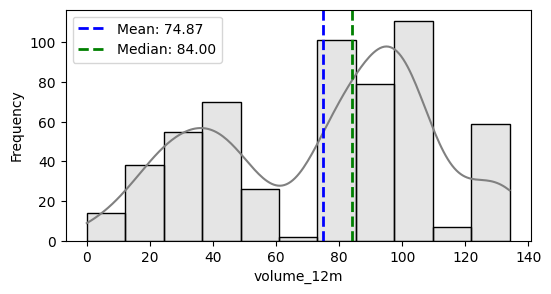

volume_6m


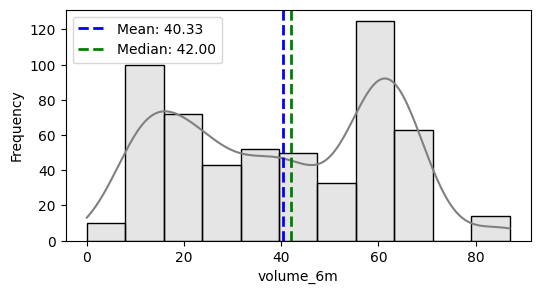

volume_3m


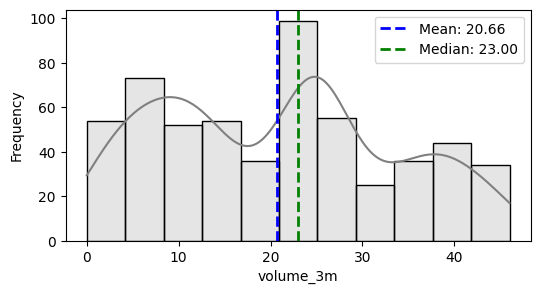

In [266]:
for column in numerical_columns:

    print(column)

    plt.figure(figsize=(6, 3))
    sns.histplot(df[column].dropna(), kde=True, alpha=0.2, color='gray')
    plt.axvline(df[column].mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {df[column].mean():.2f}')
    plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df[column].median():.2f}')
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

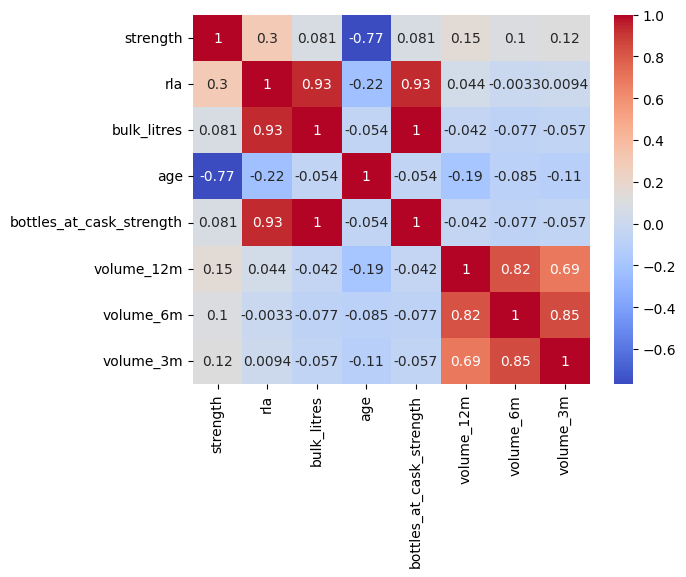

In [267]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')

# Exploring categorical X variables

In [268]:
df.isna().sum()

auction_date                                           0
distillery                                             0
region                                                 1
country                                                2
strength                                               6
rla                                                   10
bulk_litres                                            8
distillery_status                                     35
cask_type                                             52
cask_filling                                         311
previous_spirit                                      264
age                                                   94
bottles_at_cask_strength                               8
volume_12m                                             0
volume_6m                                              0
volume_3m                                              0
inf_adj_hammer_price                                   0
inf_adj_hammer_price_per_bottle

In [269]:
categorical_columns = ['distillery', 'region', 'country', 'distillery_status', 'cask_type', 'cask_filling', 'previous_spirit']
df[categorical_columns] = df[categorical_columns].fillna('Undisclosed')

In [270]:
df['distillery'].value_counts()

distillery
Bruichladdich                 64
Adnams                        60
Tullibardine                  48
Ben Nevis                     24
Macallan                      21
                              ..
Littlemill                     1
Hinch                          1
Highland Park                  1
Lochindaal (Bruichladdich)     1
Whitlaw (Highland Park)        1
Name: count, Length: 91, dtype: int64



inf_adj_hammer_price
distillery


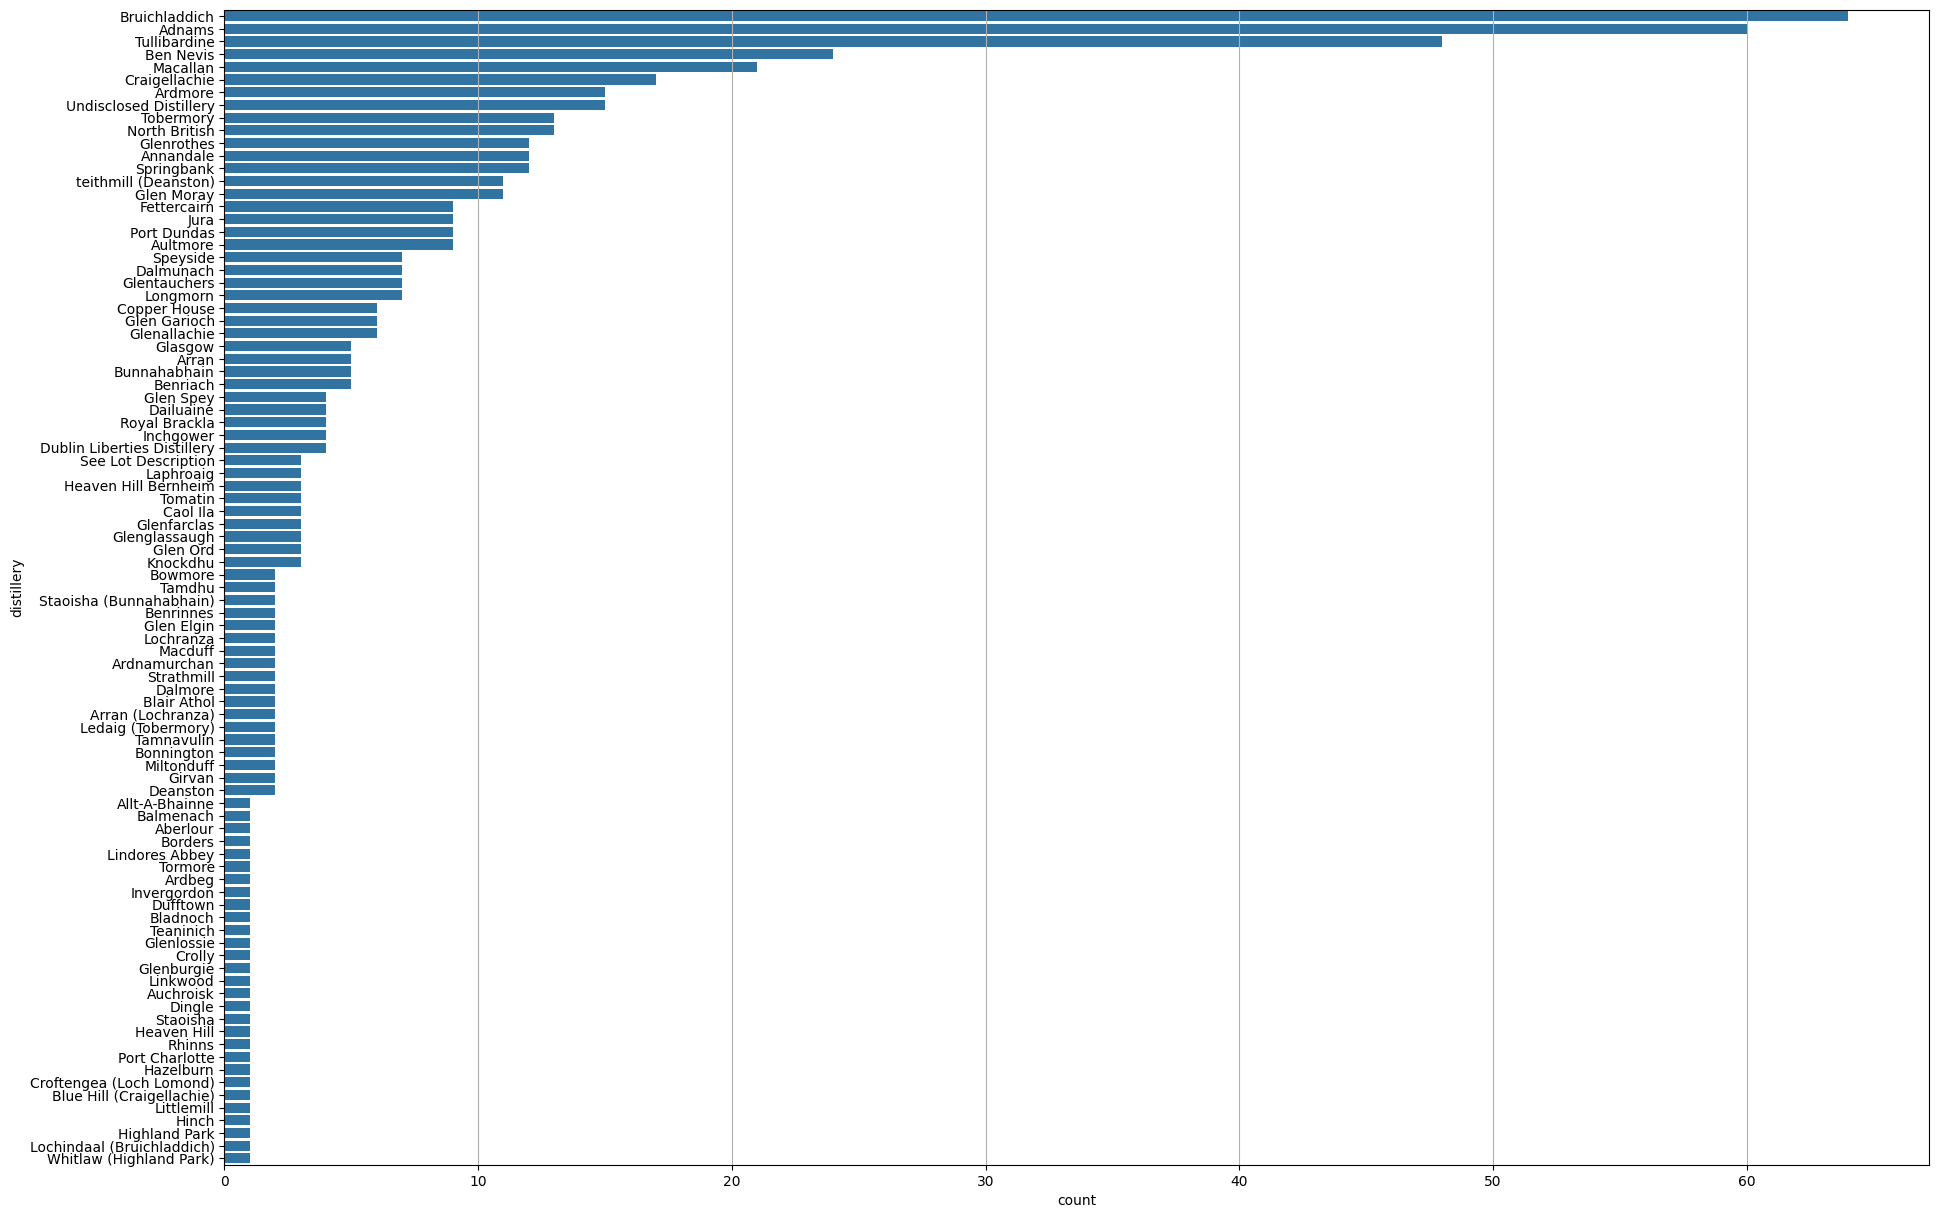

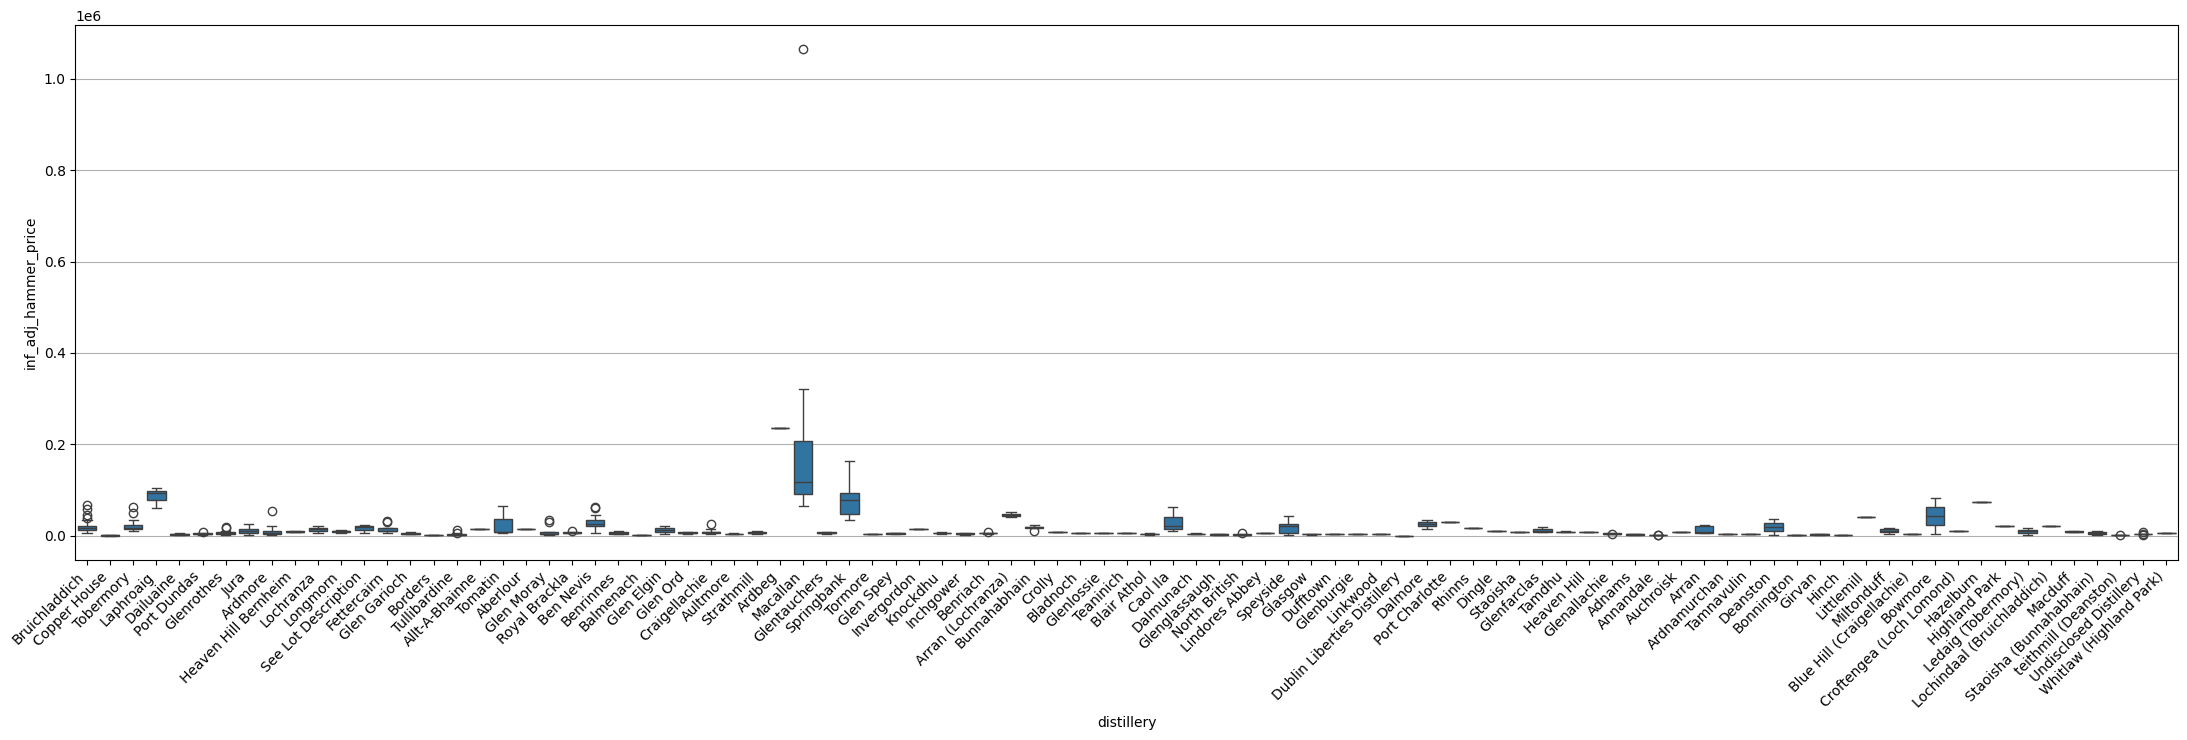

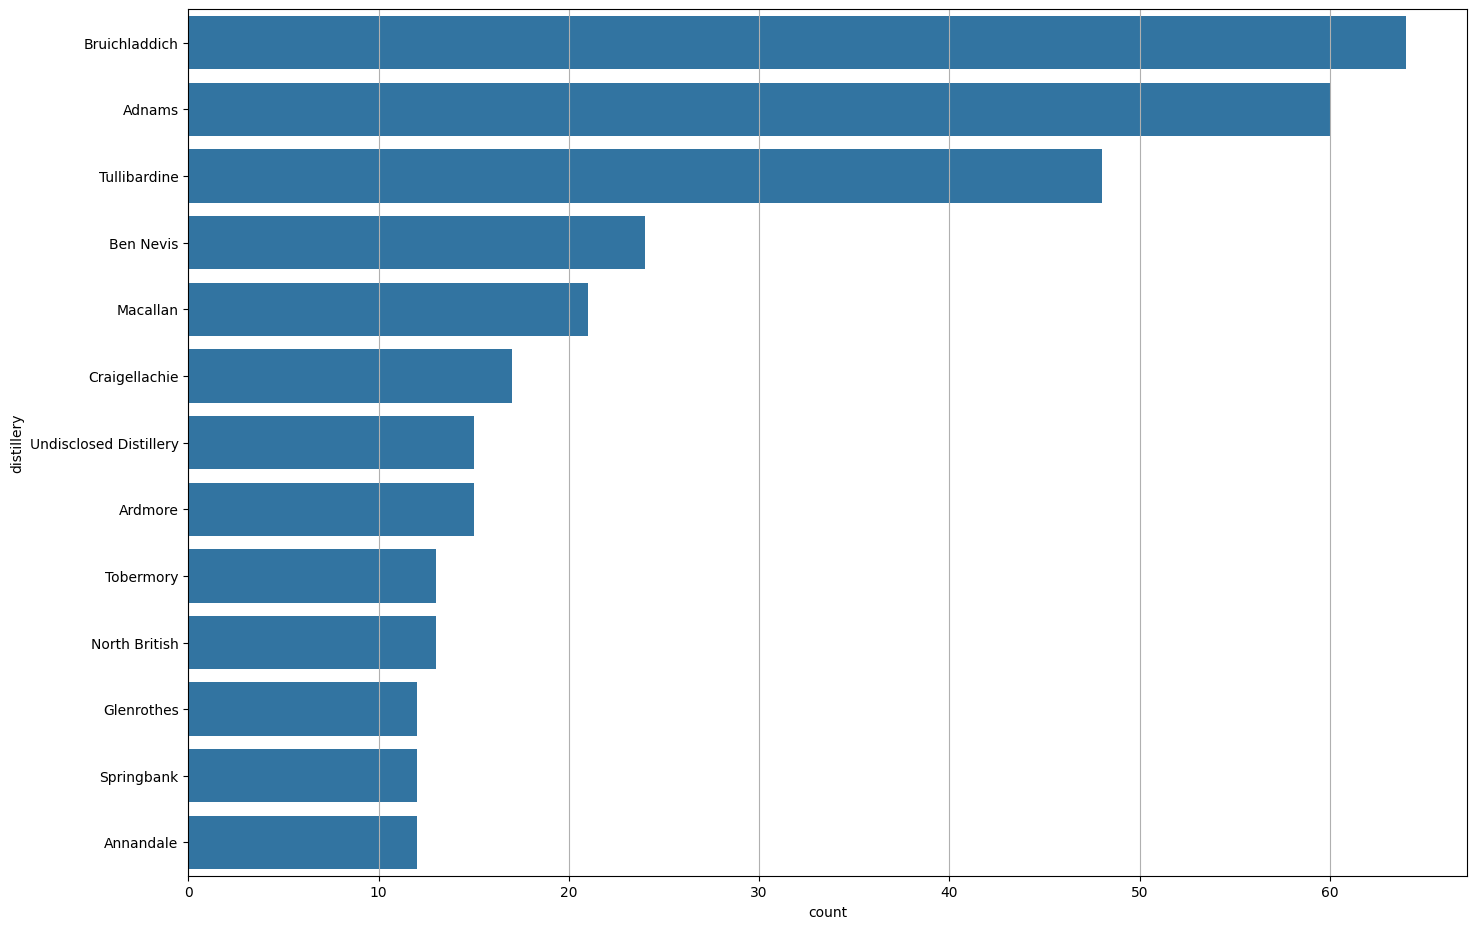

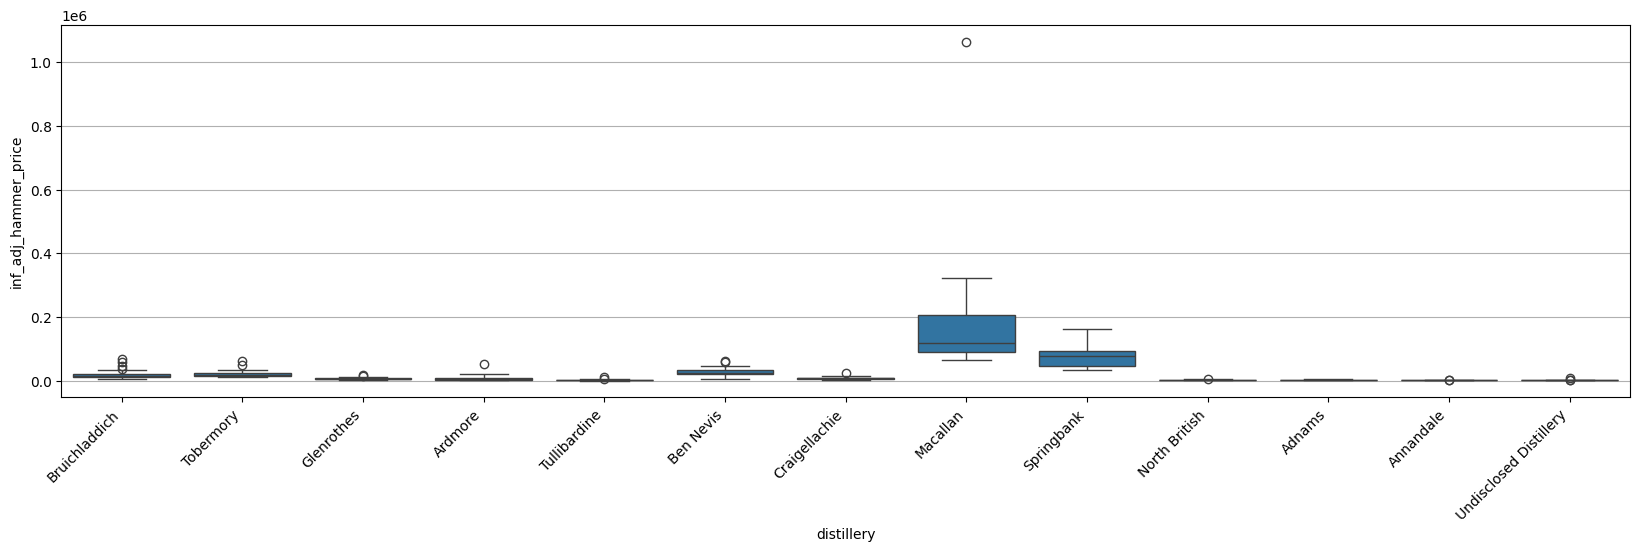

region


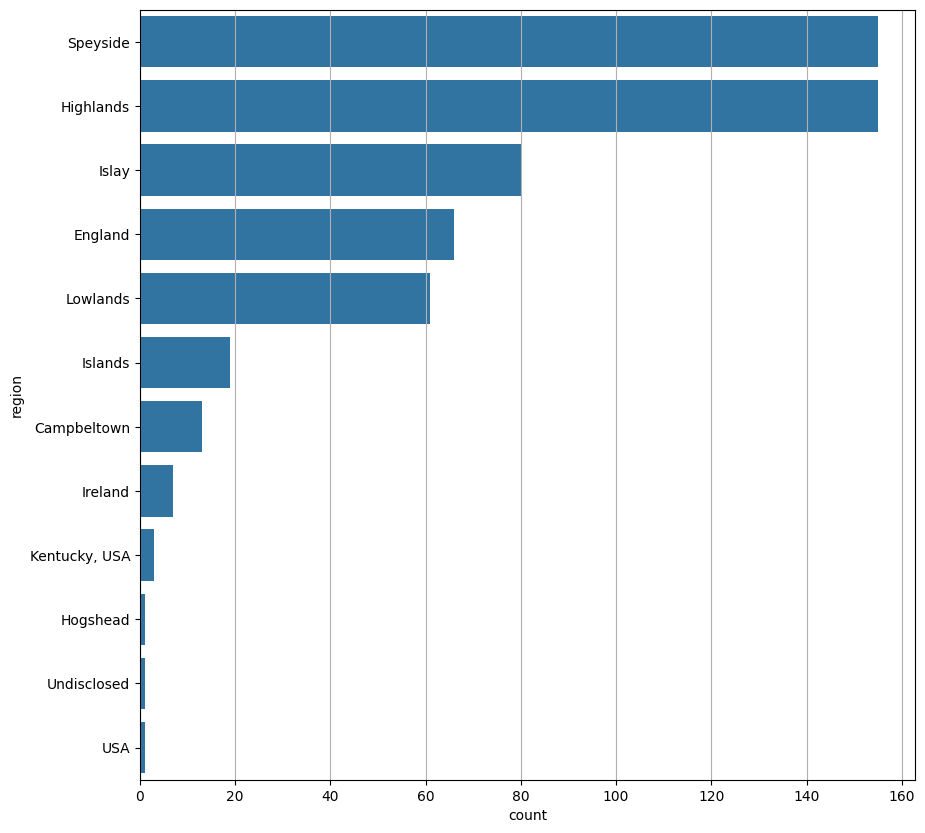

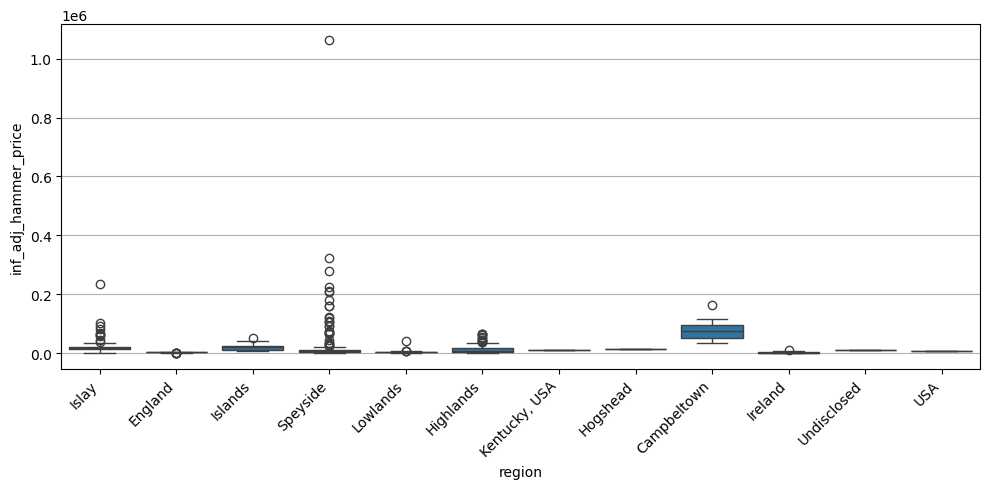

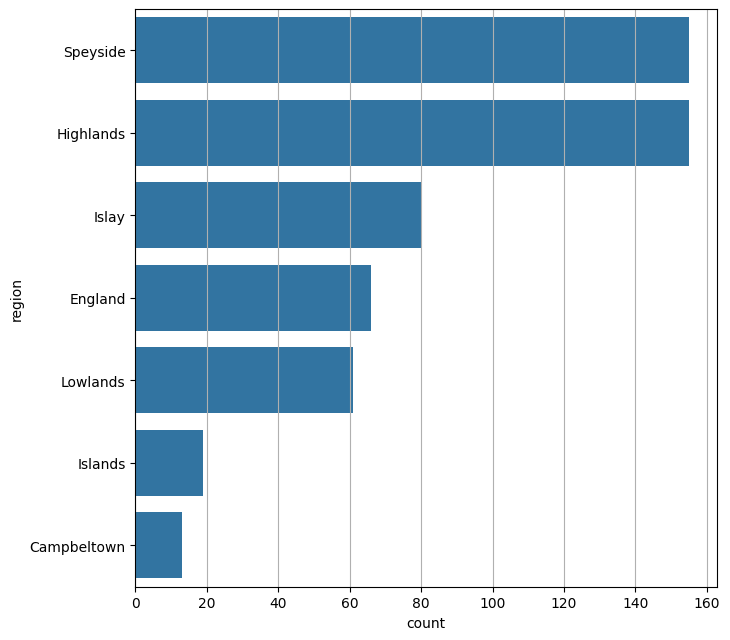

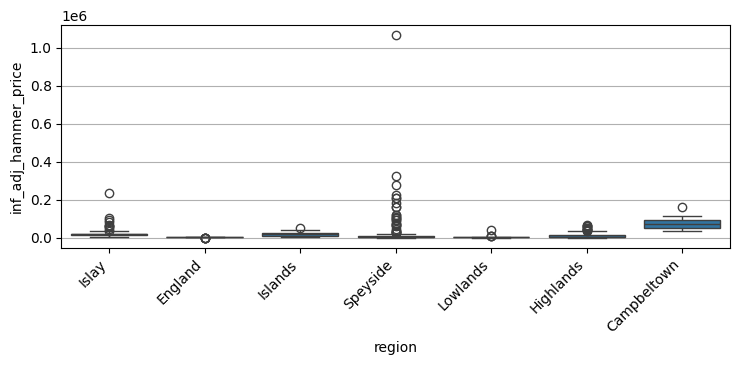

country


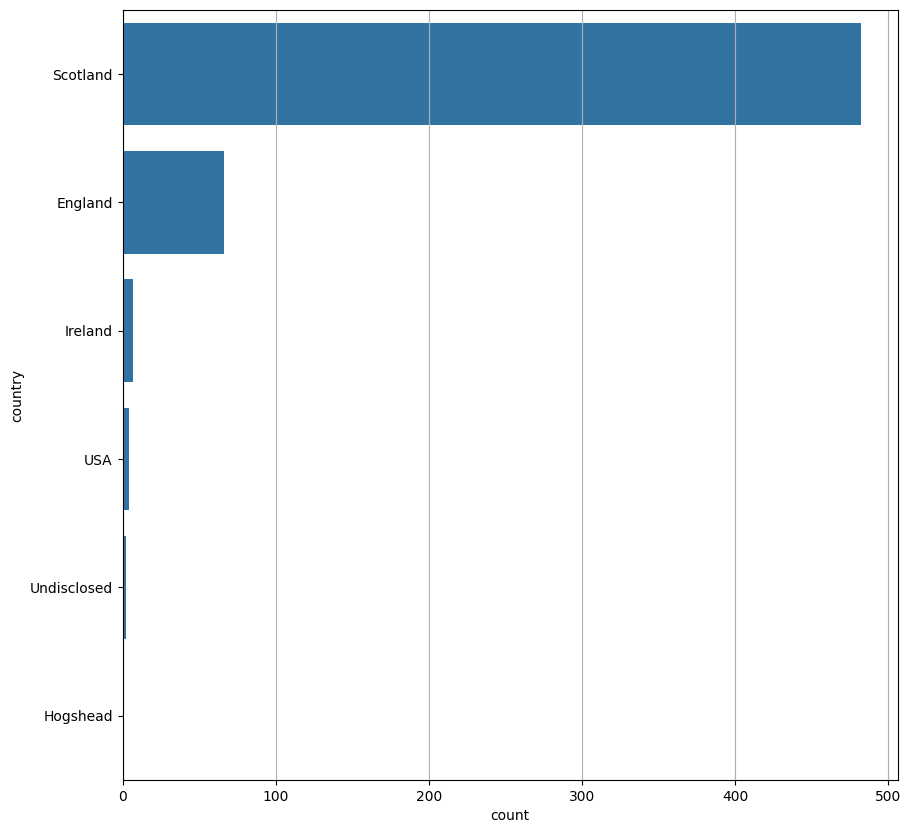

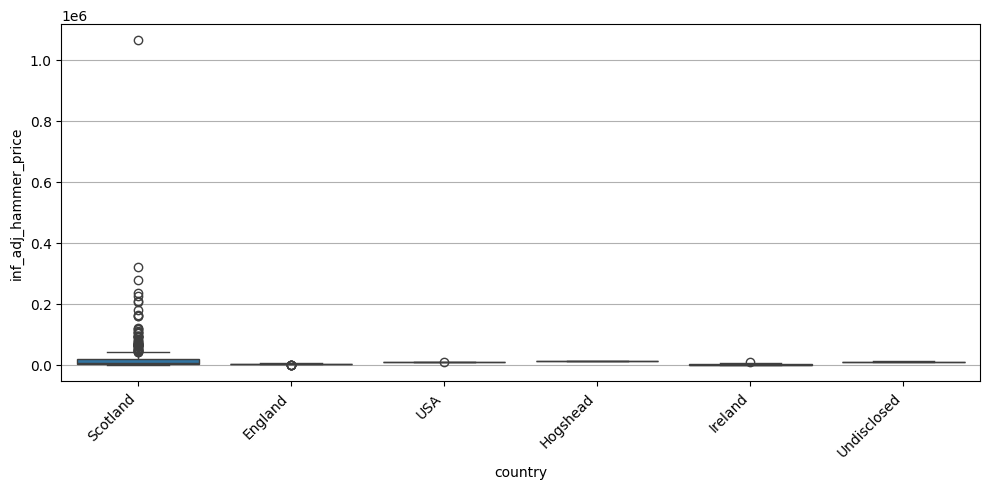

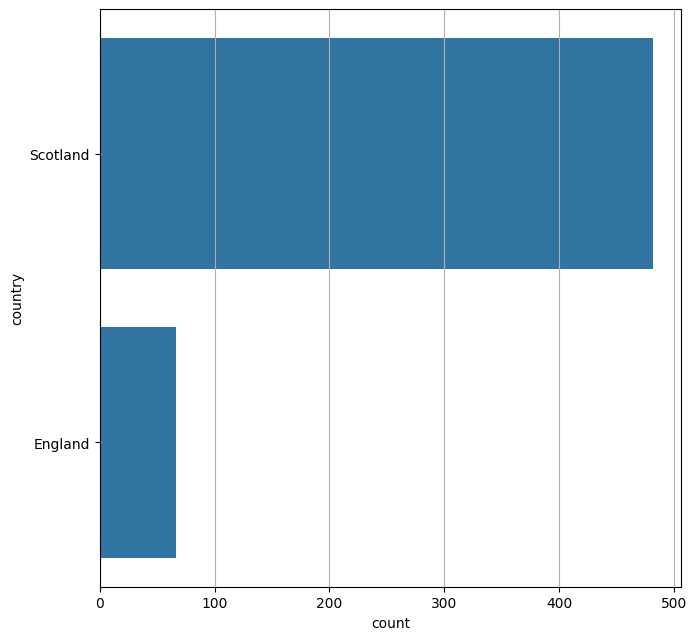

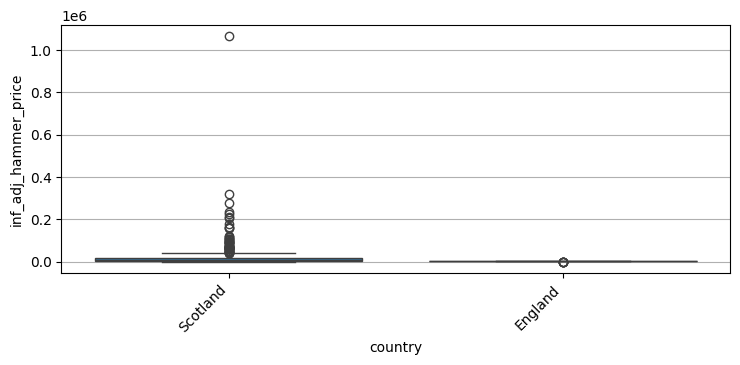

distillery_status


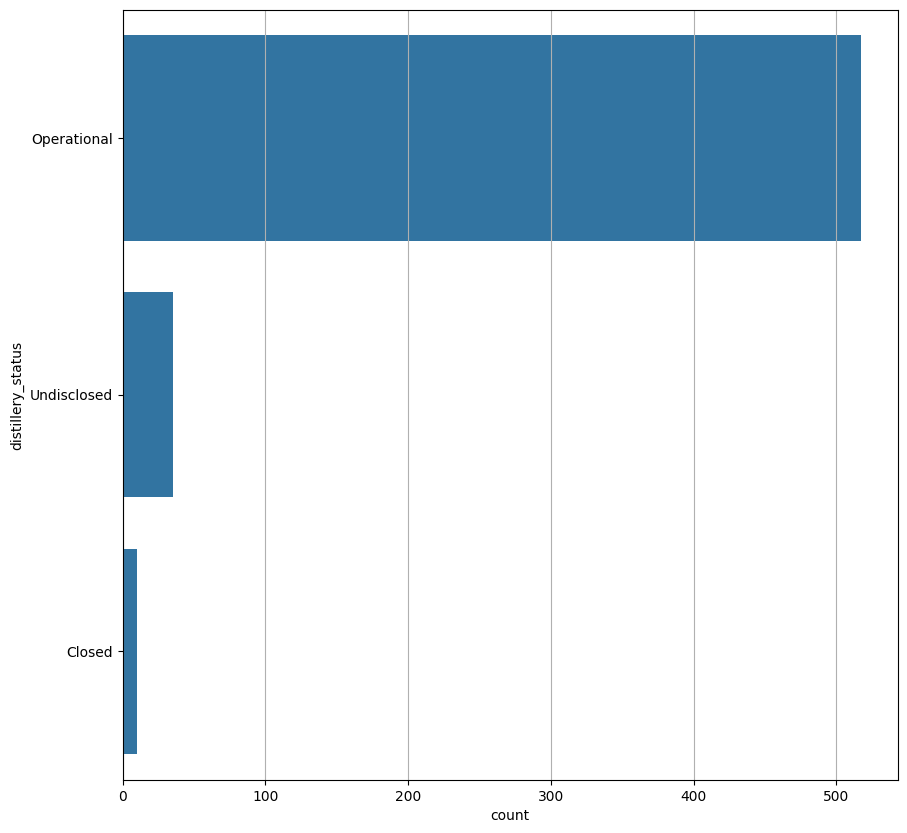

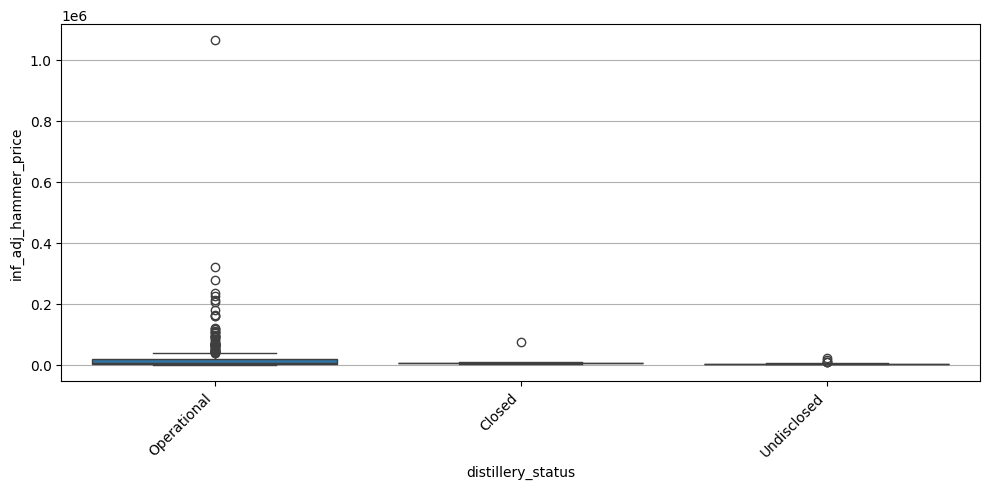

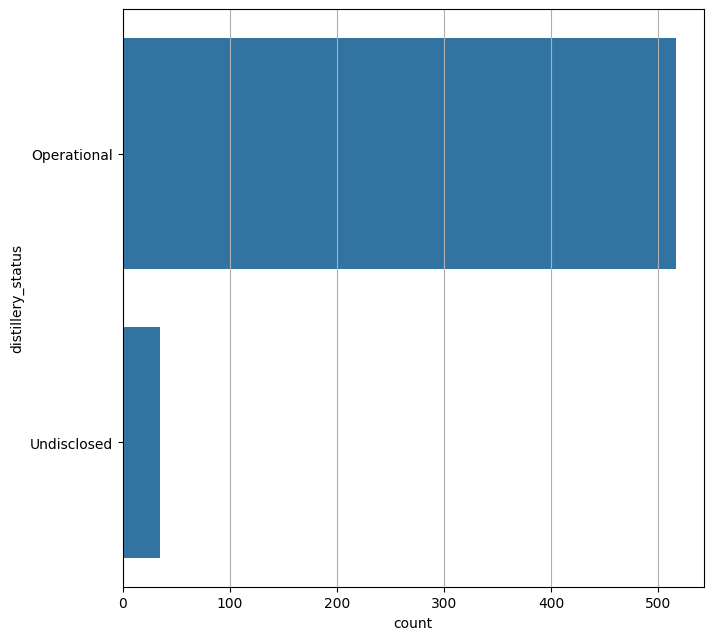

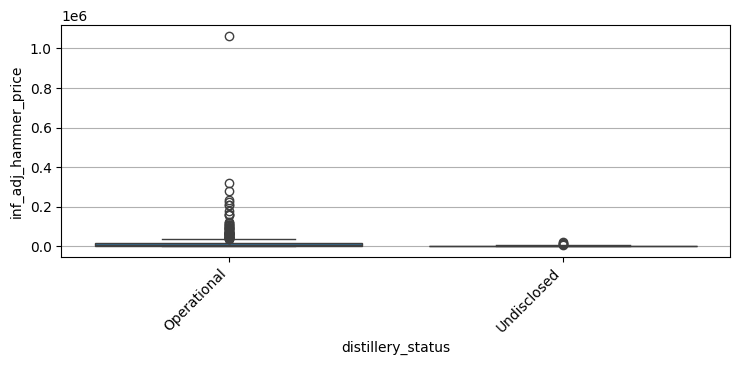

cask_type


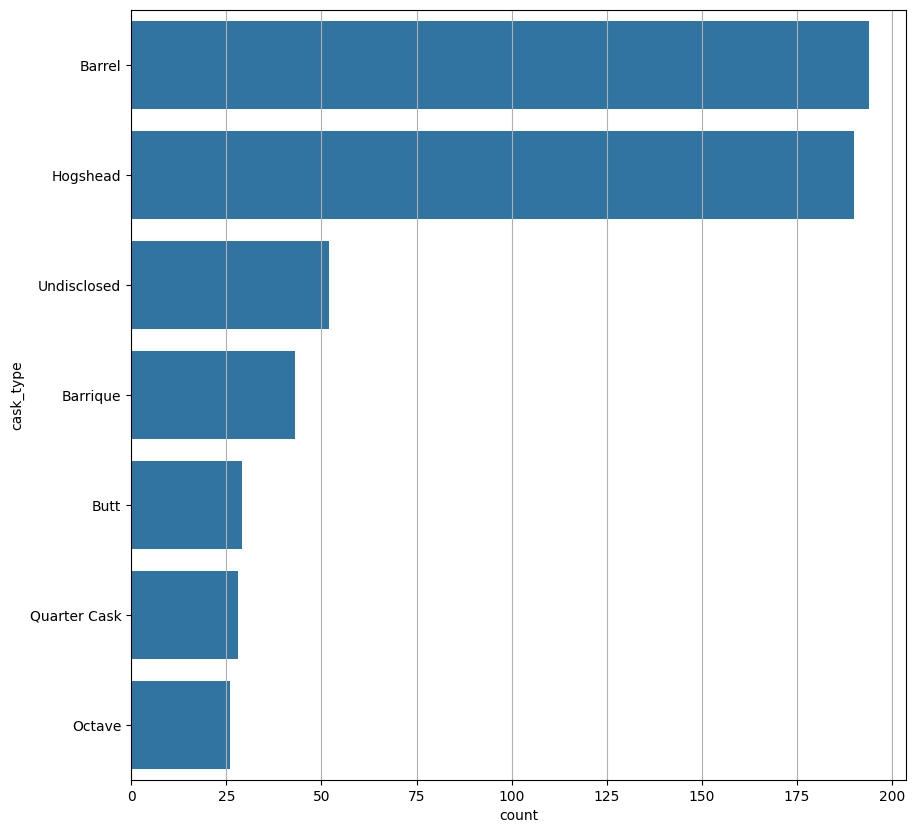

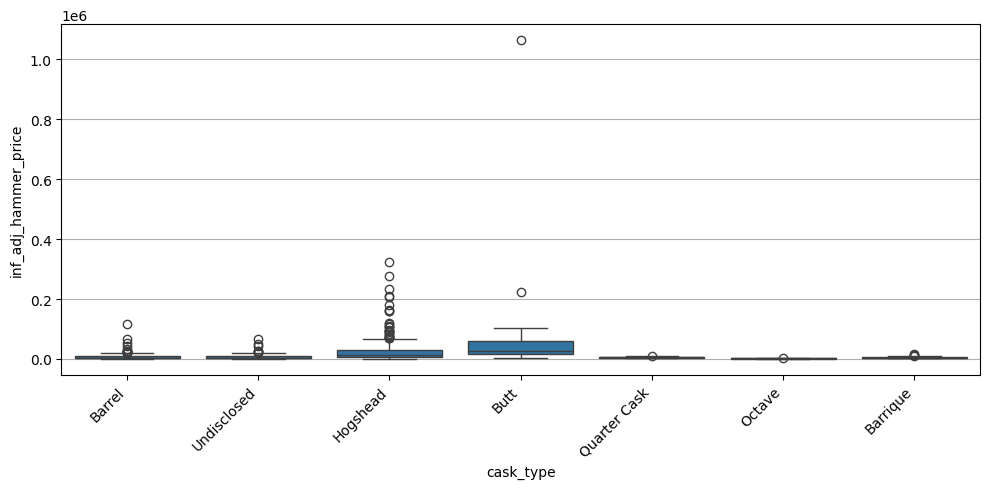

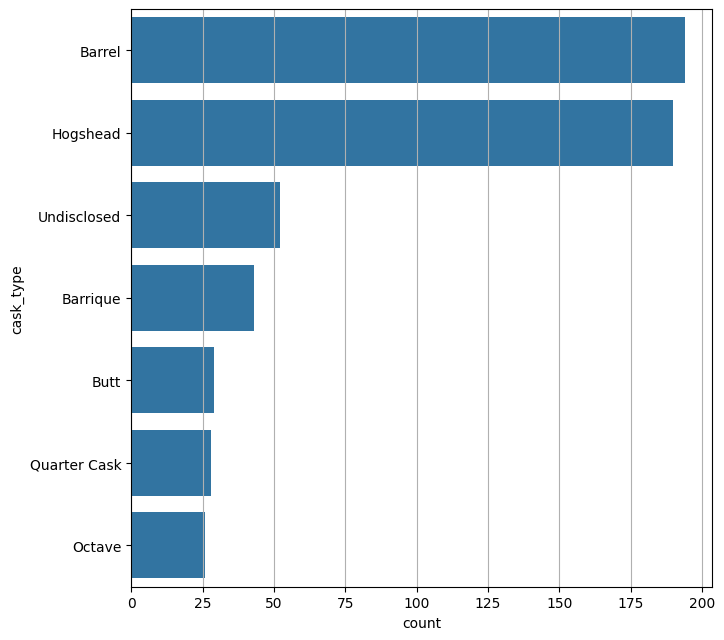

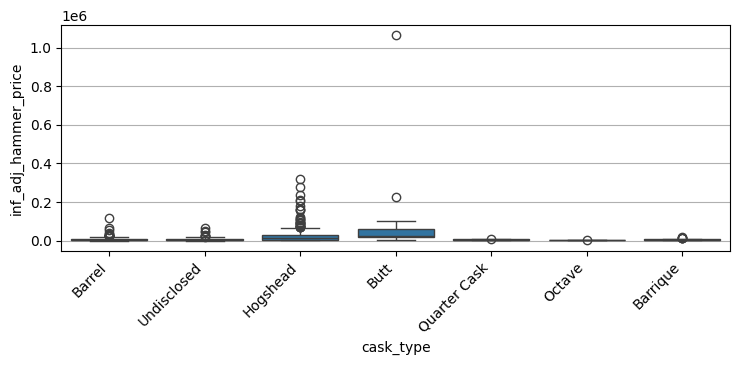

cask_filling


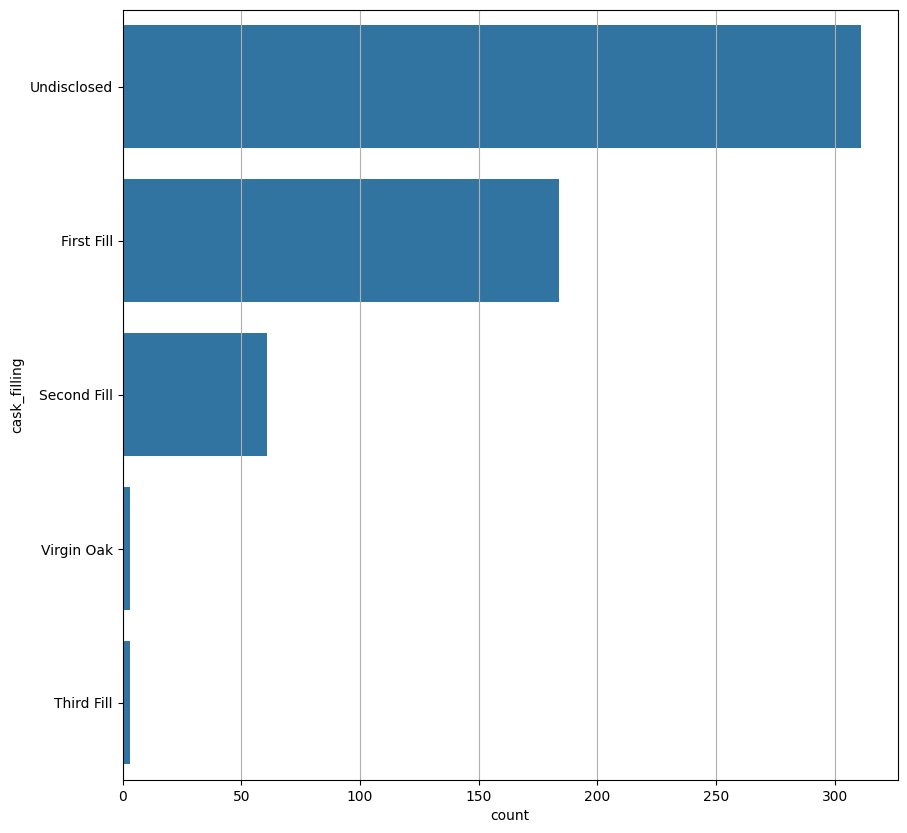

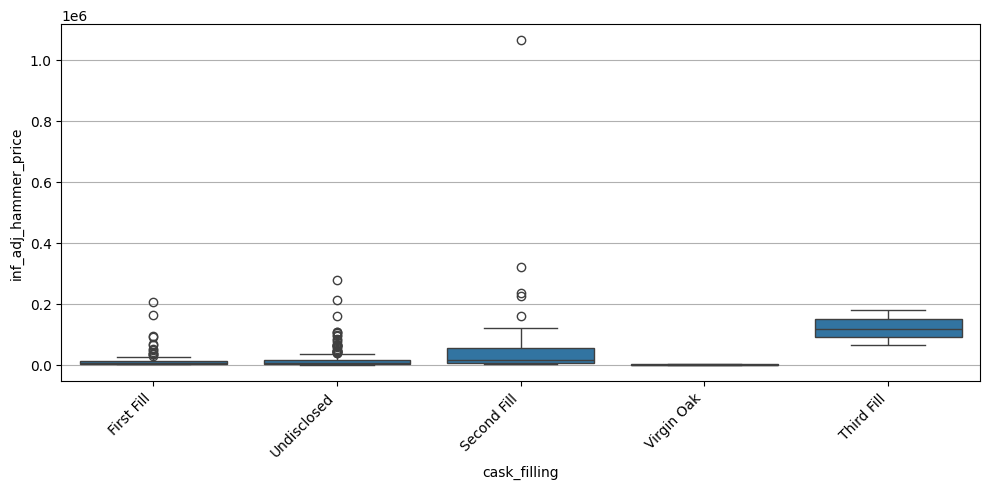

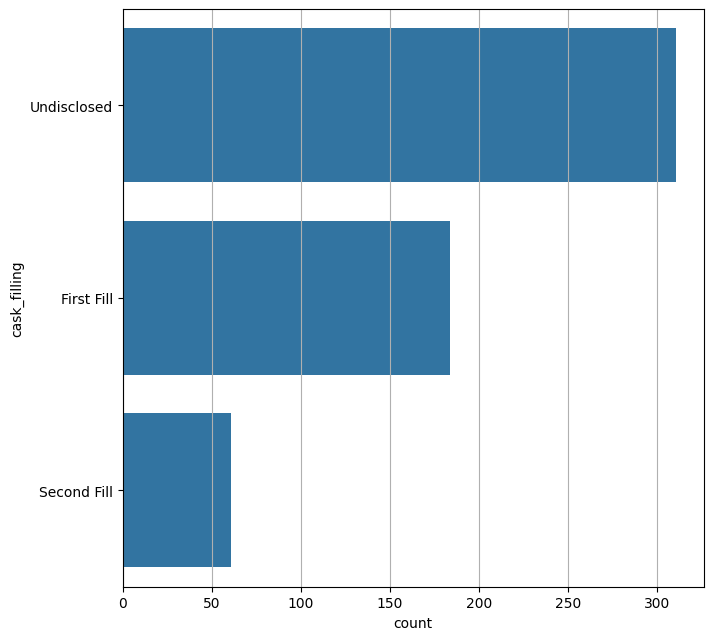

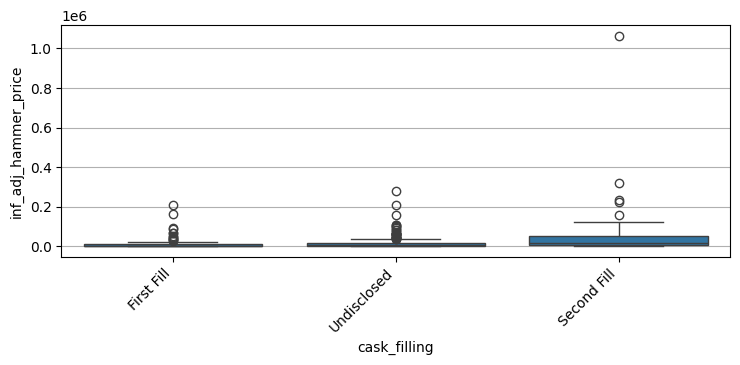

previous_spirit


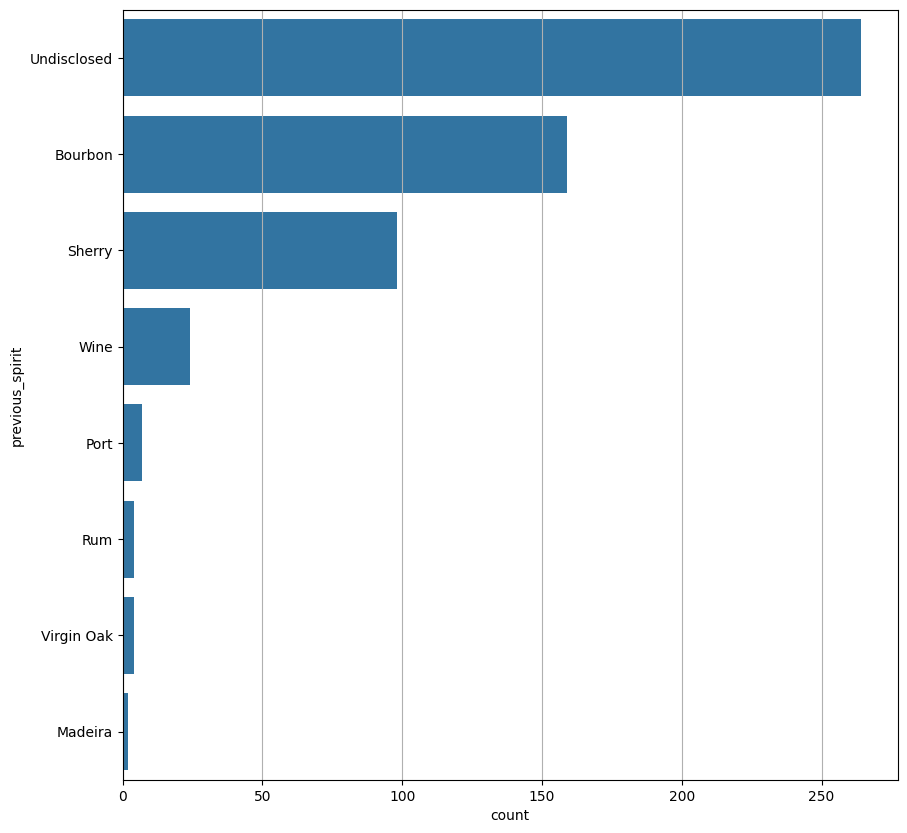

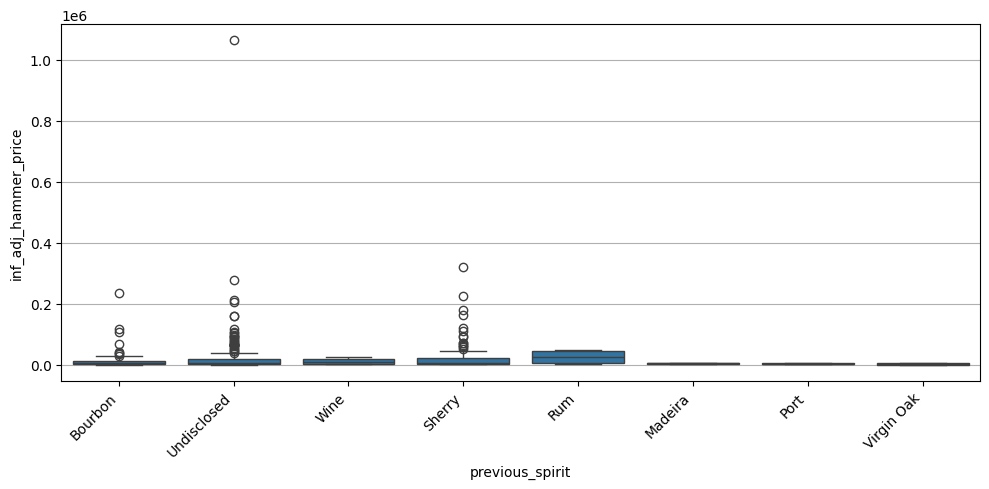

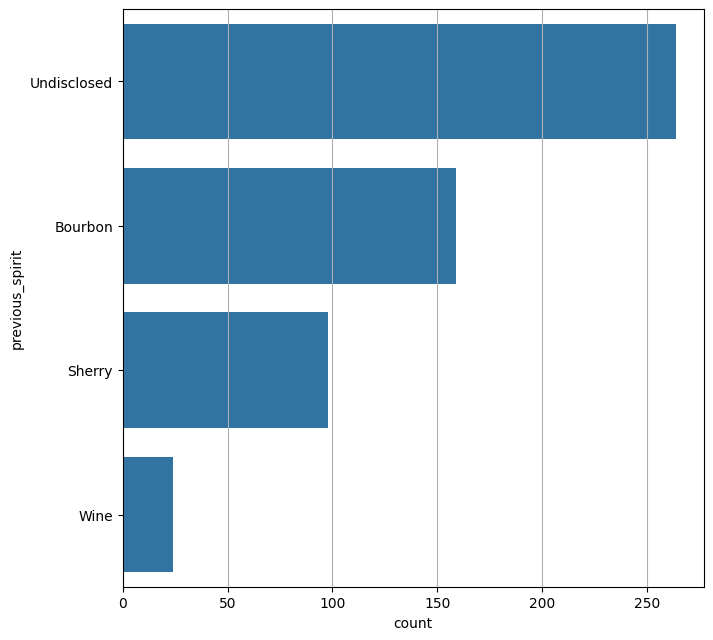

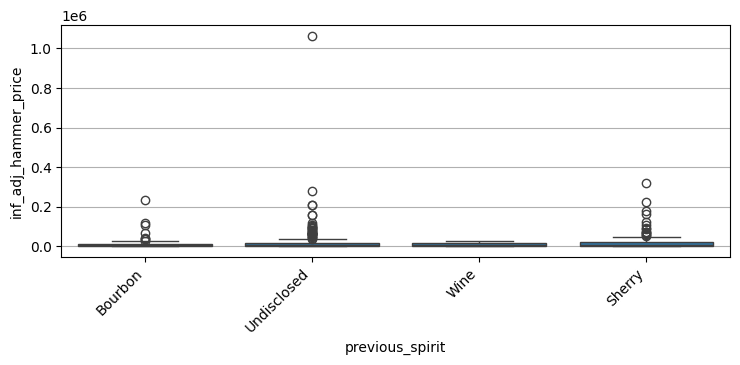



inf_adj_hammer_price_per_age
distillery


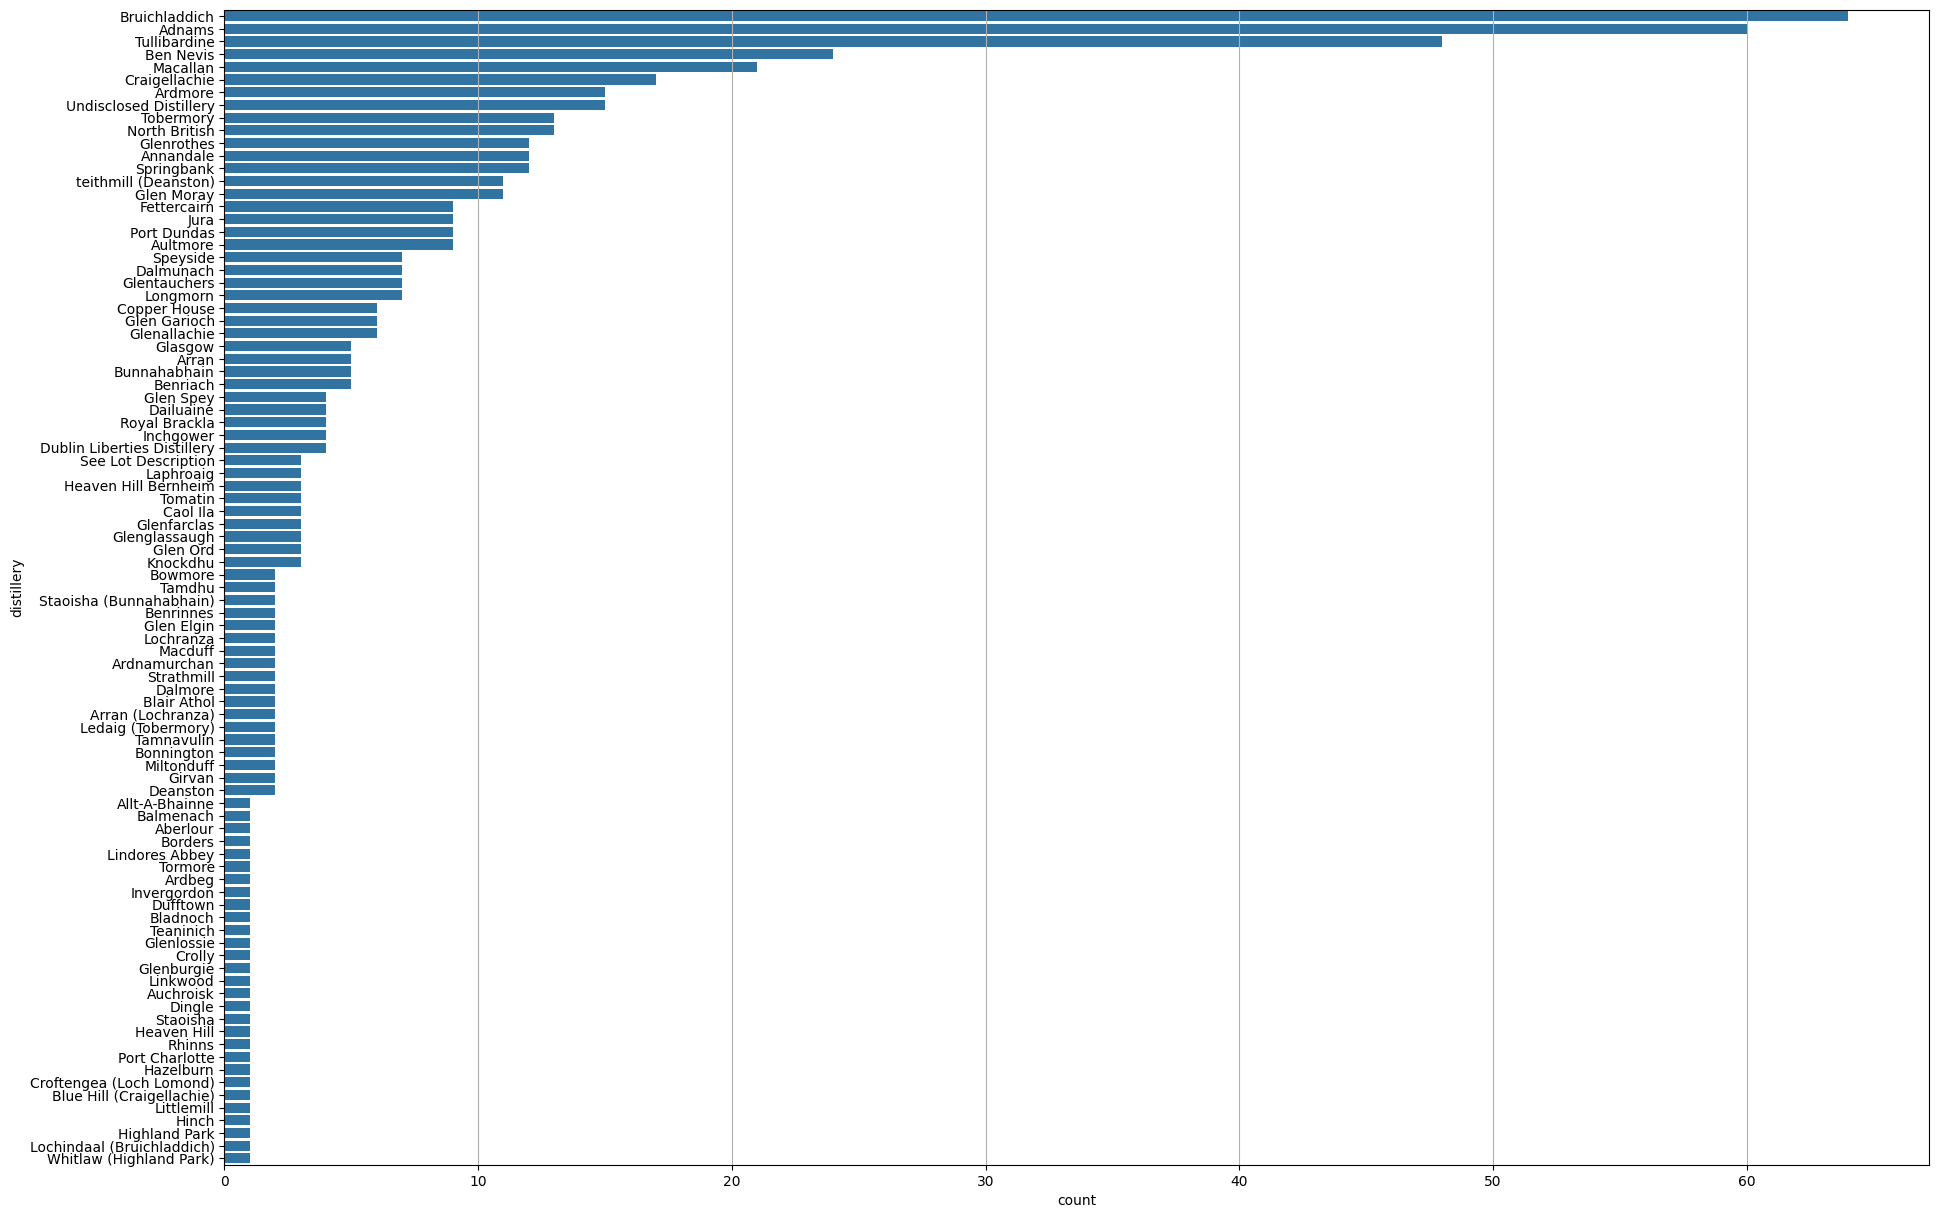

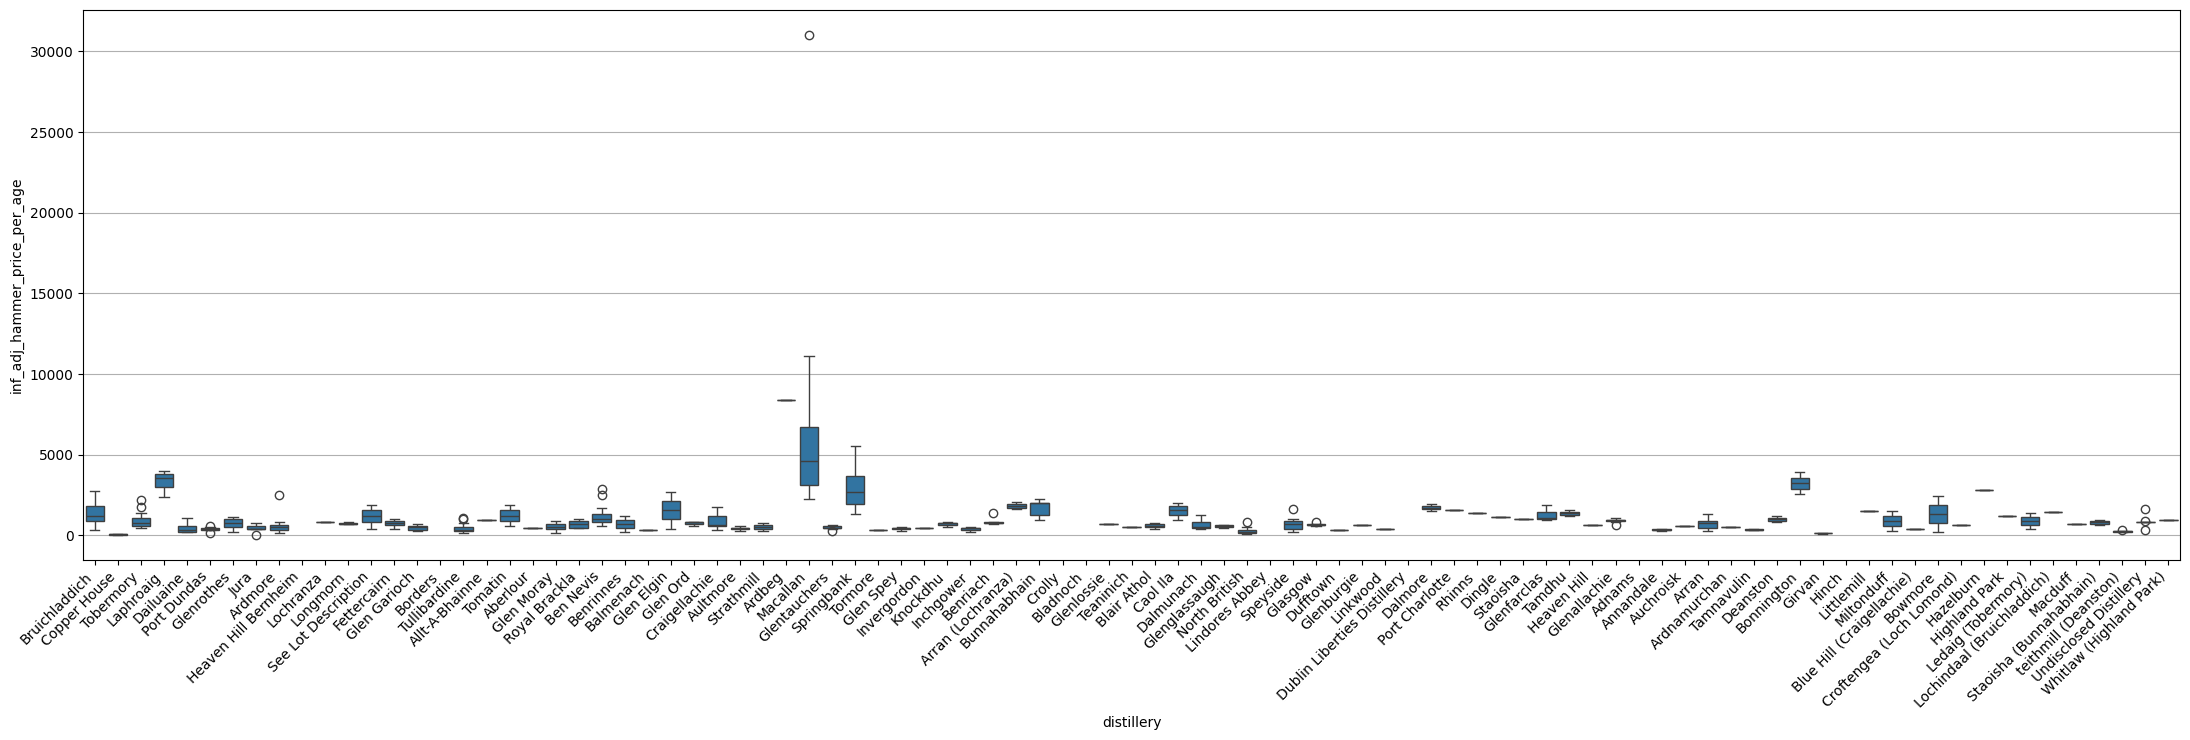

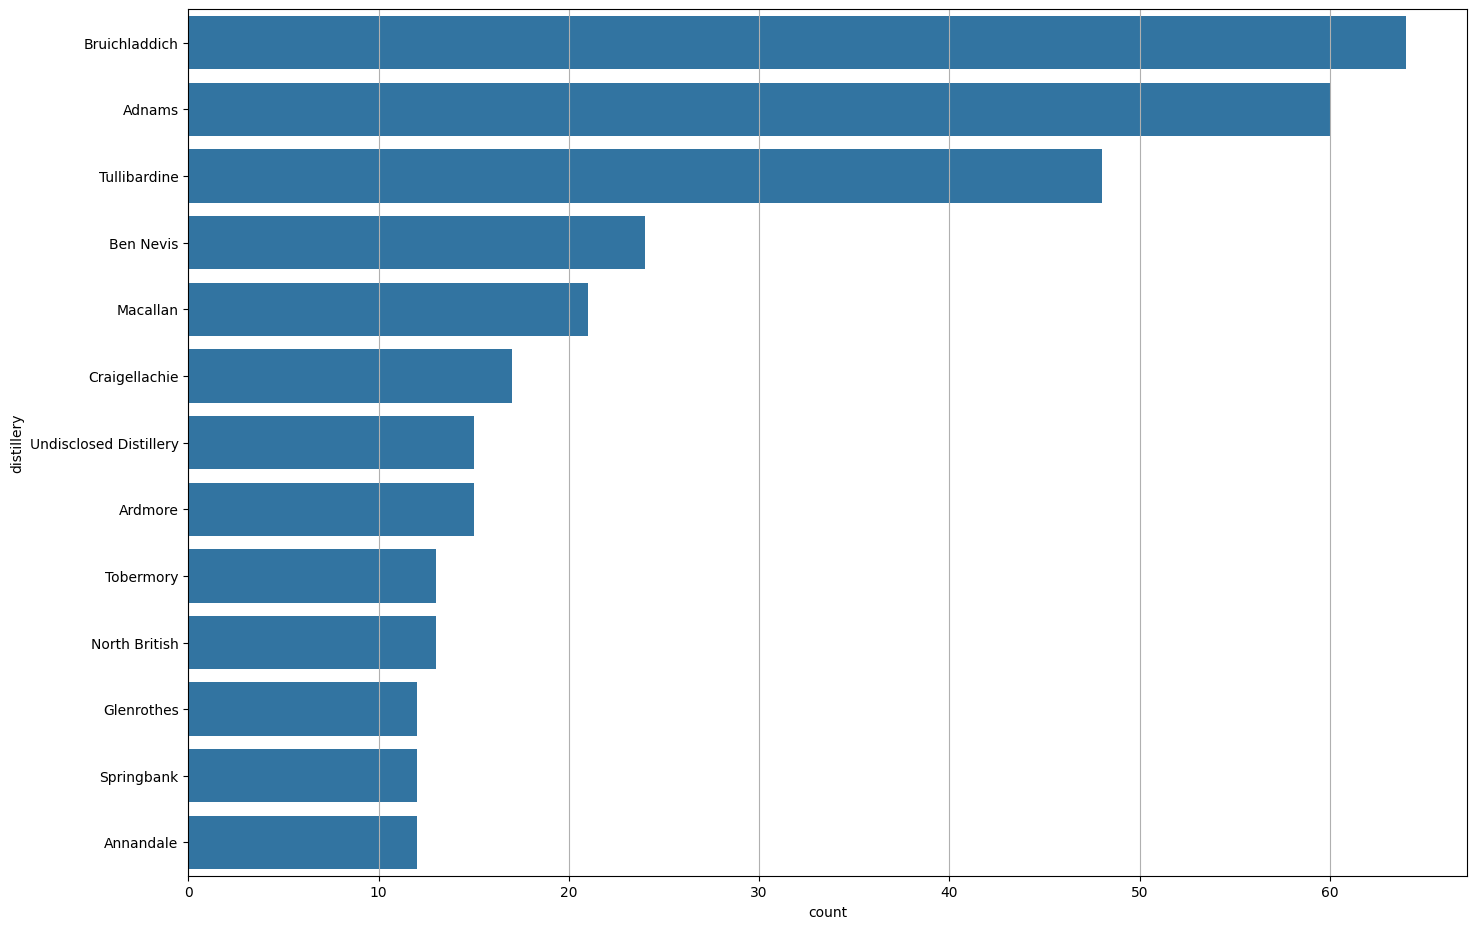

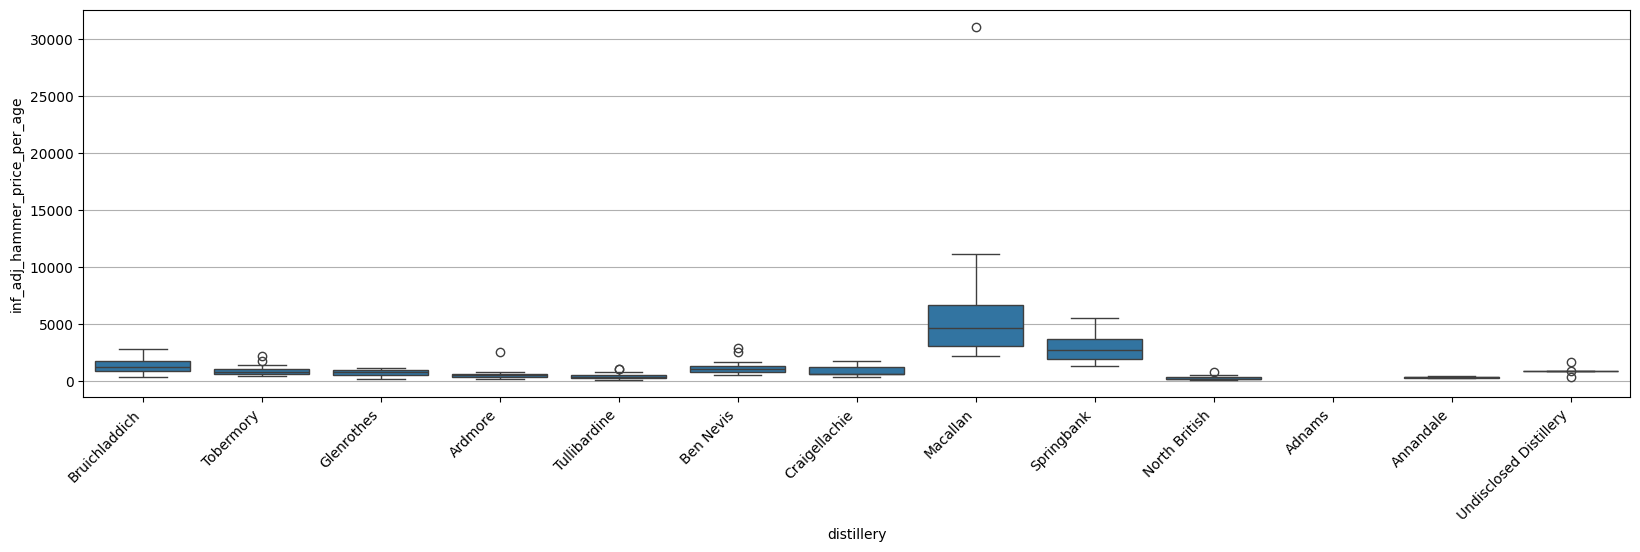

region


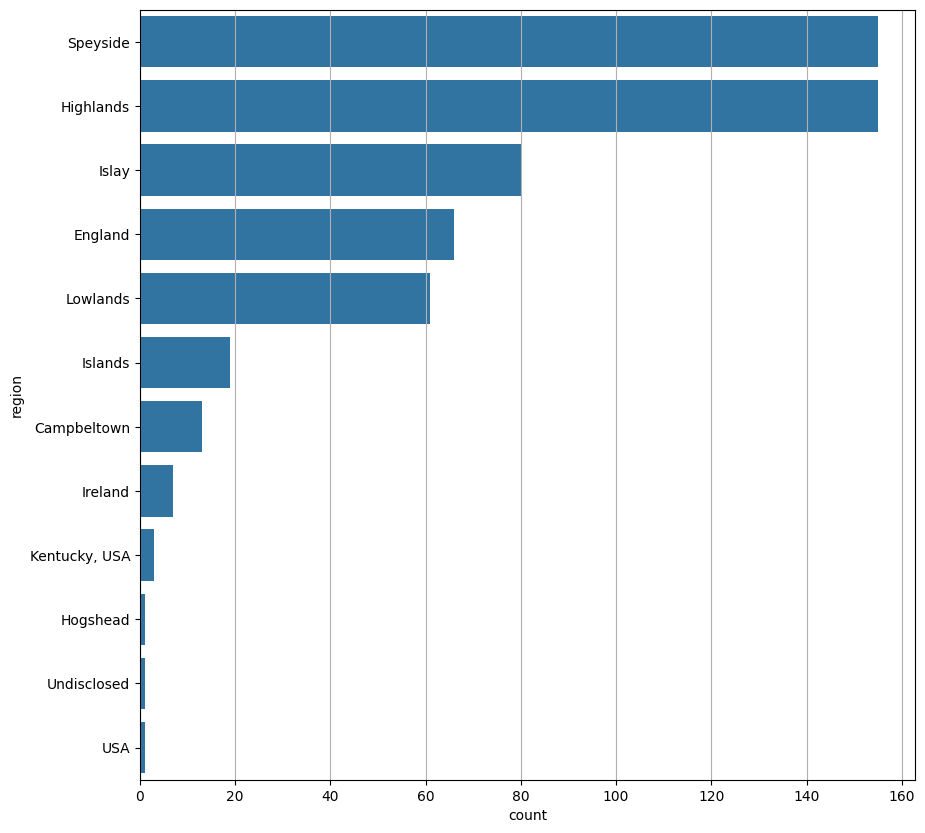

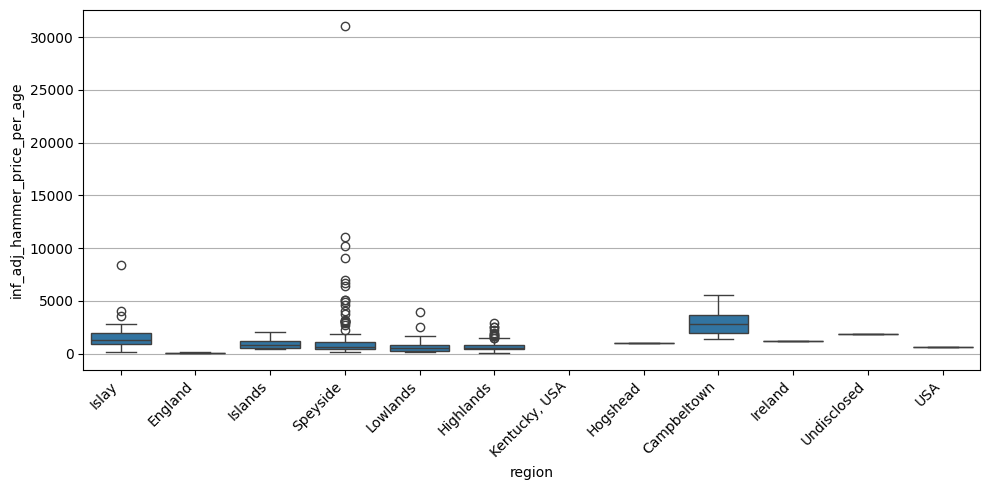

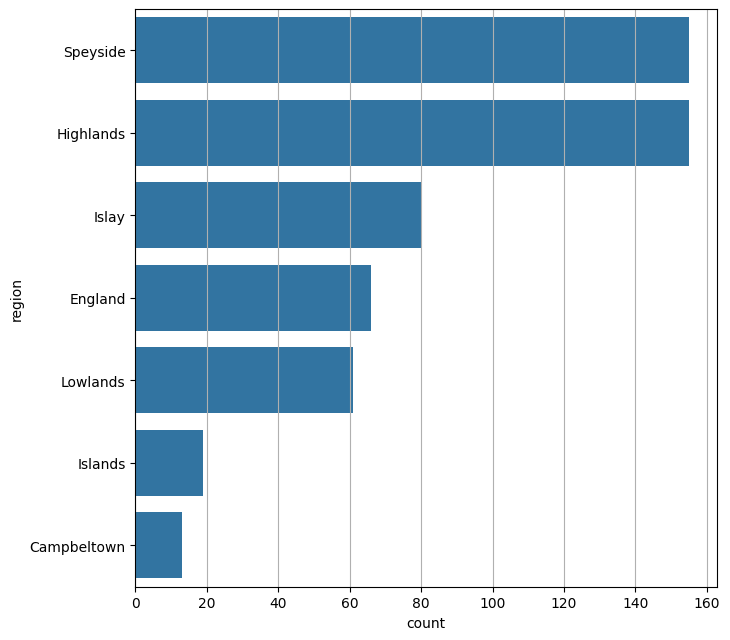

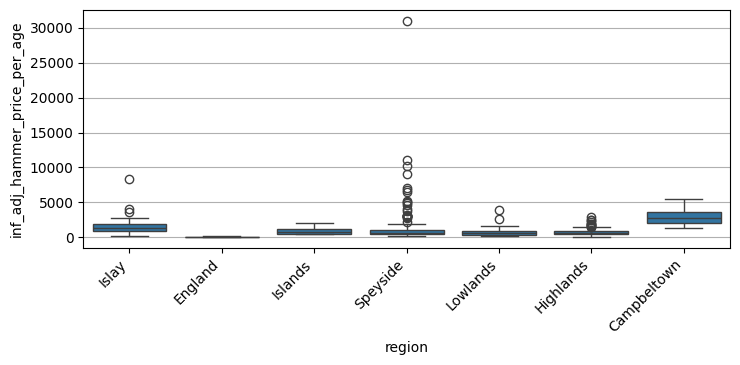

country


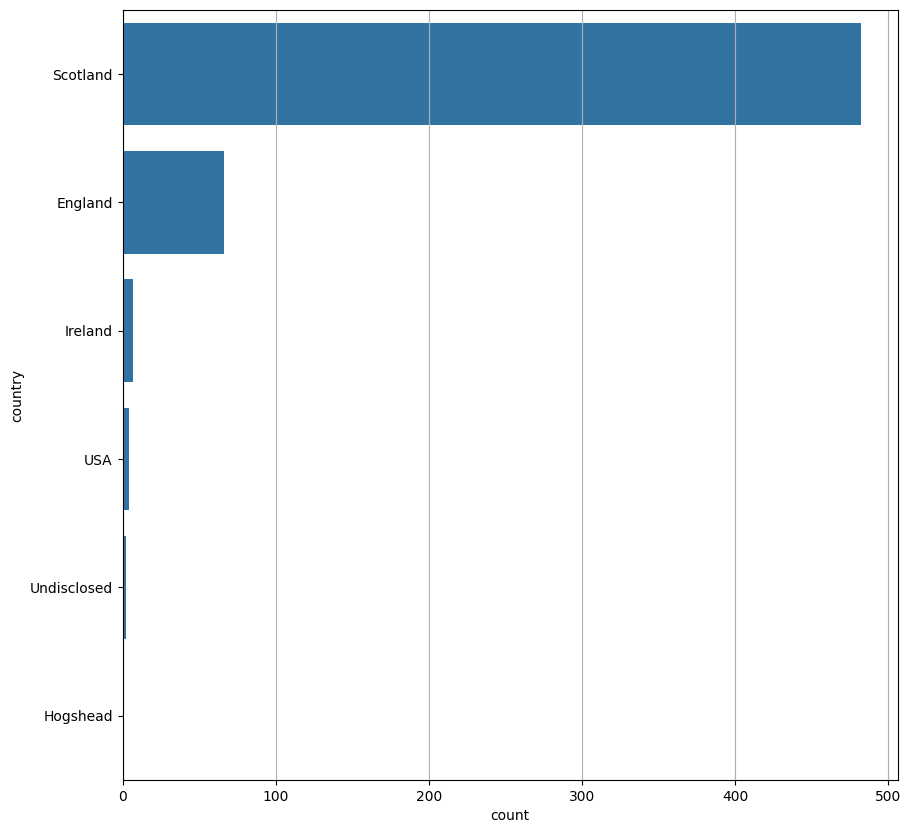

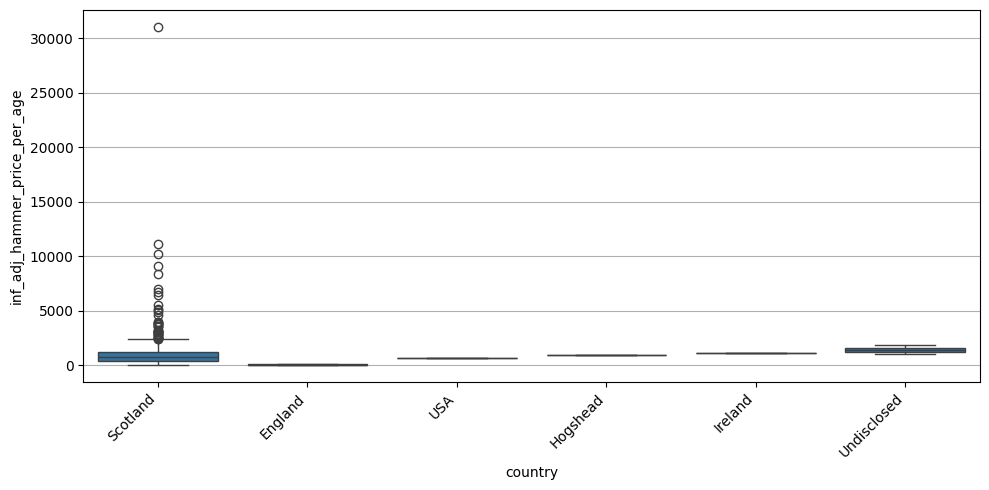

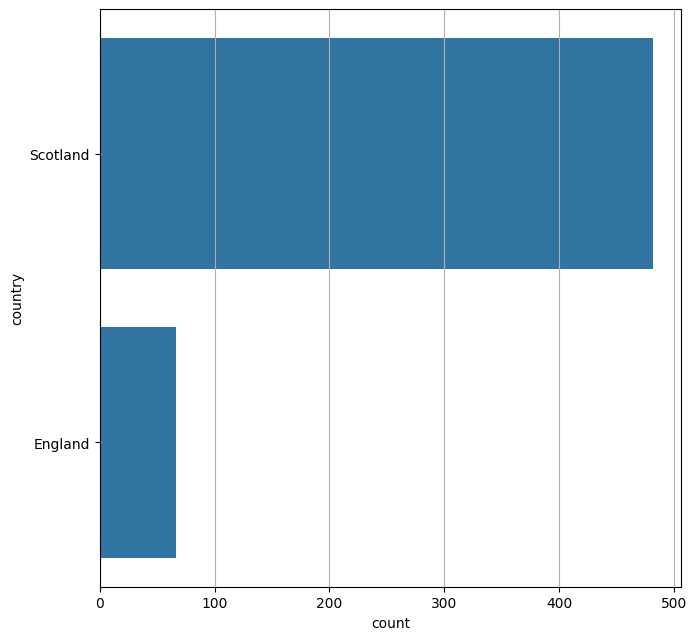

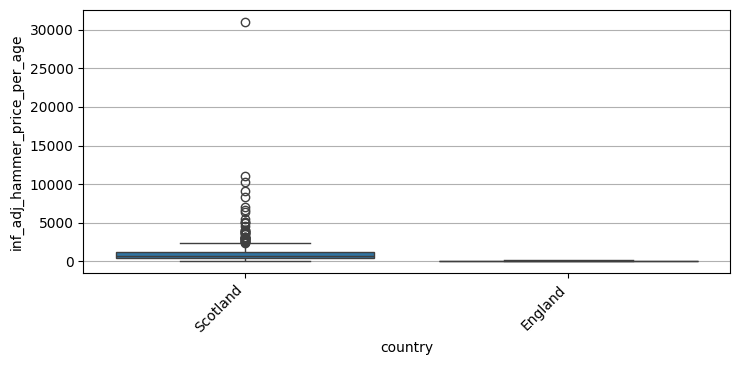

distillery_status


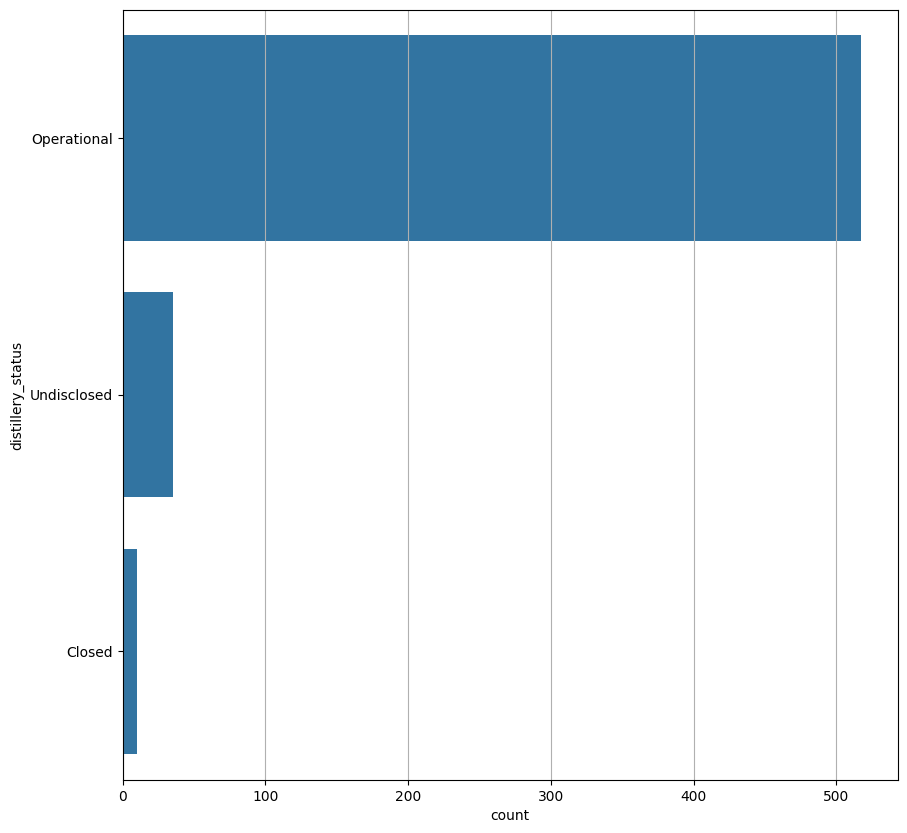

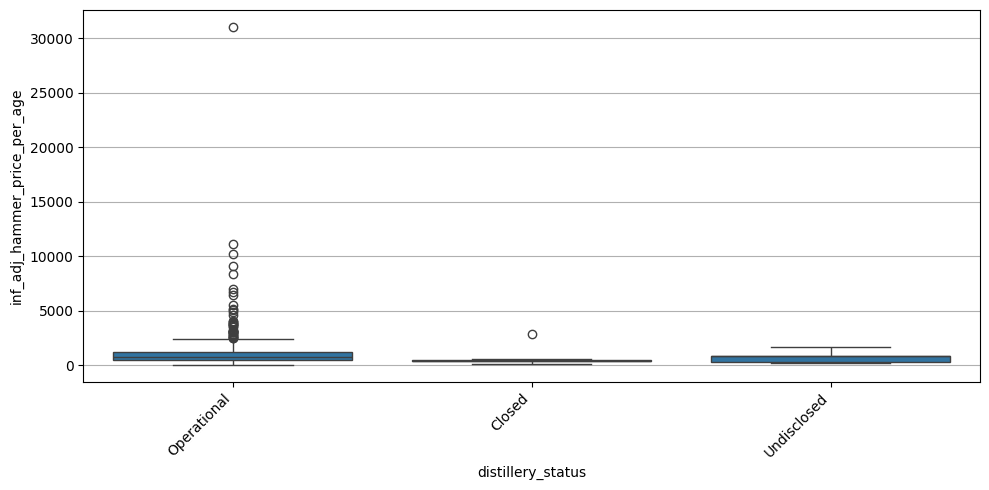

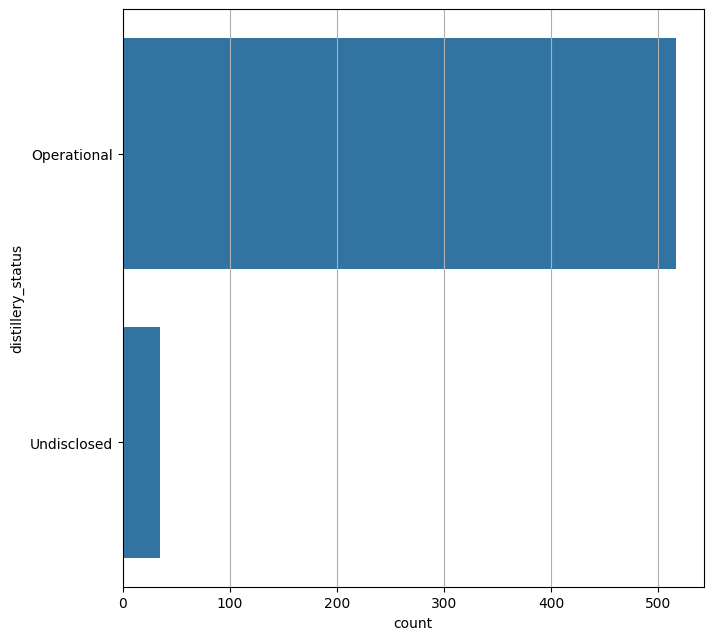

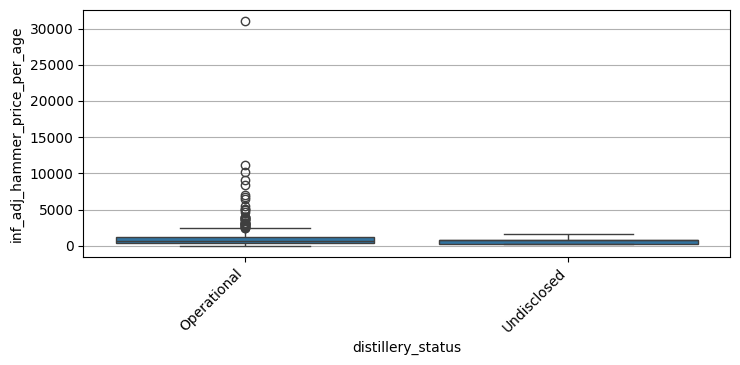

cask_type


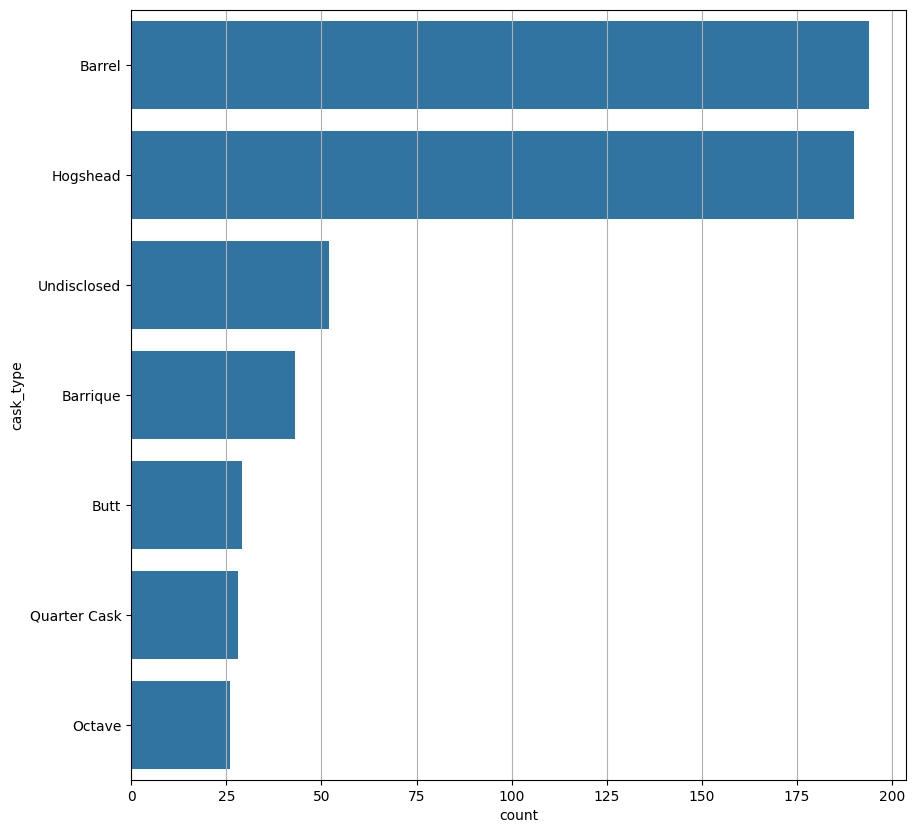

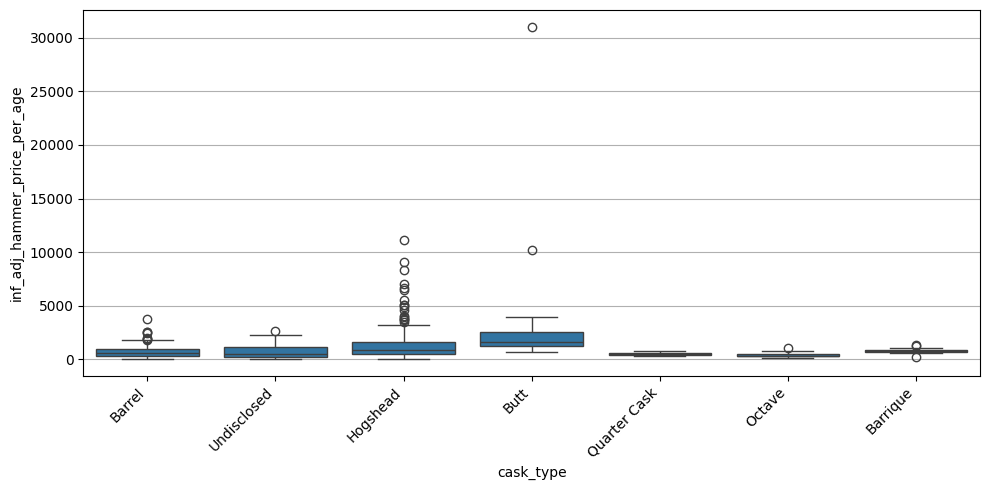

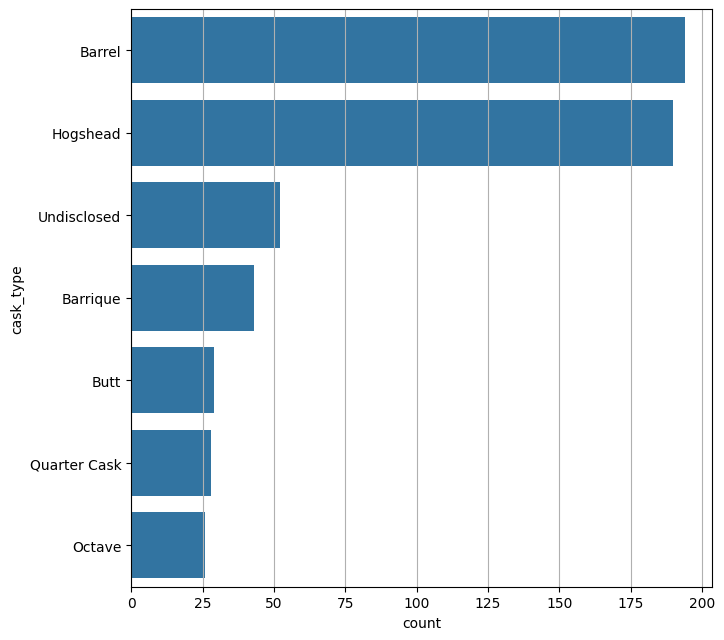

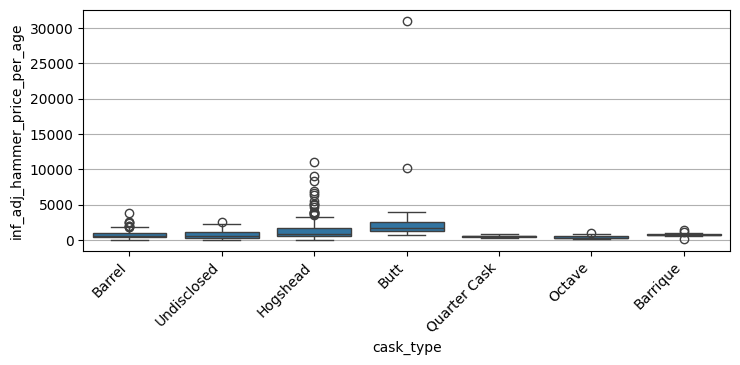

cask_filling


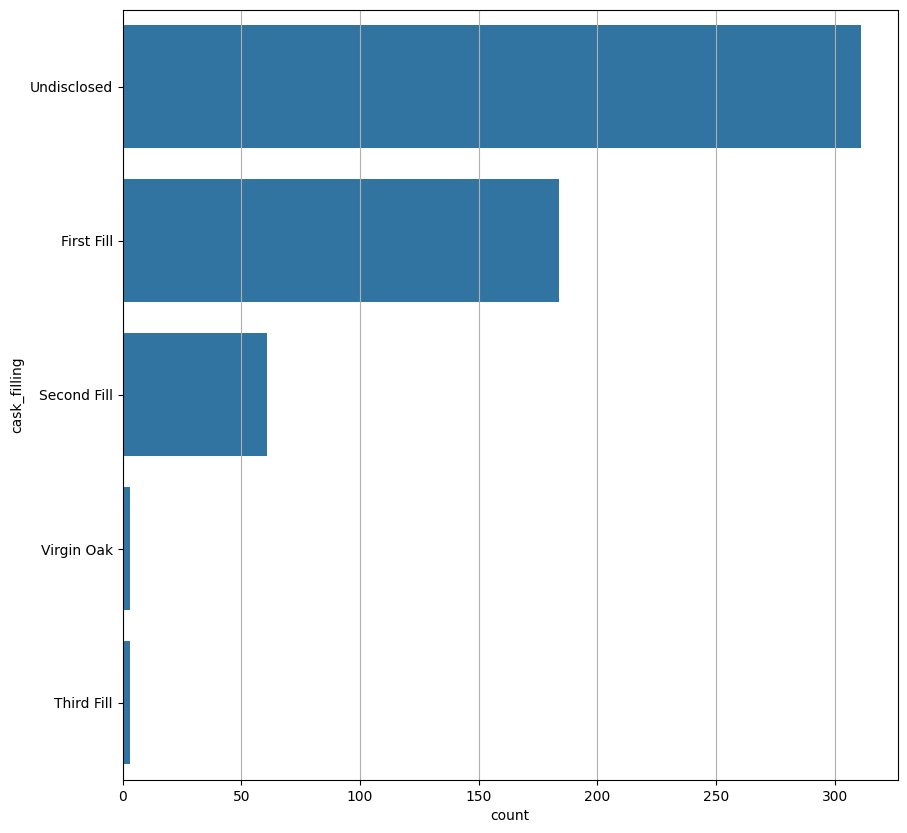

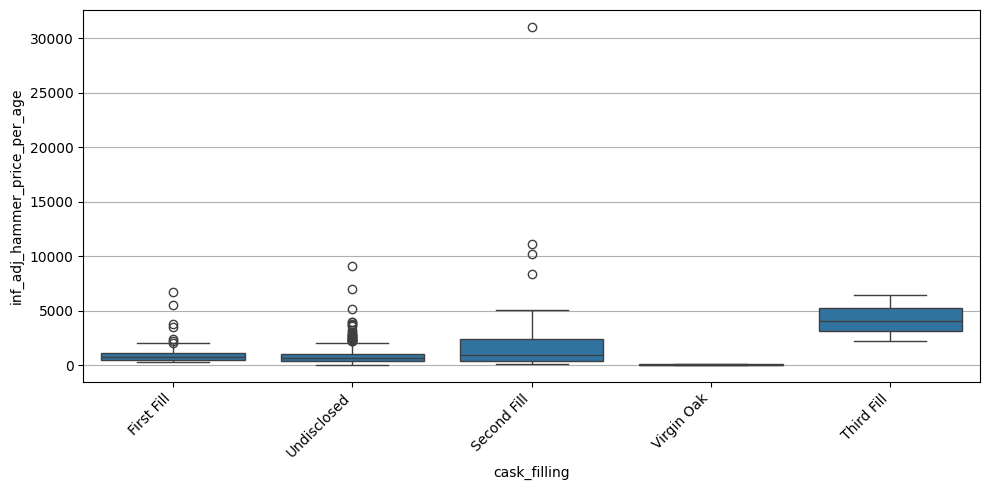

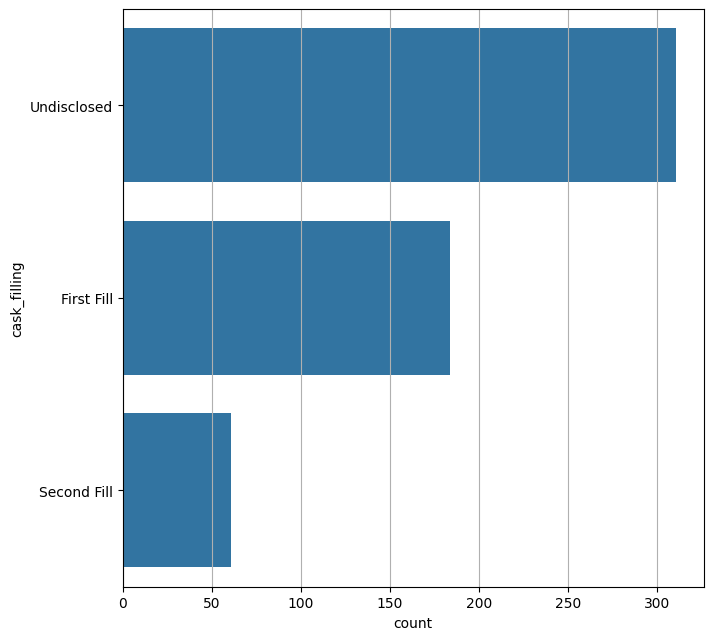

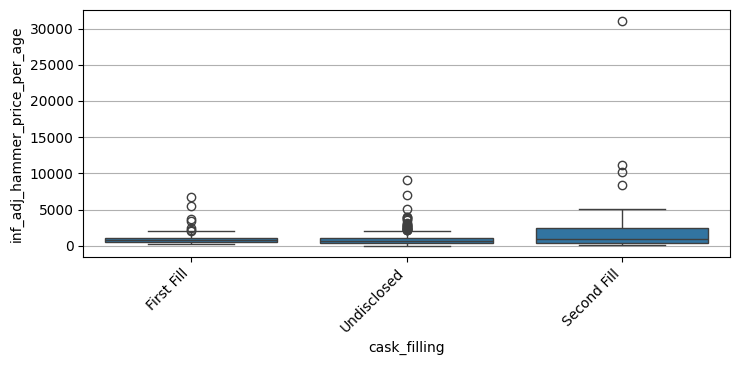

previous_spirit


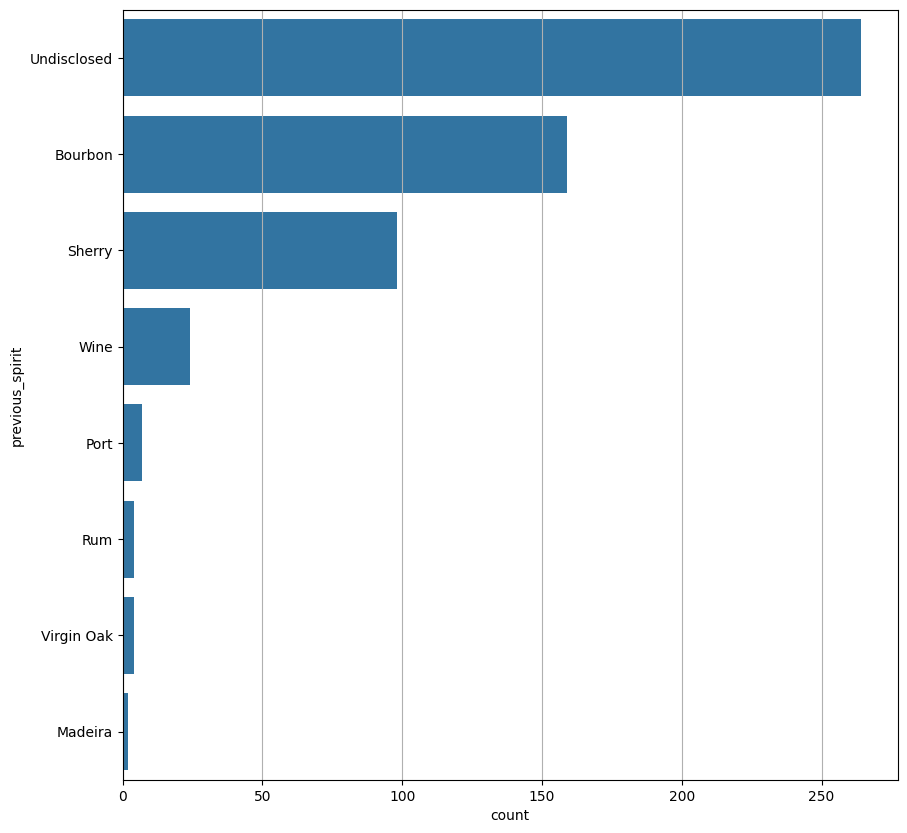

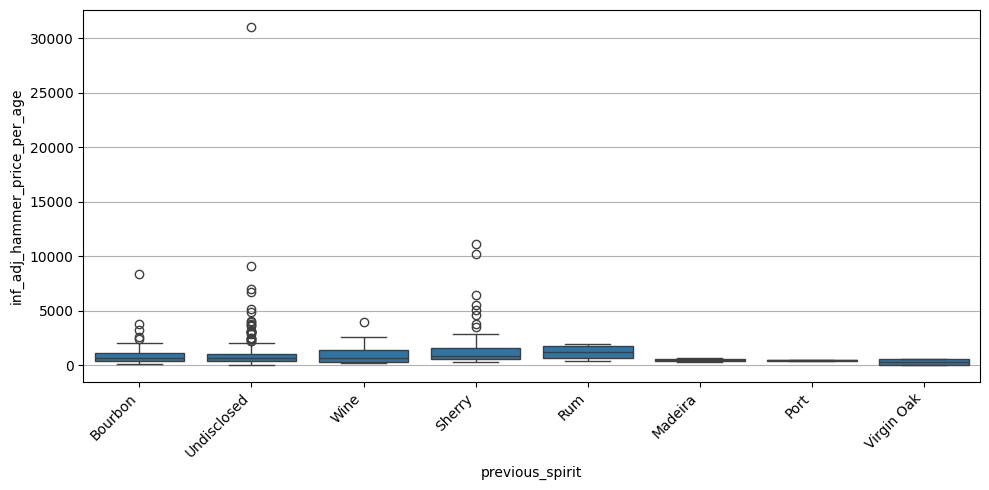

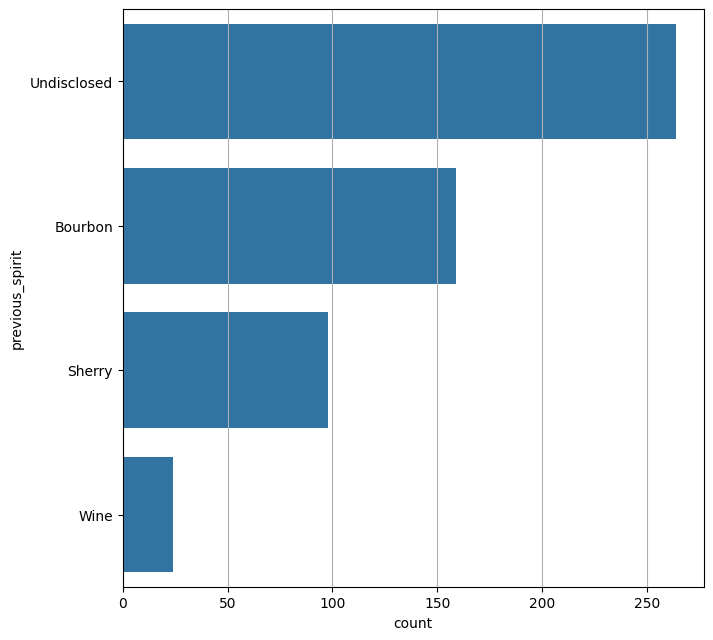

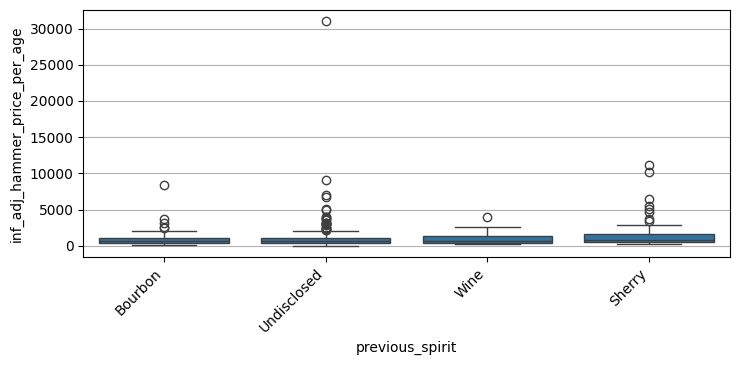



inf_adj_hammer_price_per_litre_of_alcohol
distillery


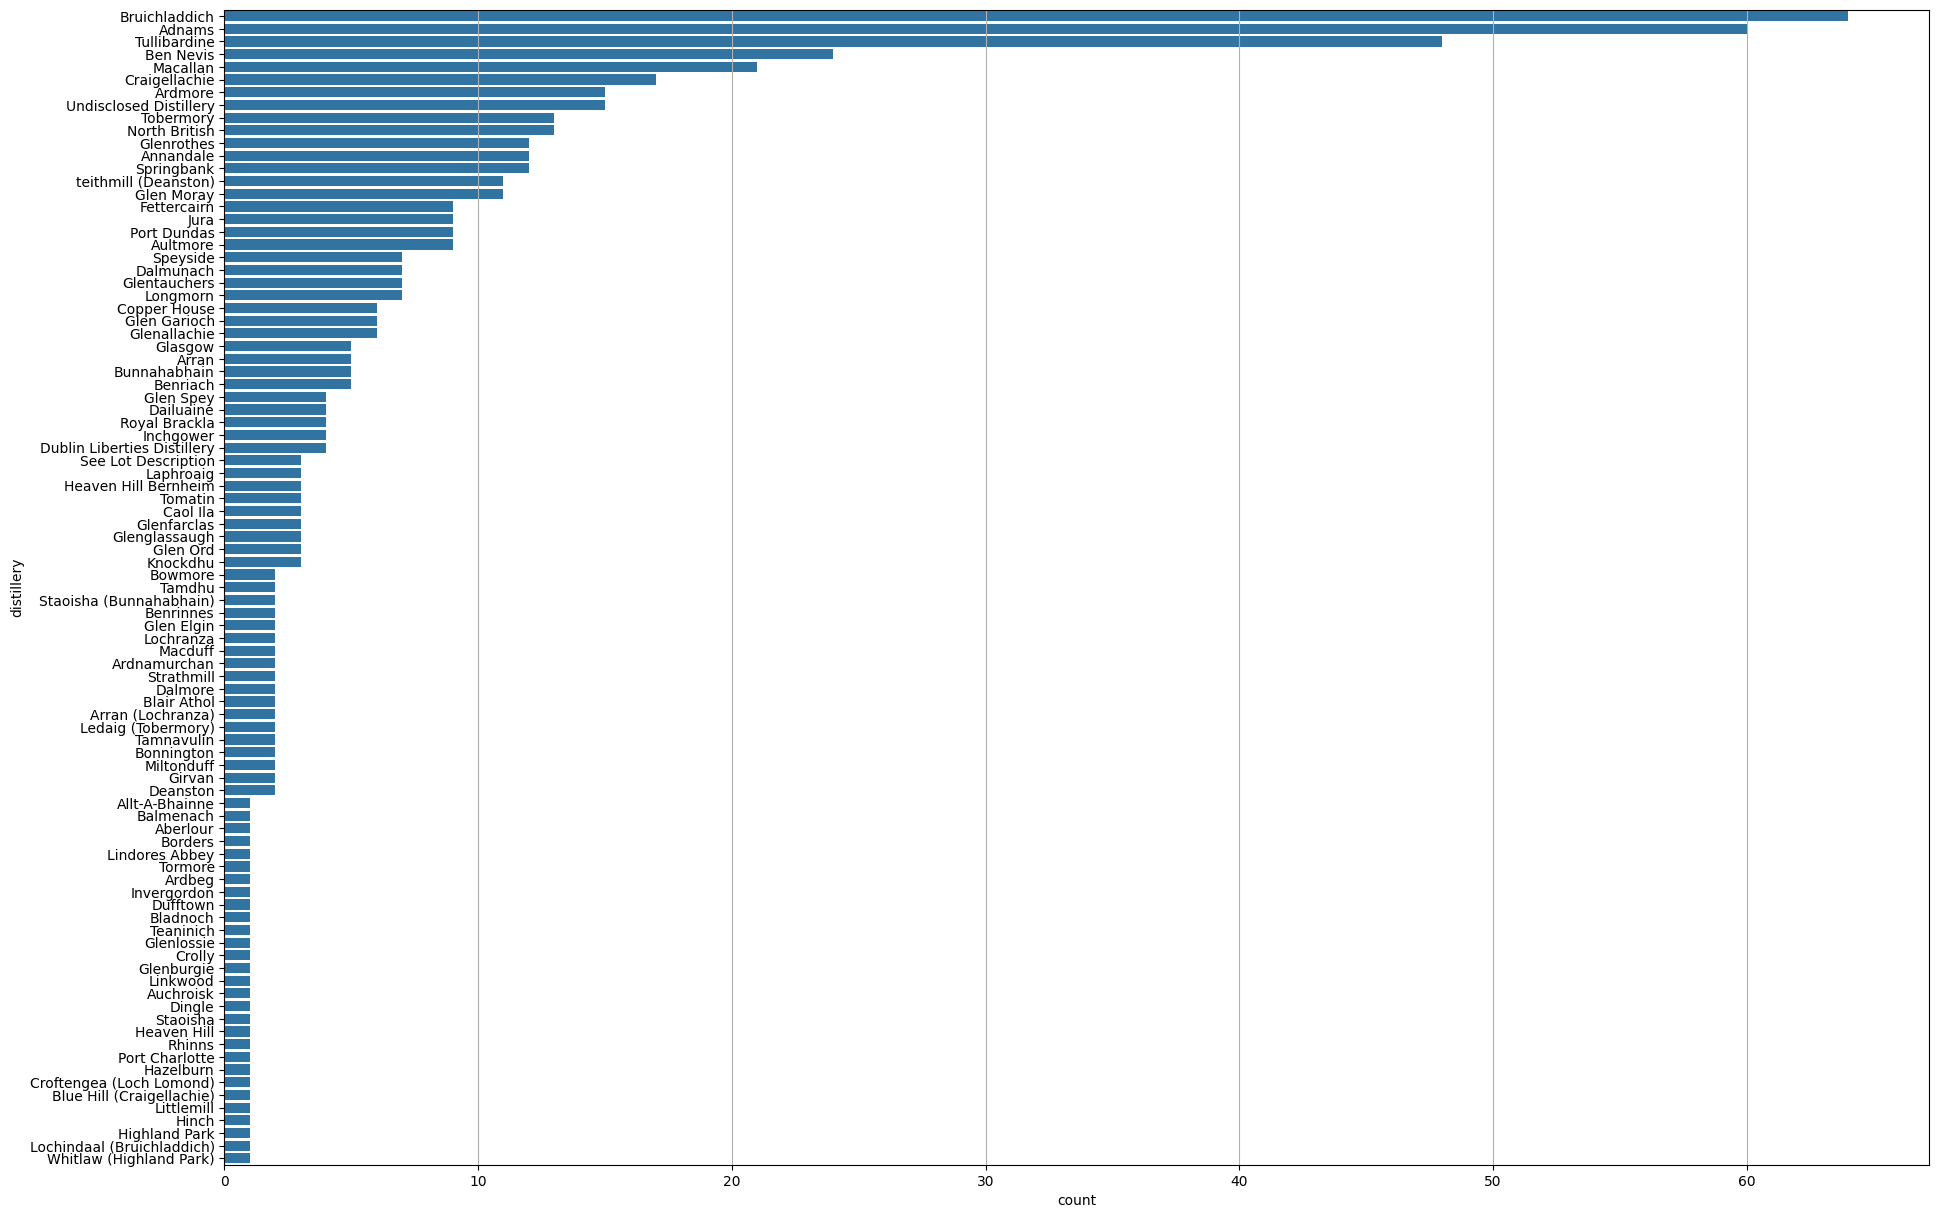

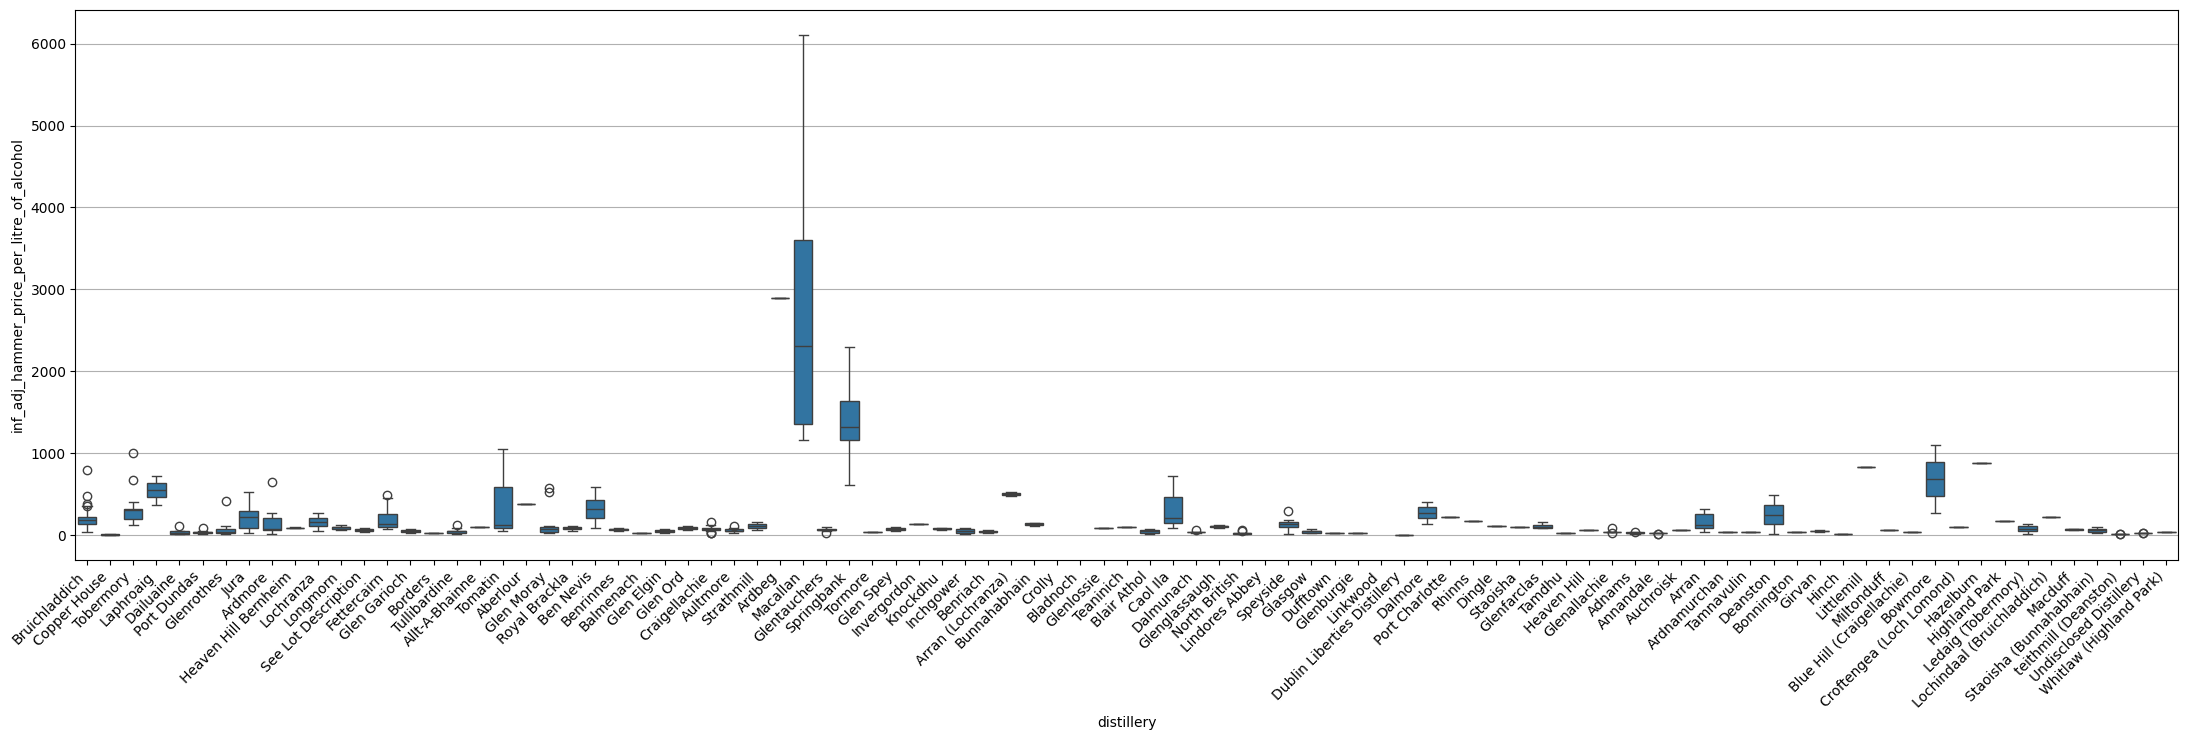

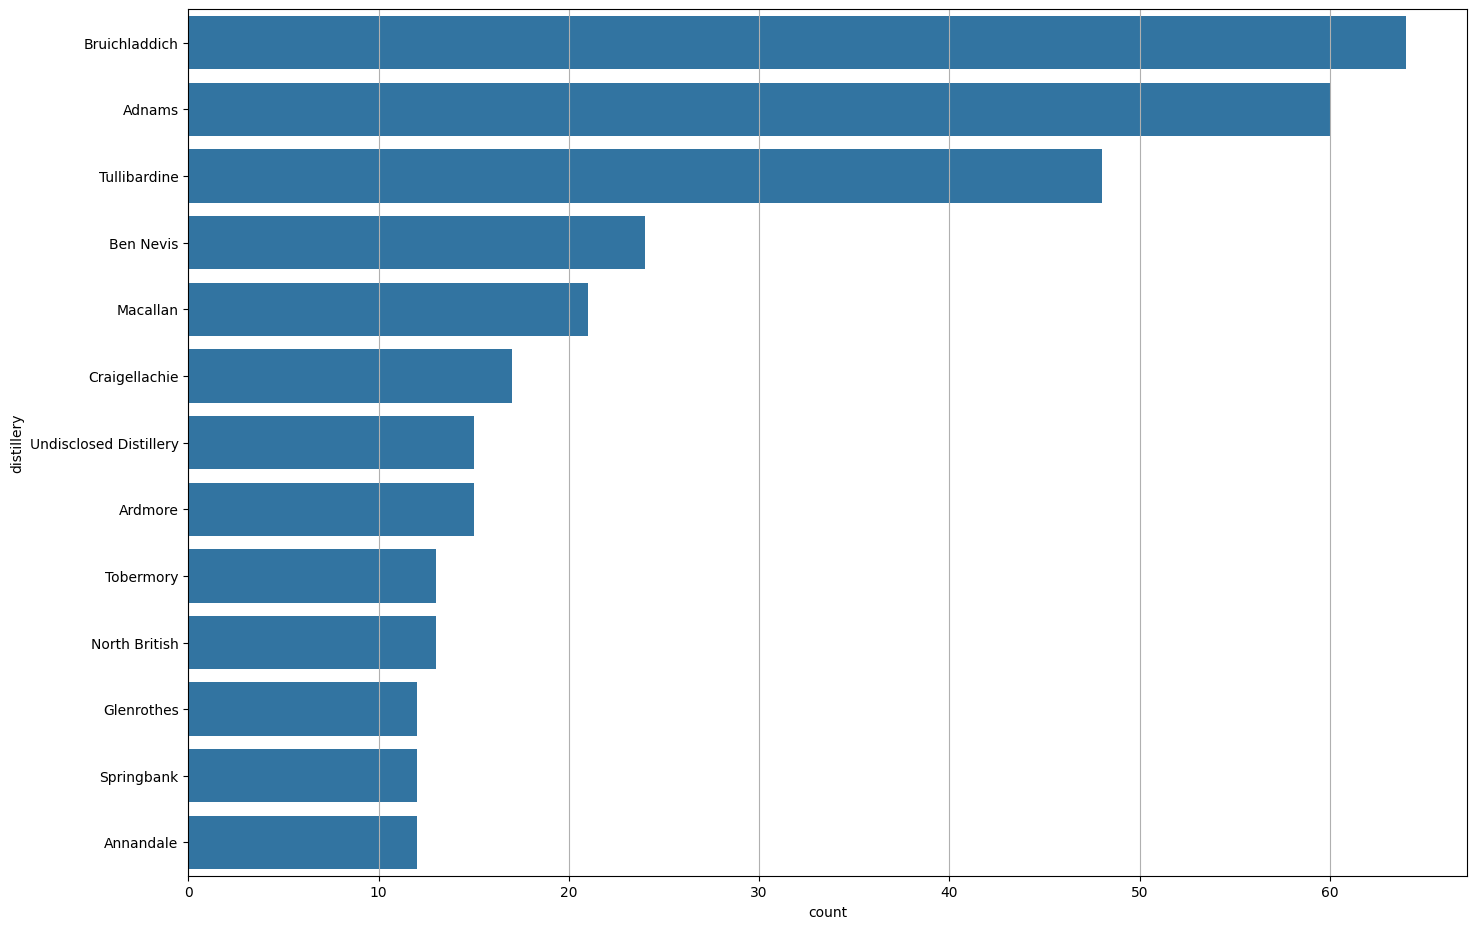

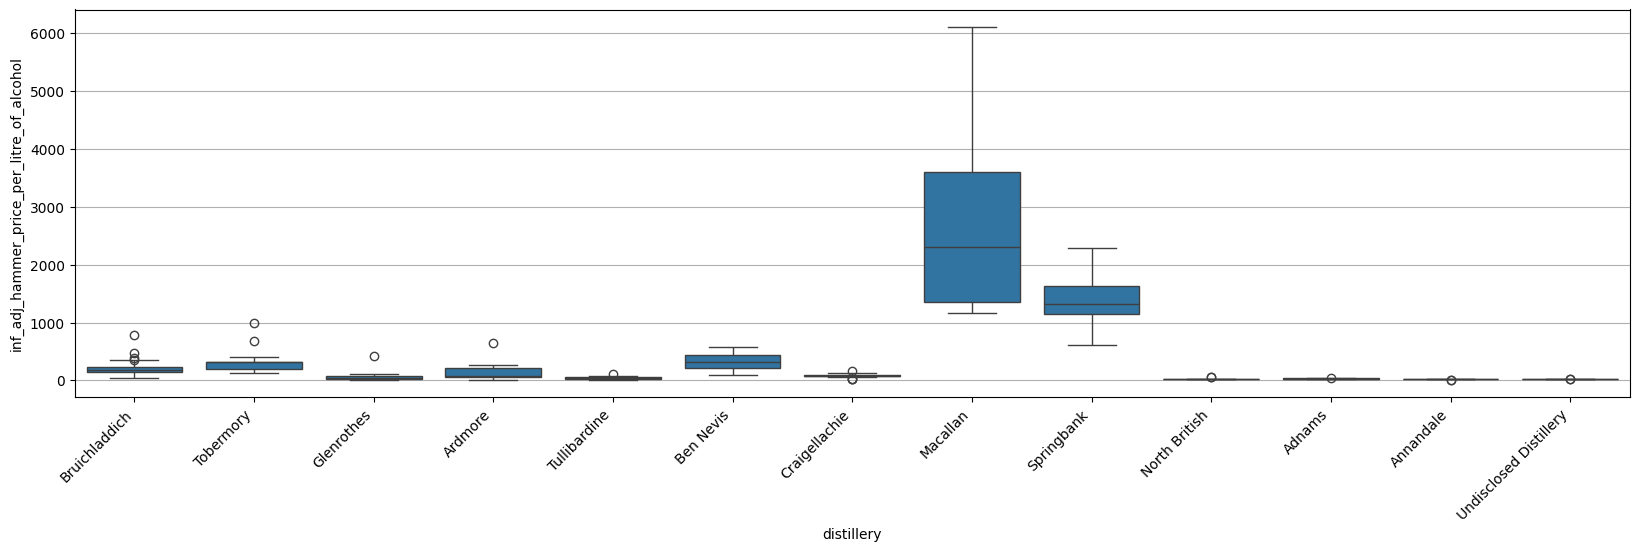

region


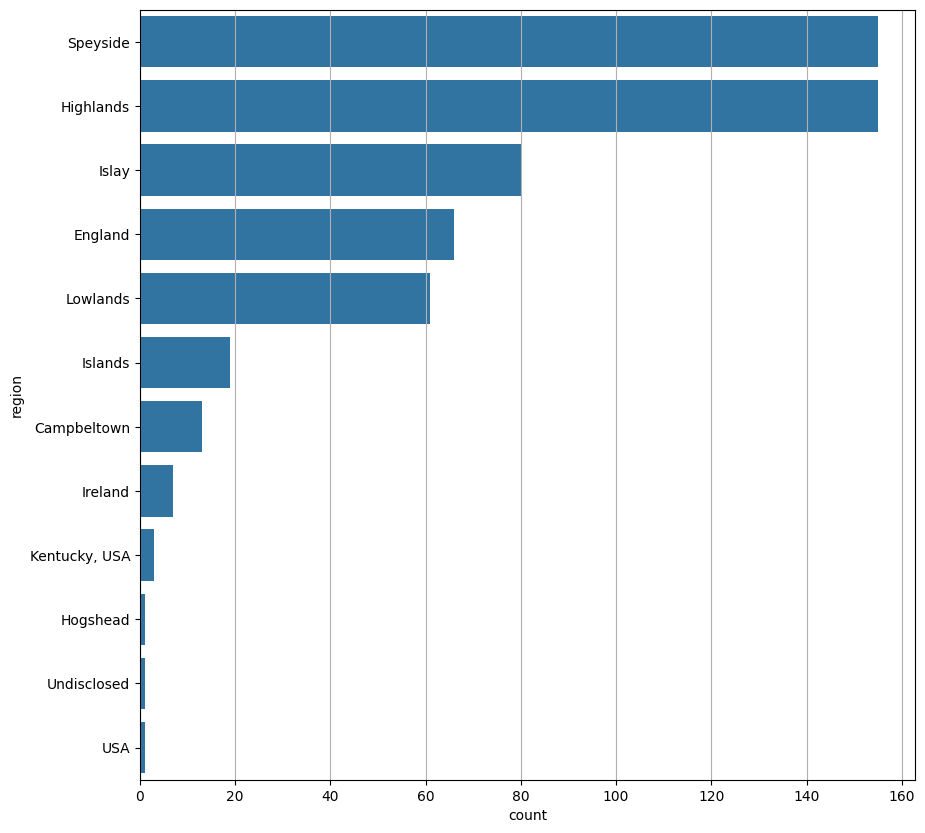

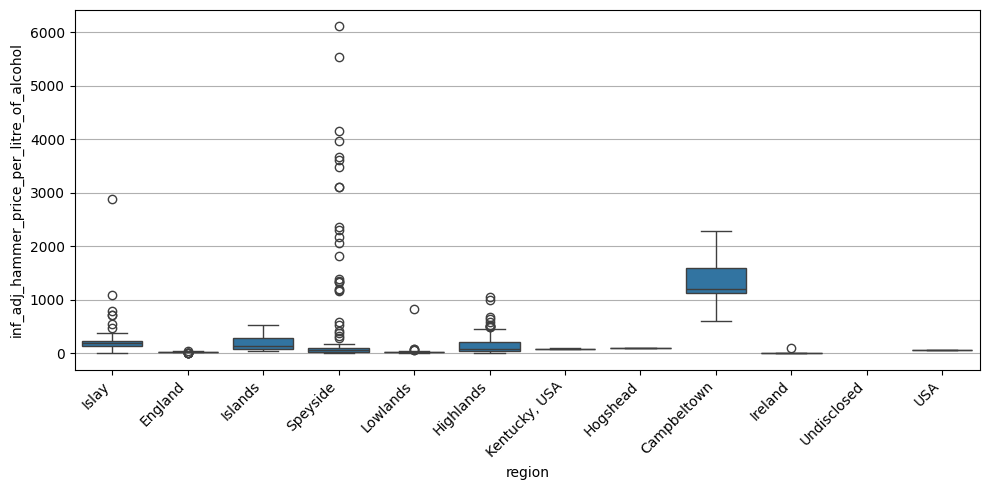

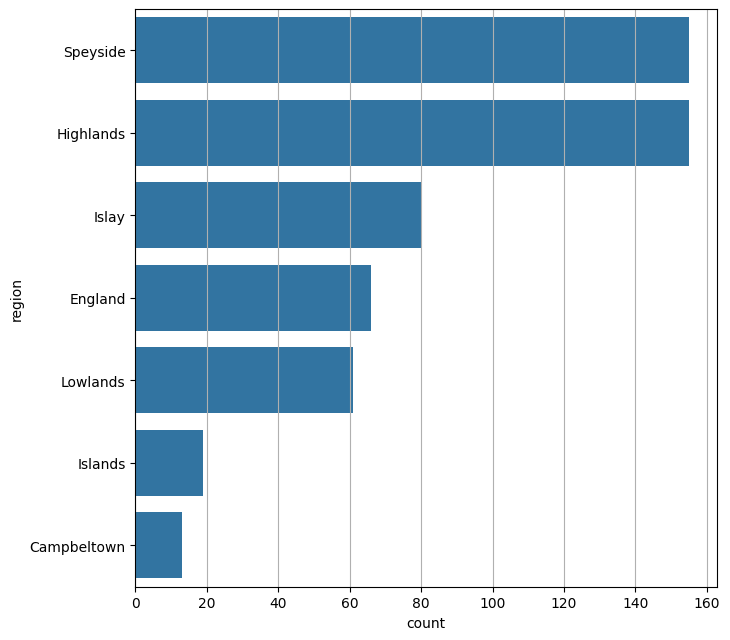

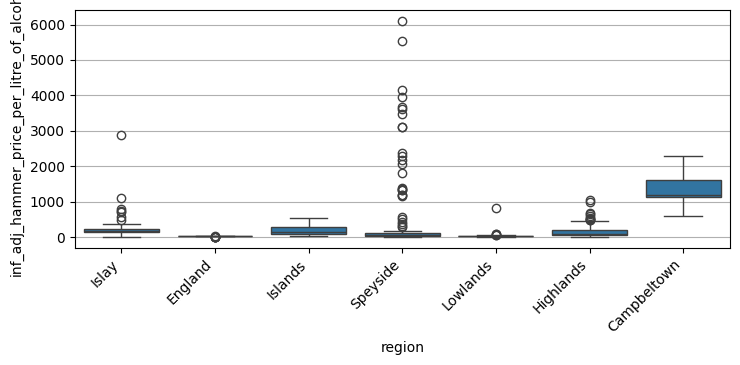

country


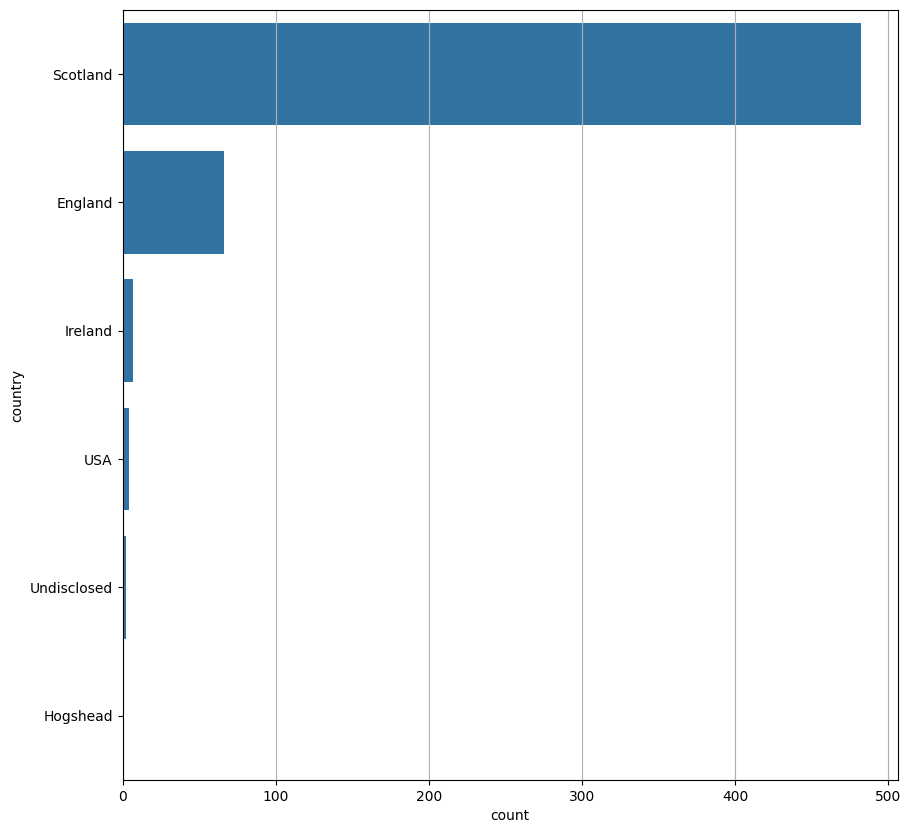

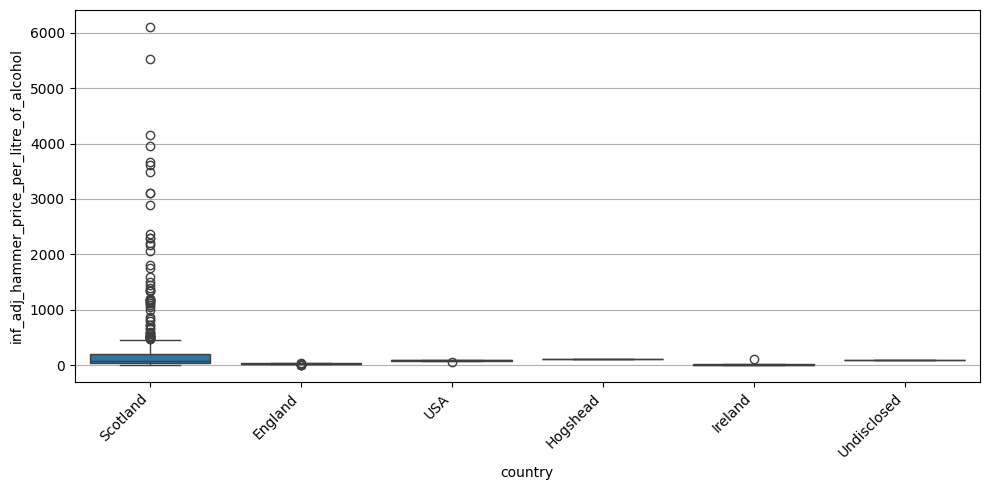

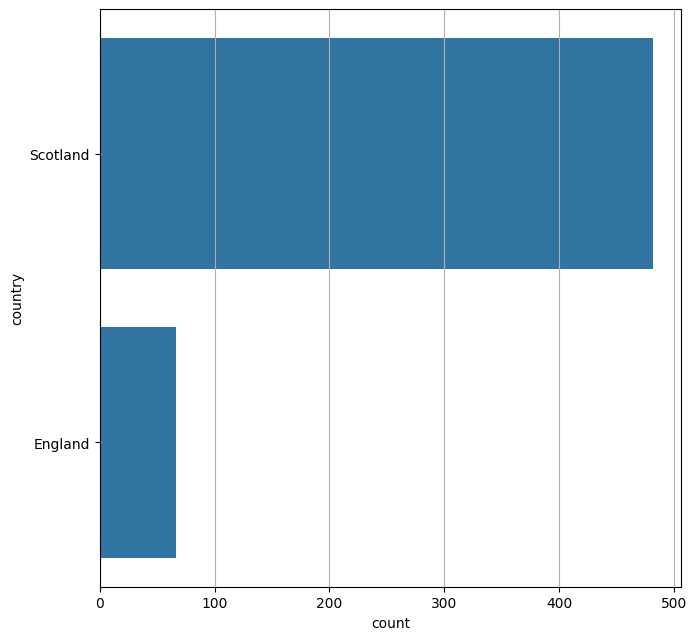

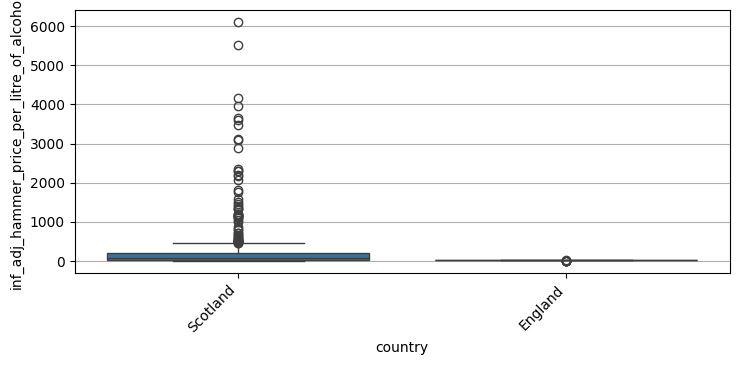

distillery_status


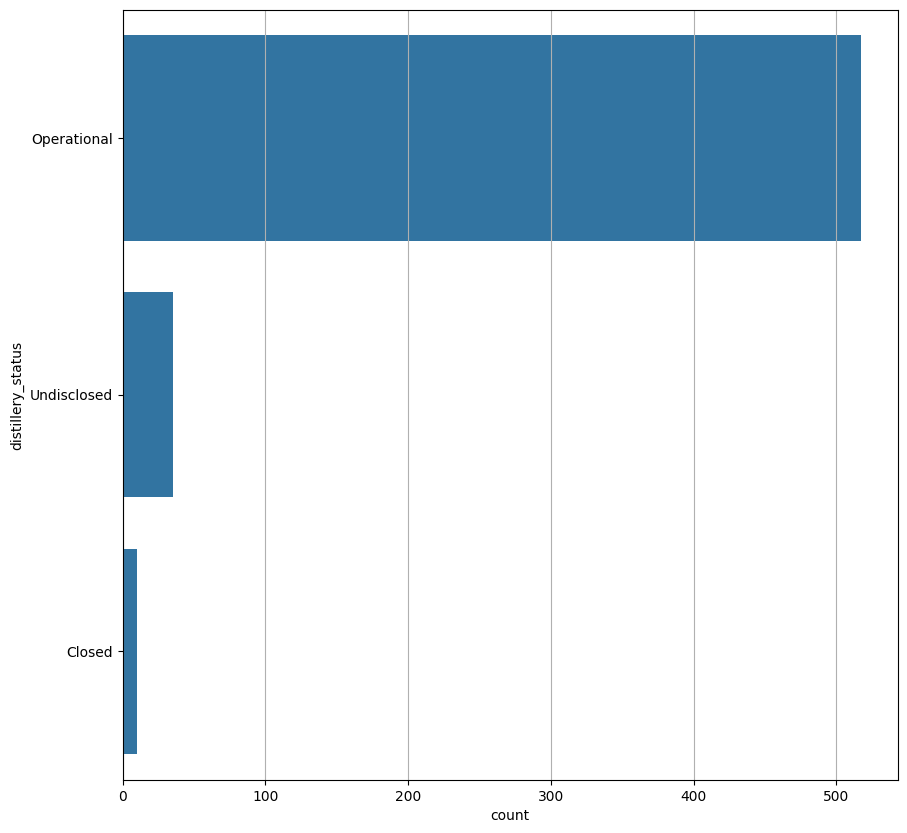

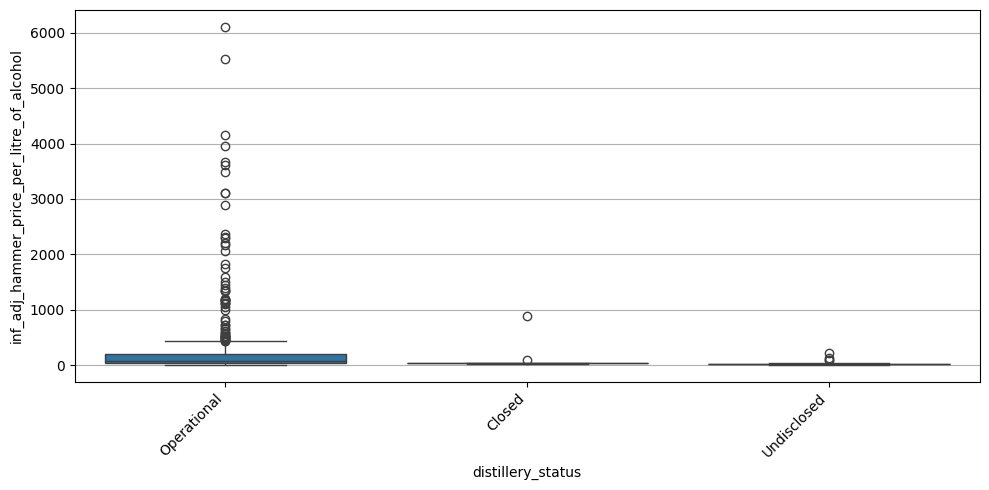

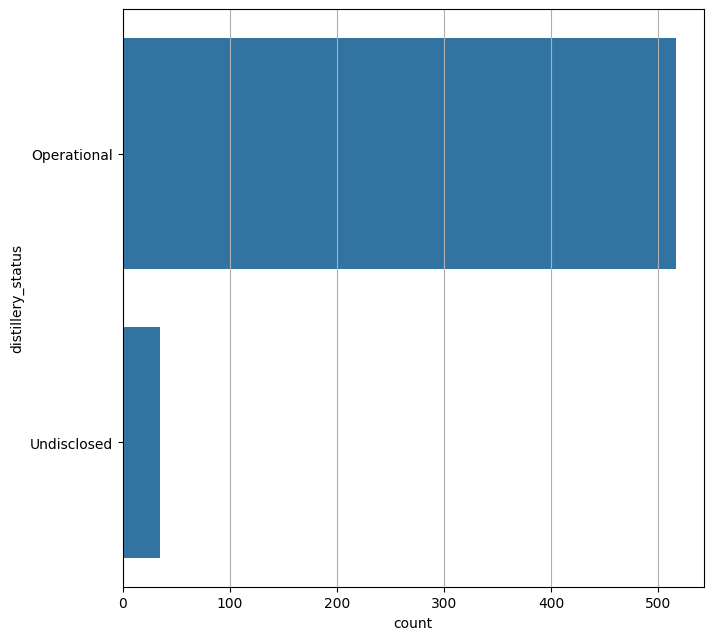

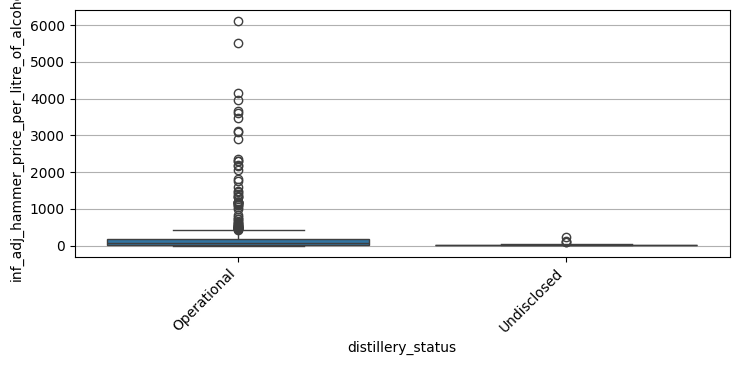

cask_type


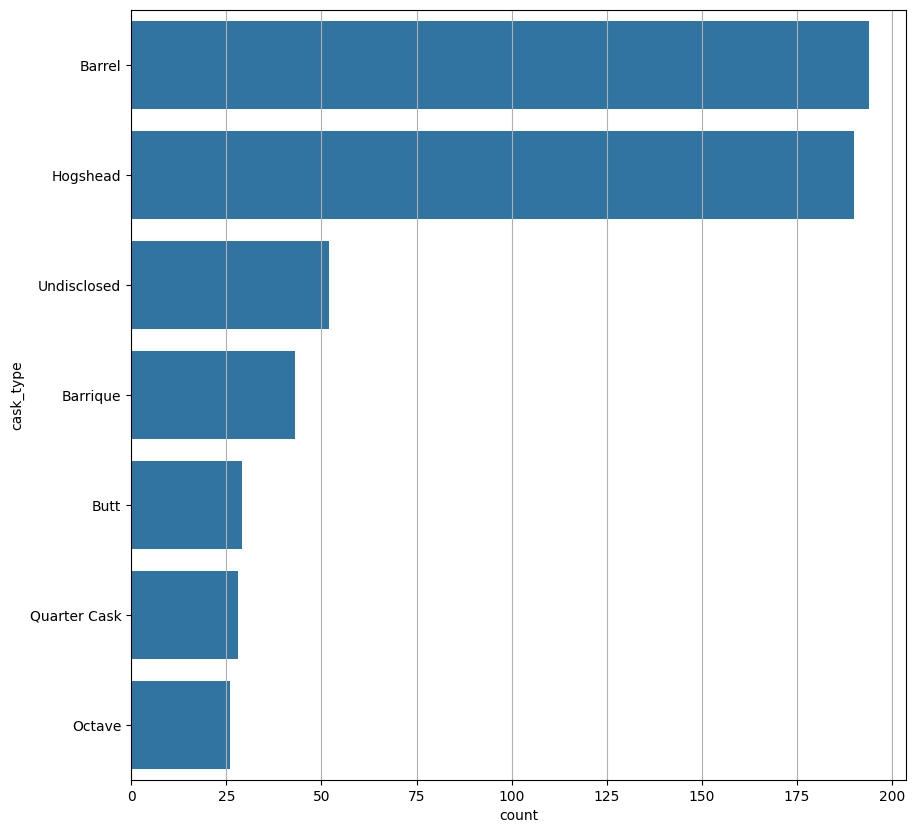

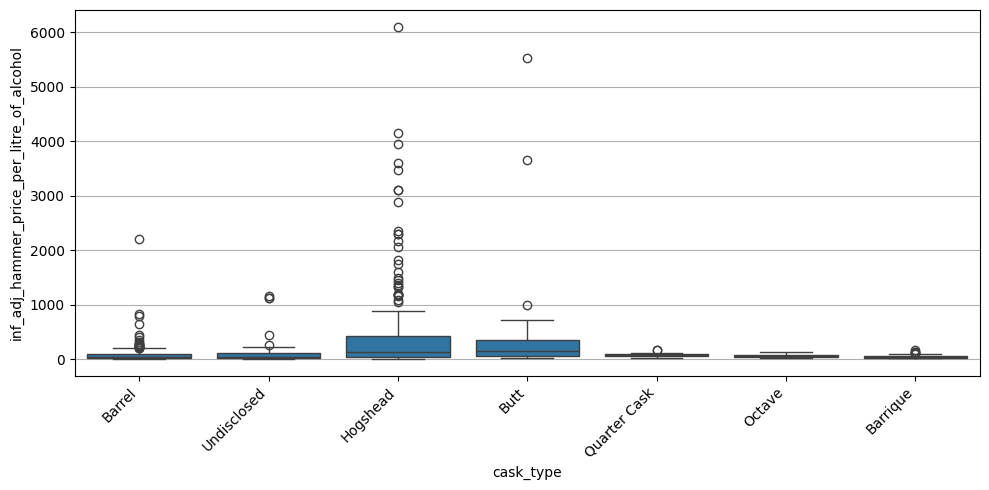

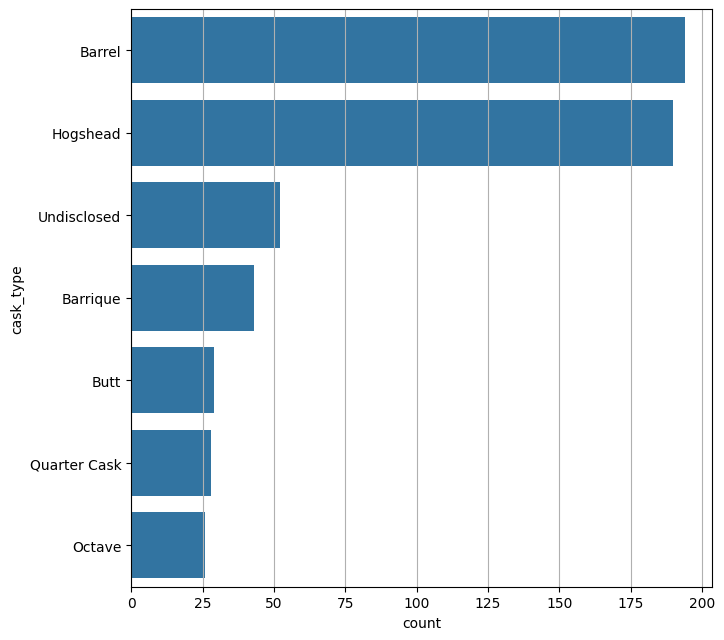

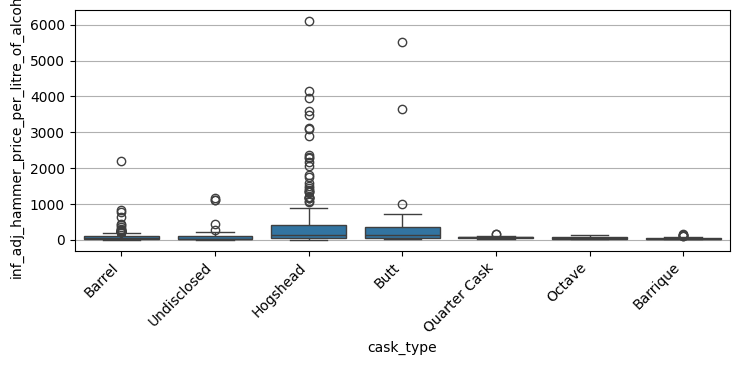

cask_filling


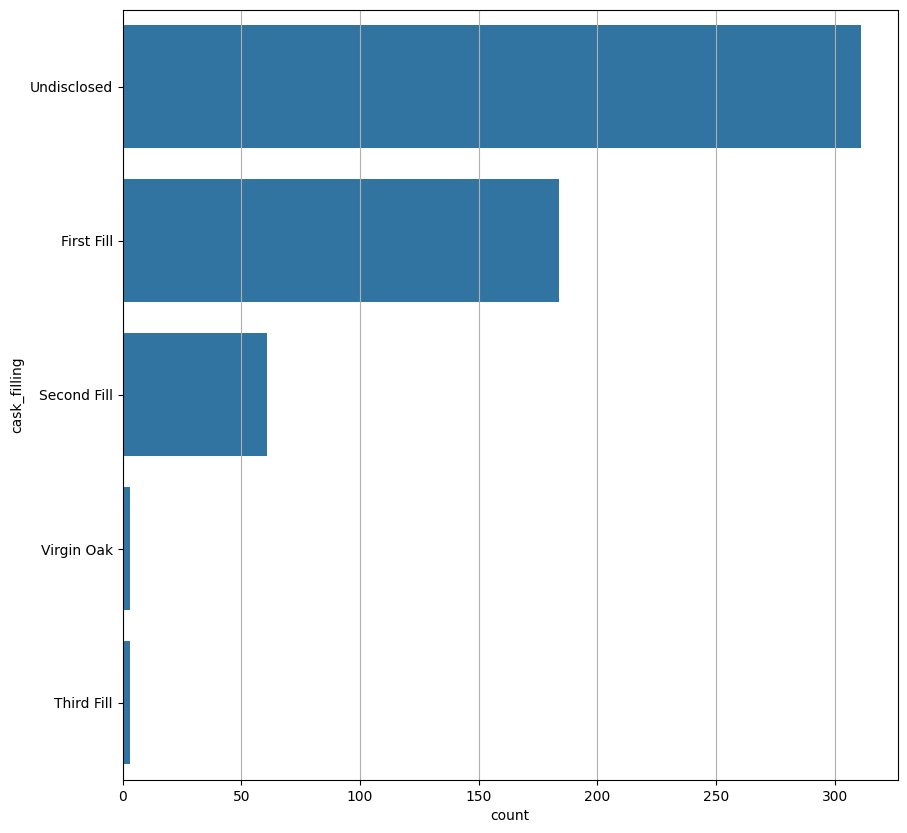

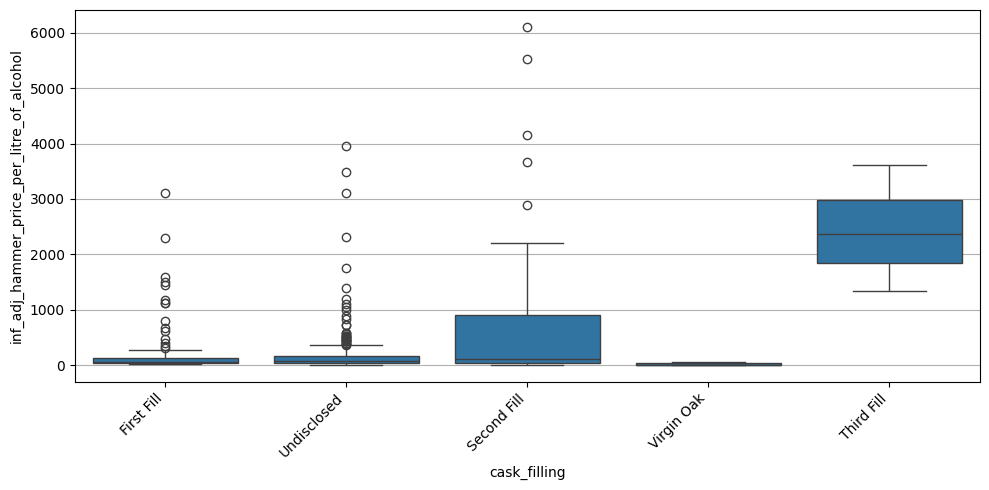

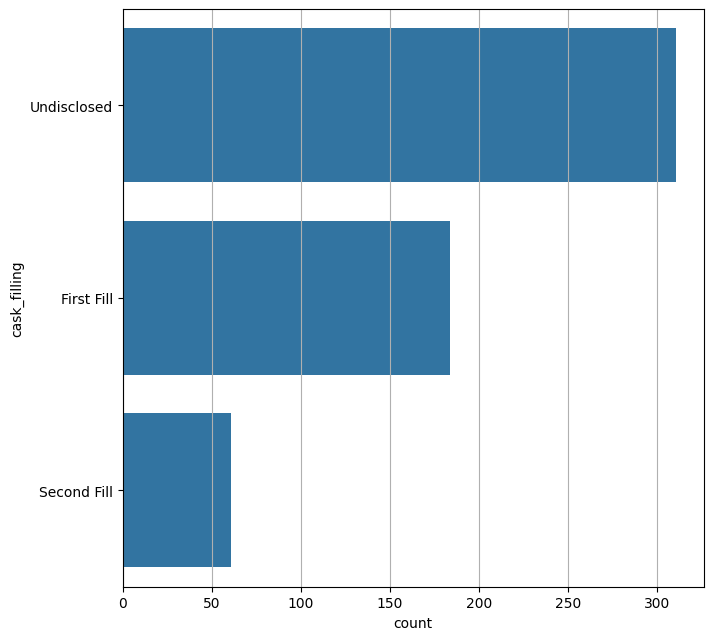

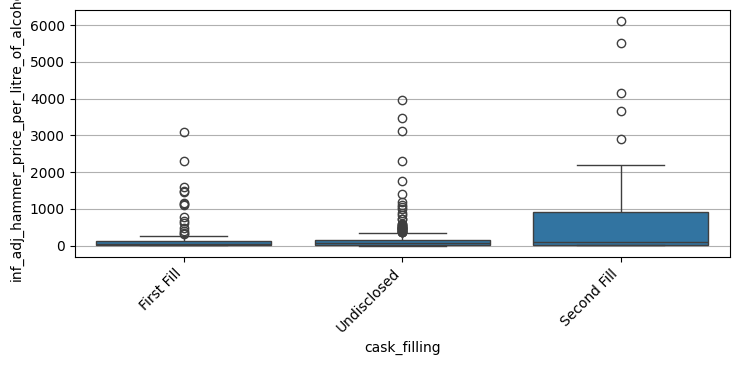

previous_spirit


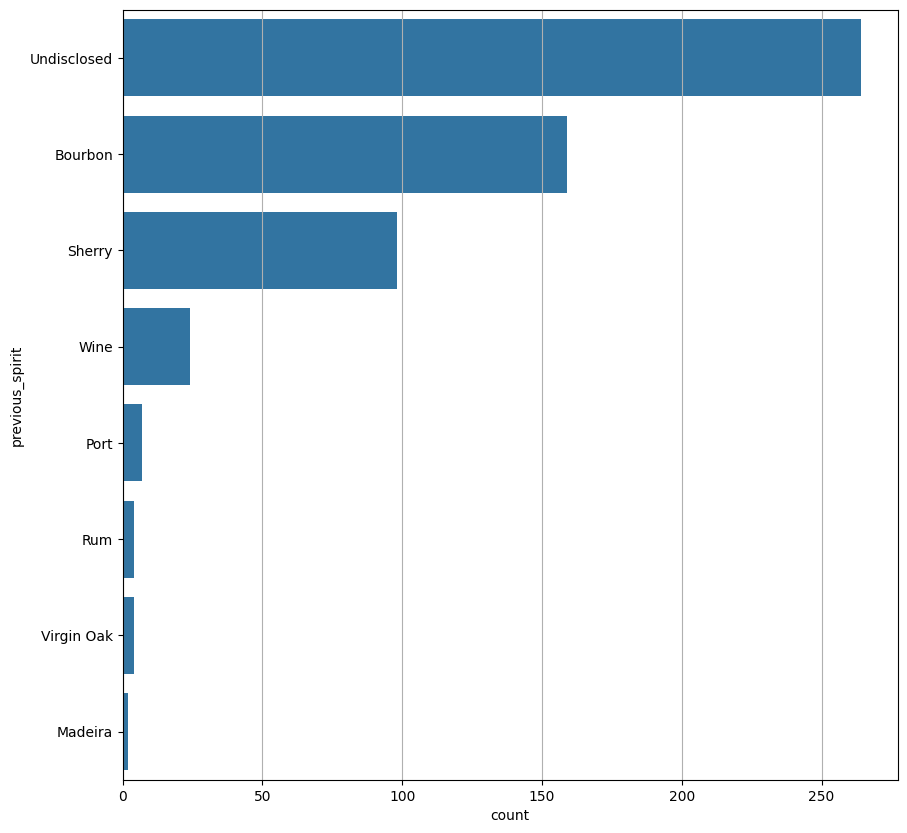

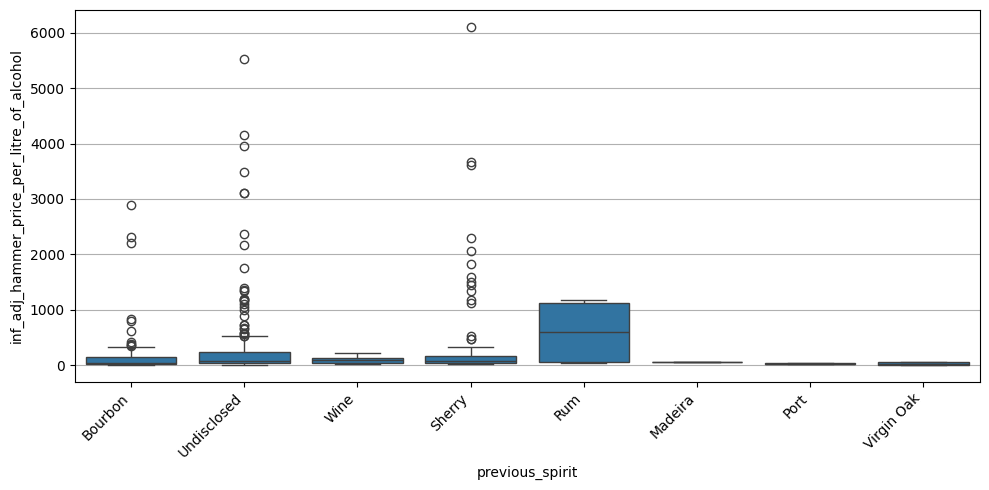

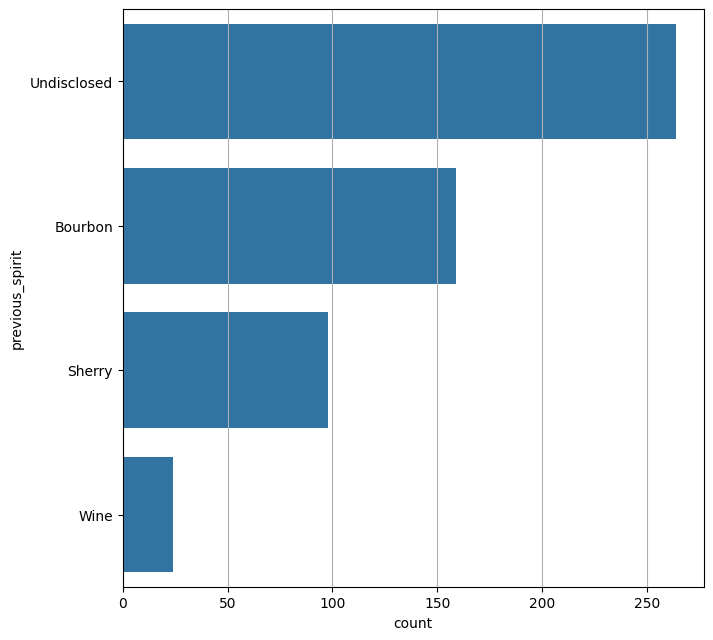

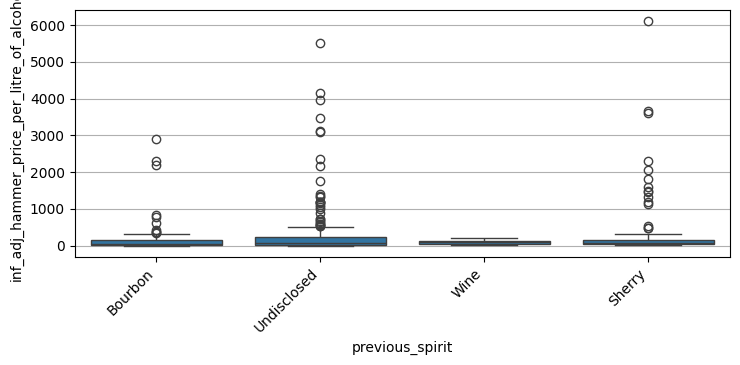



inf_adj_hammer_price_per_litre_of_alcohol_per_age
distillery


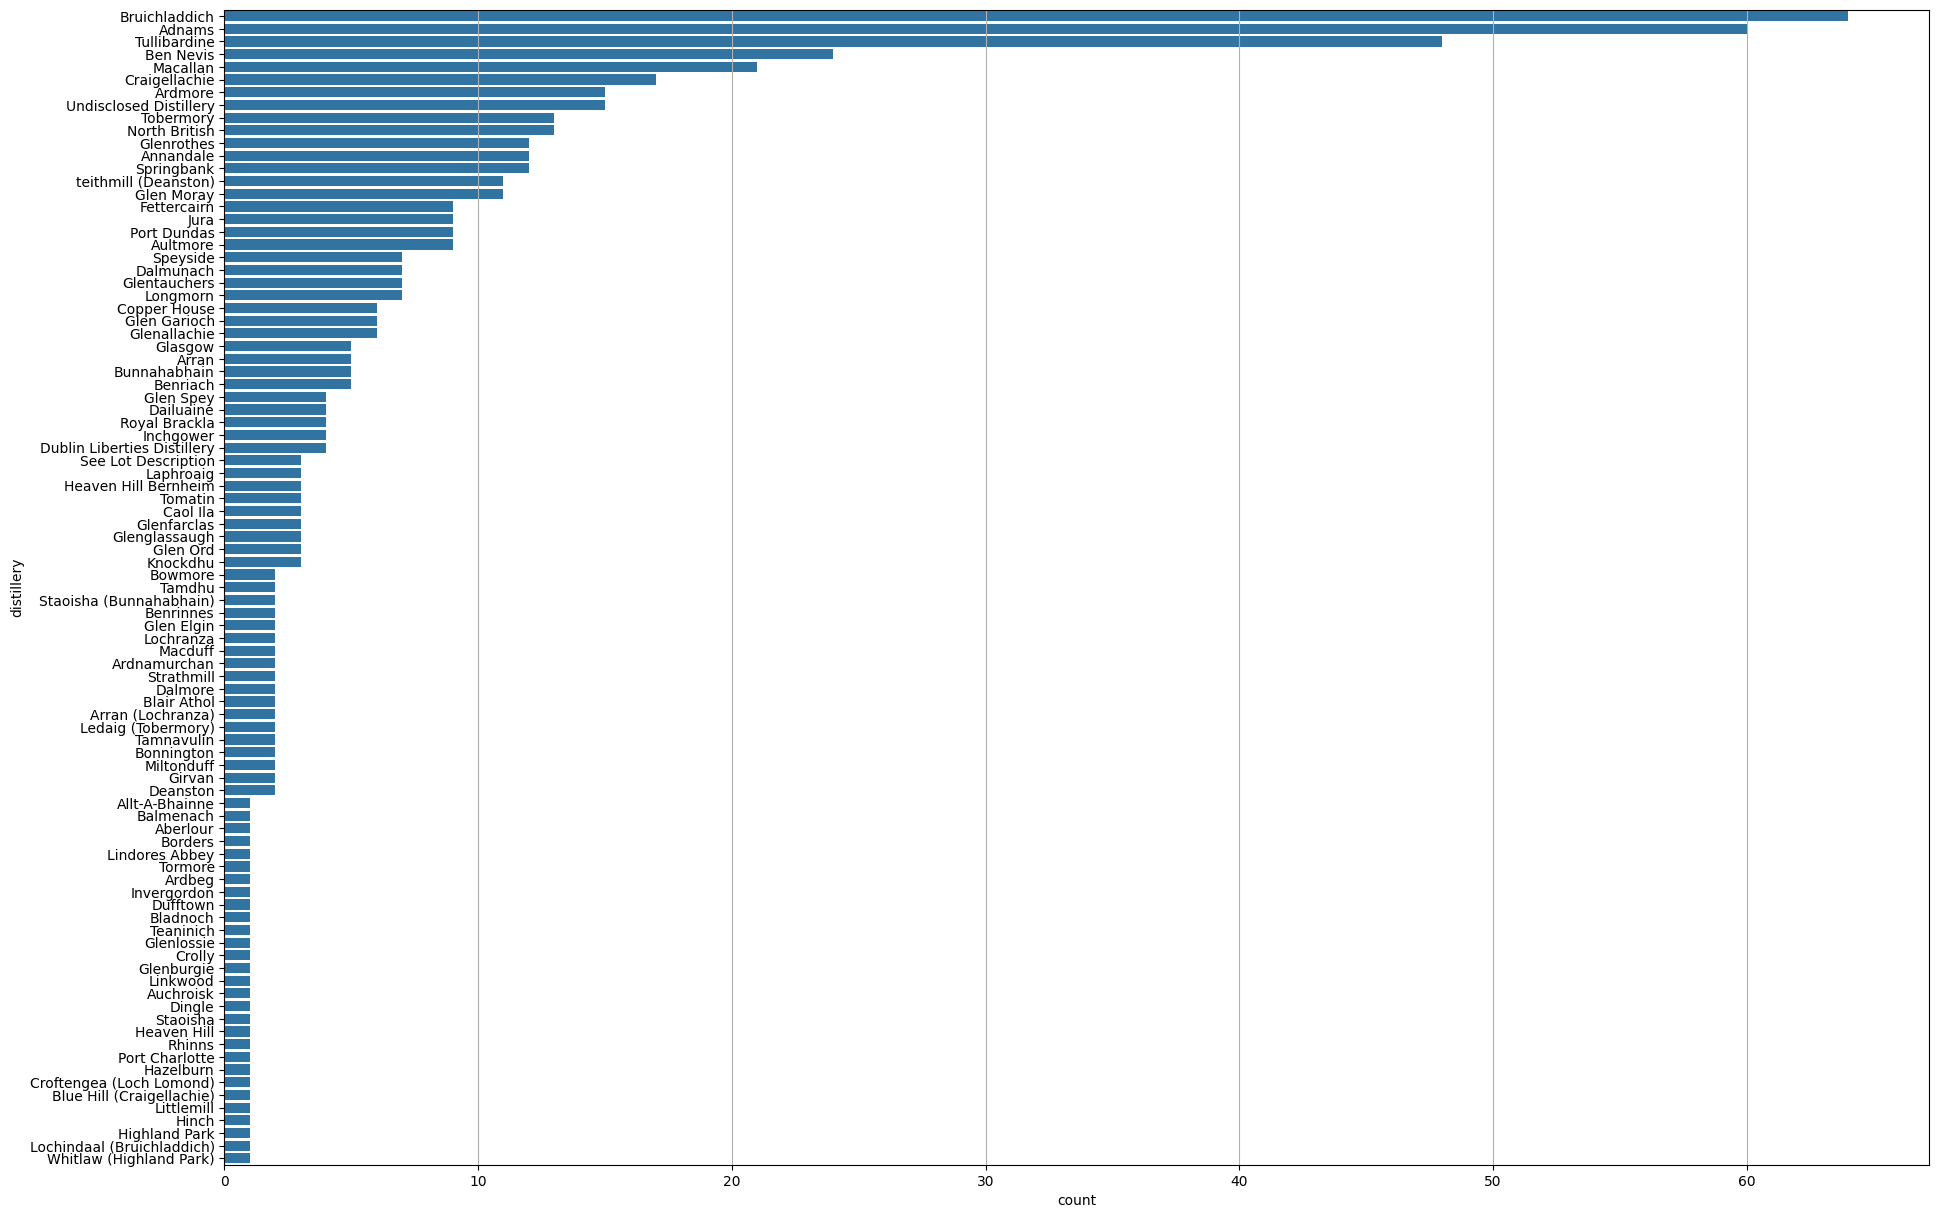

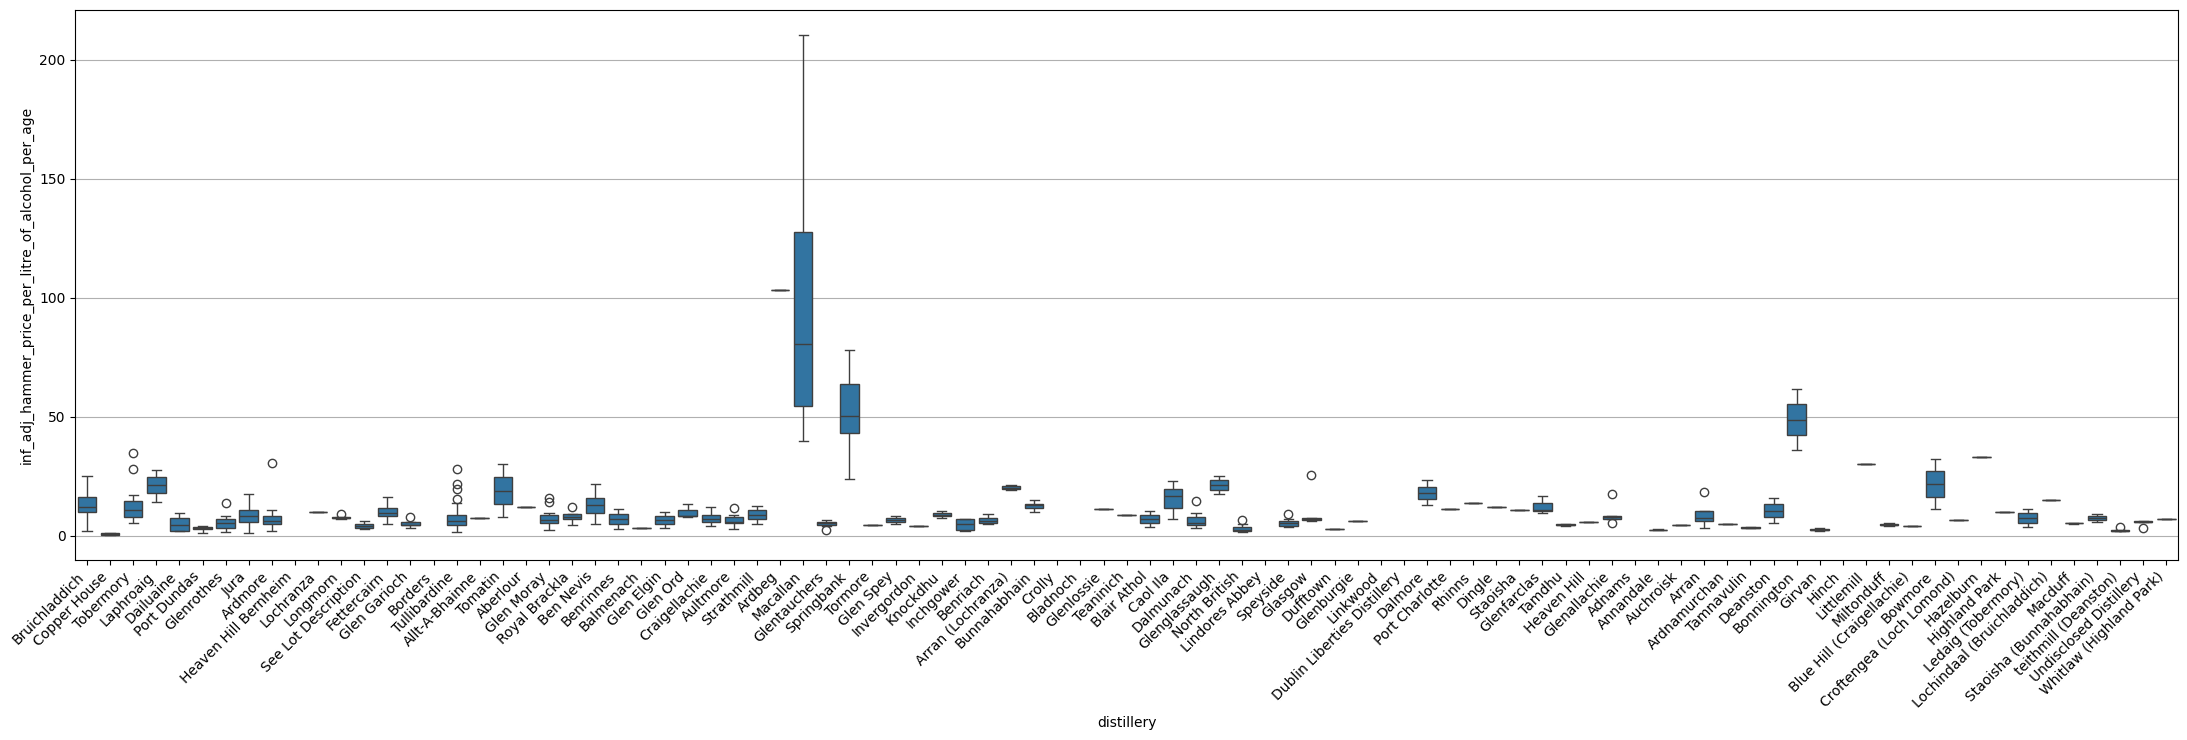

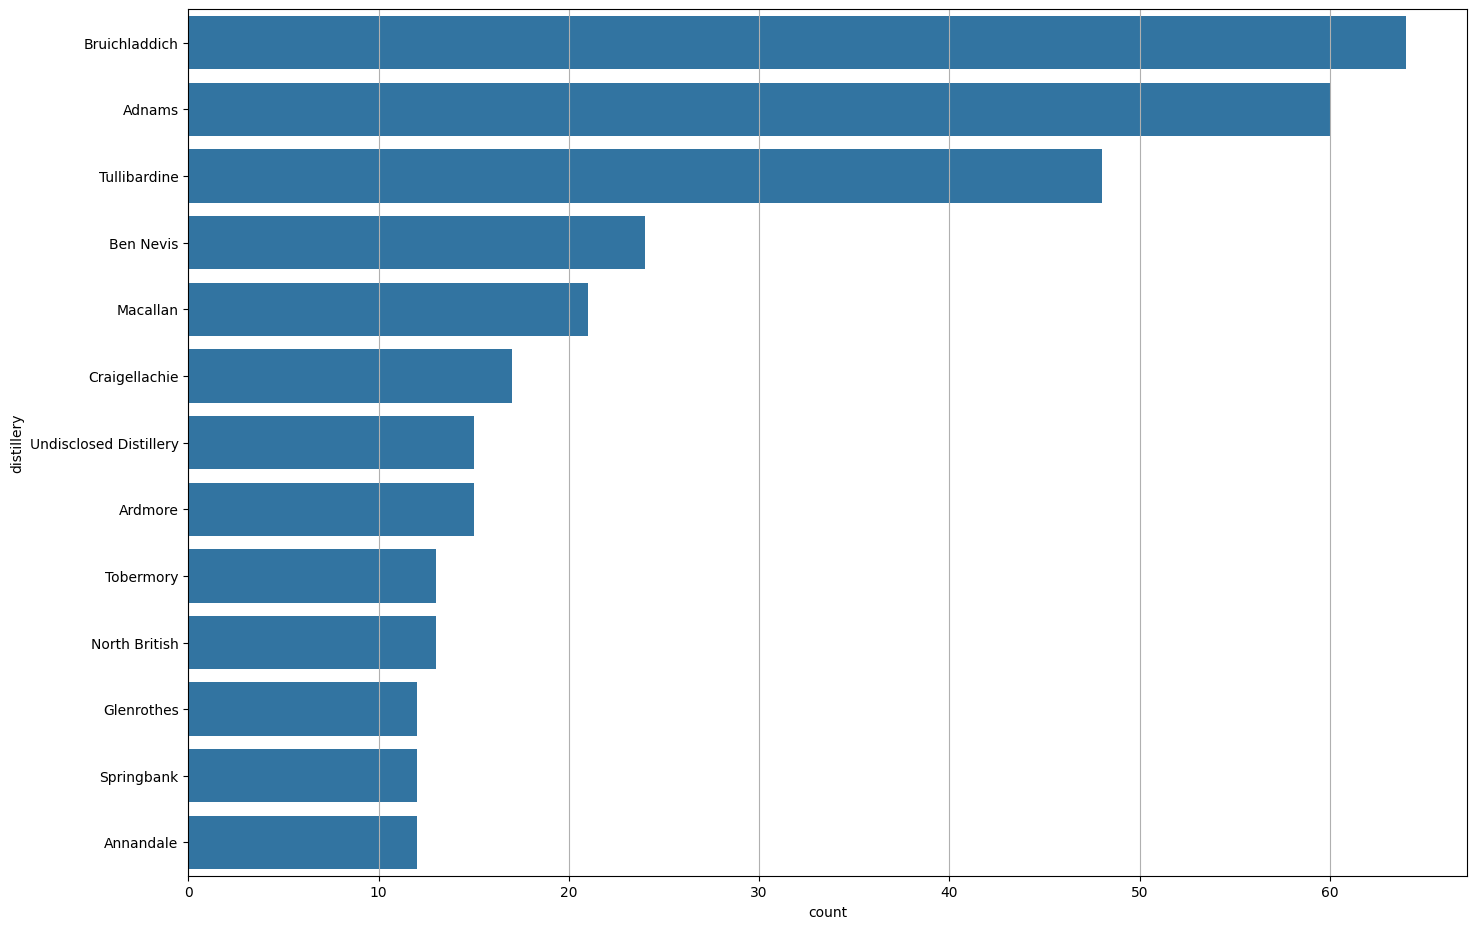

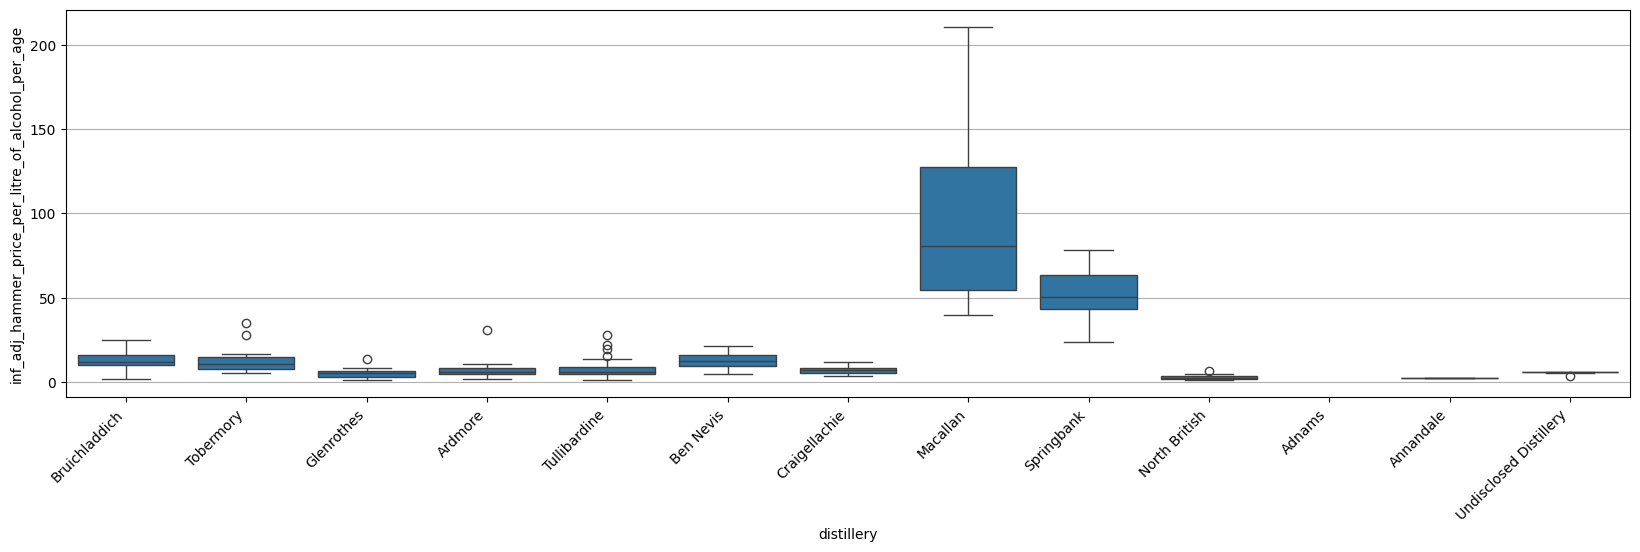

region


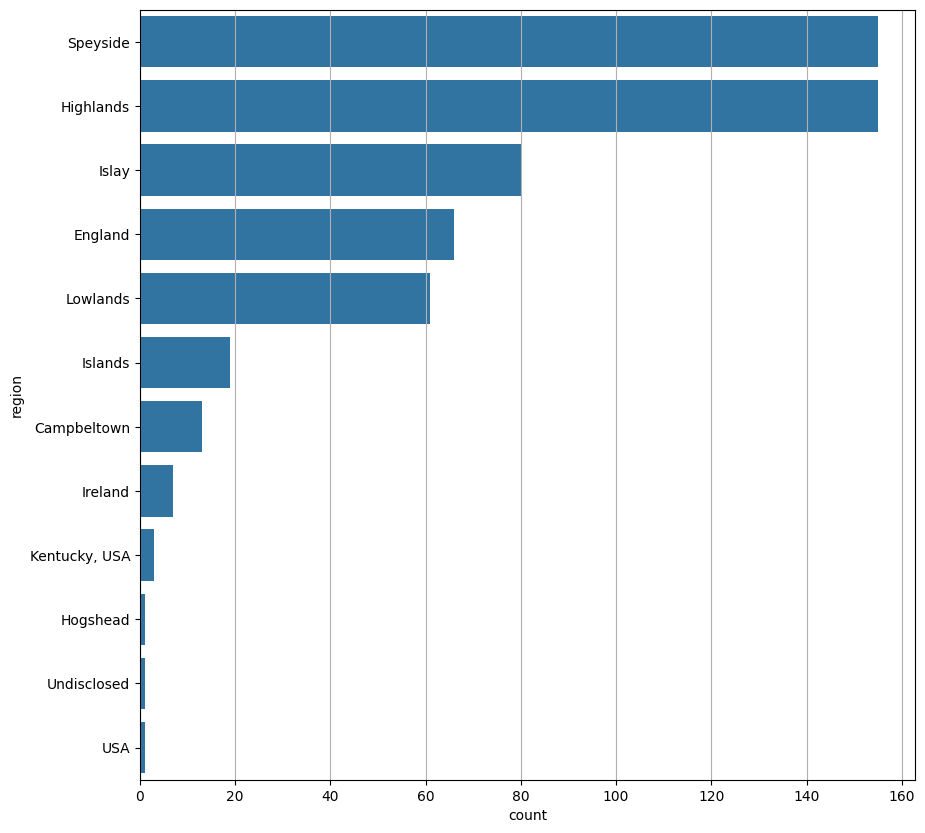

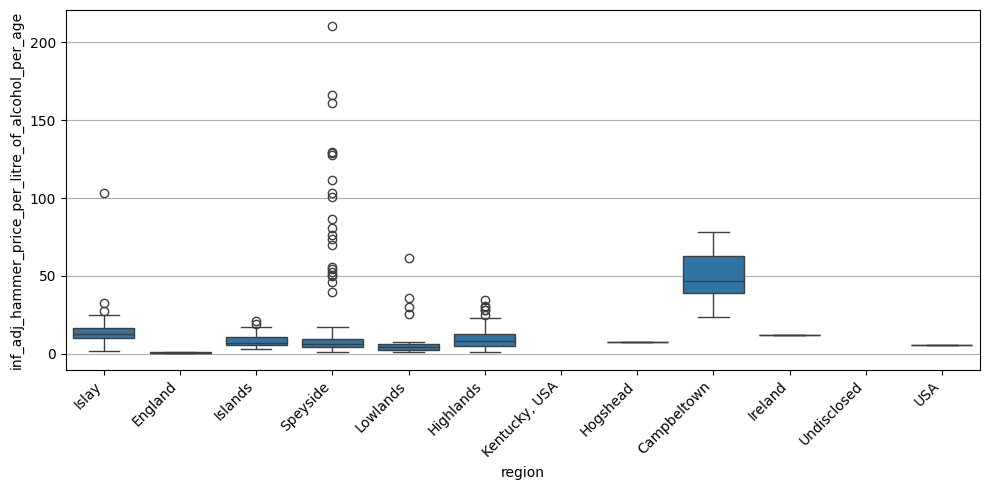

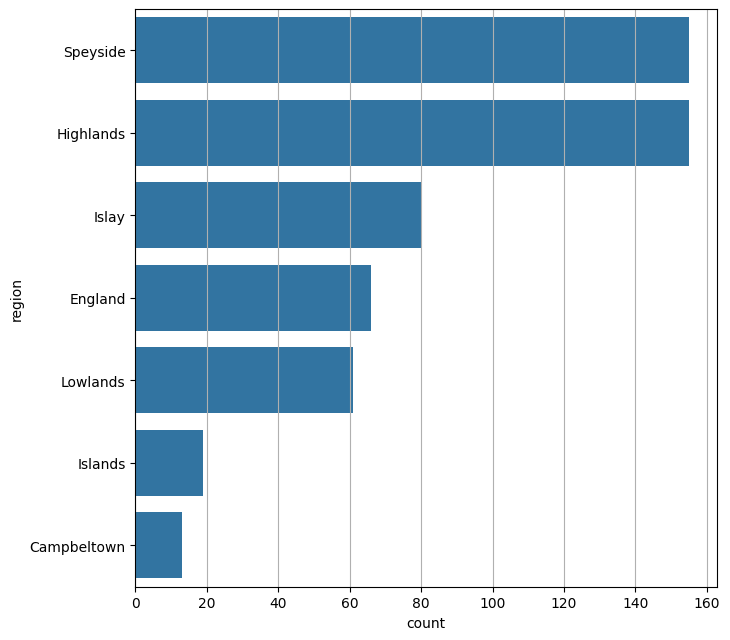

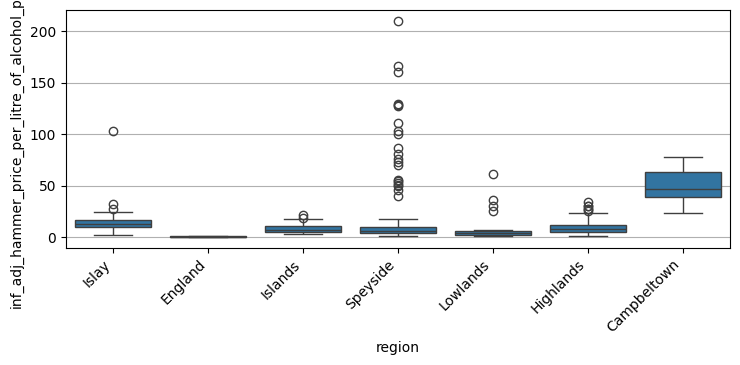

country


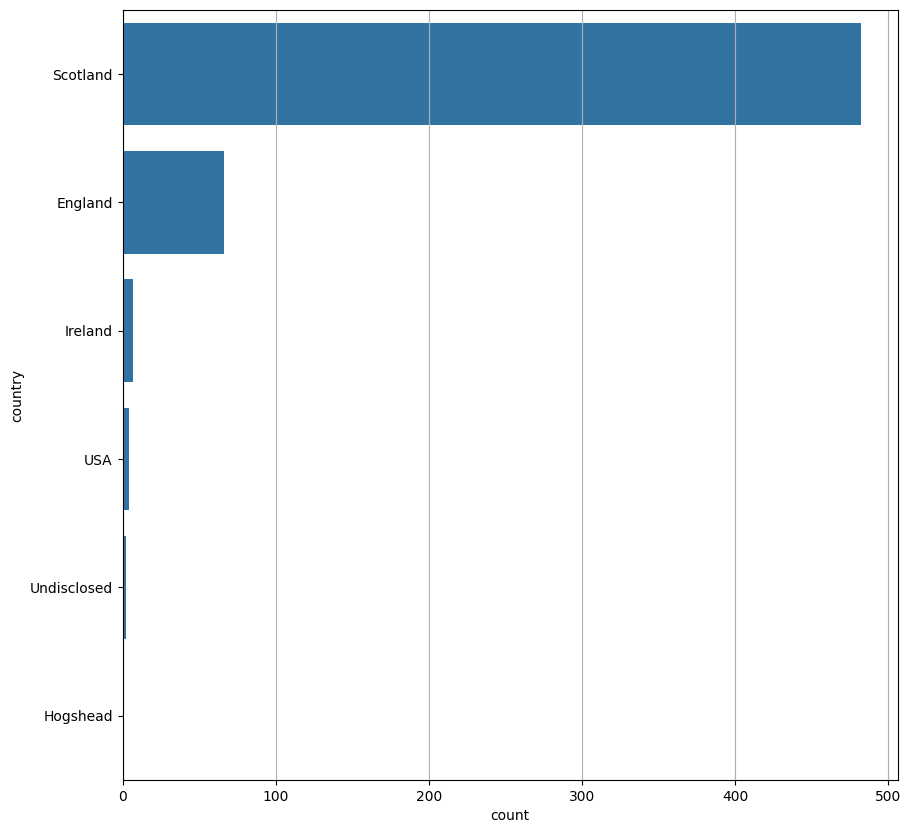

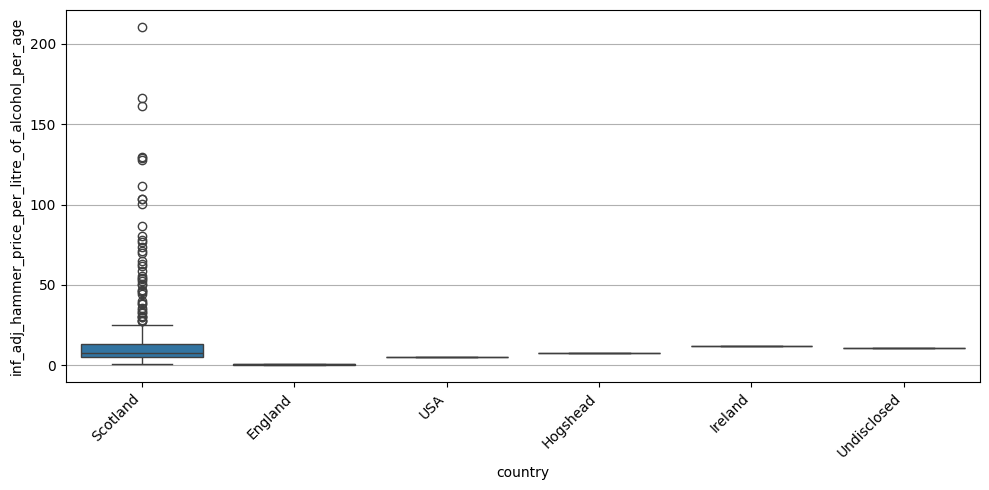

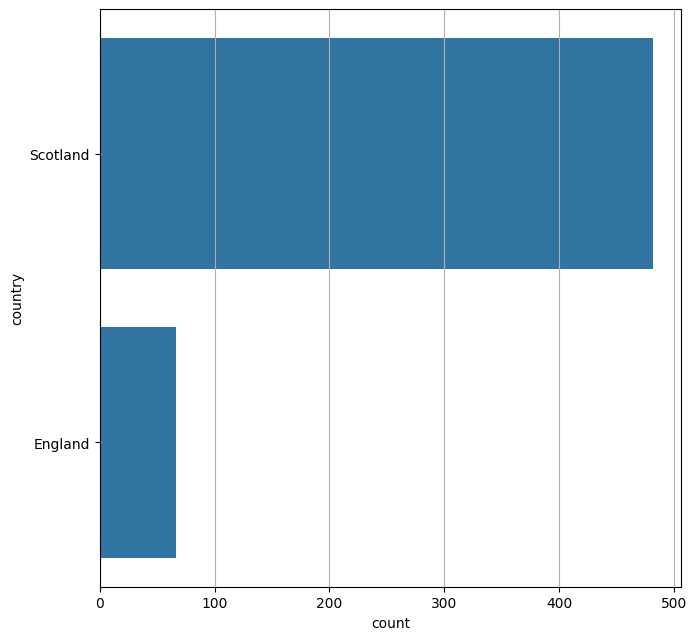

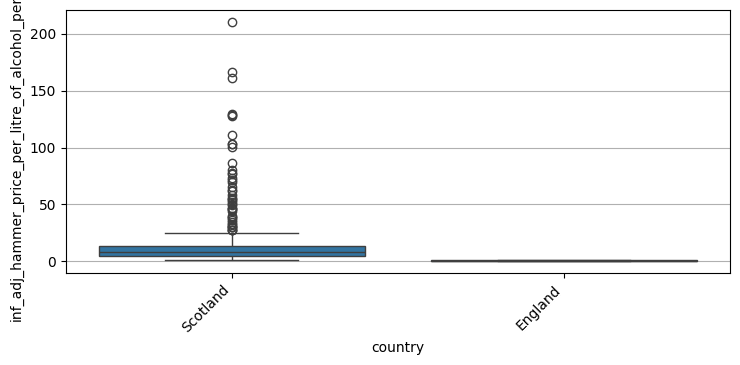

distillery_status


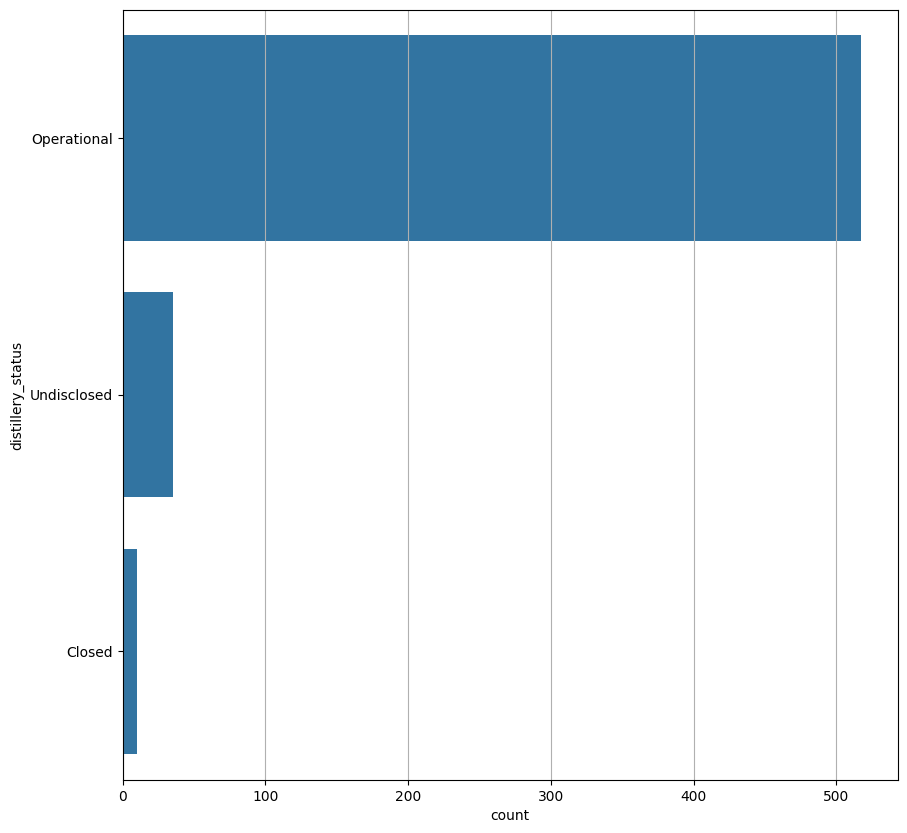

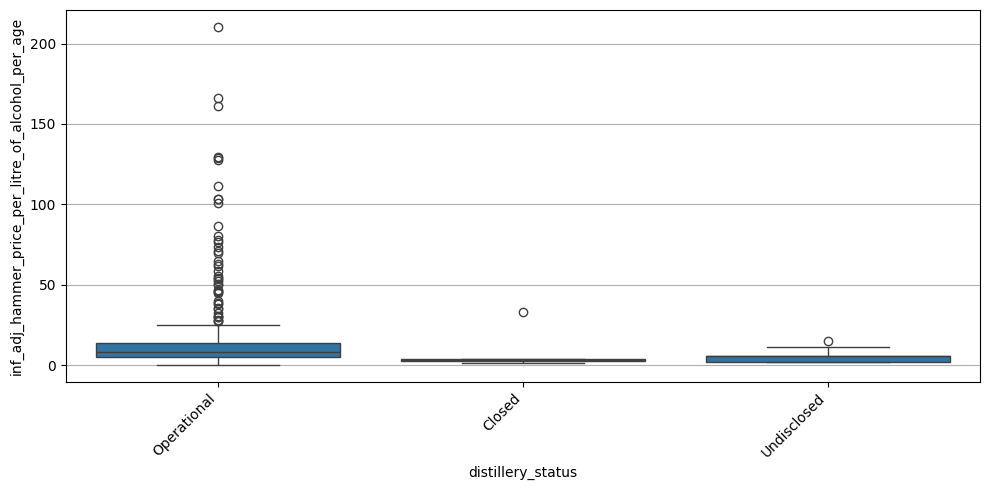

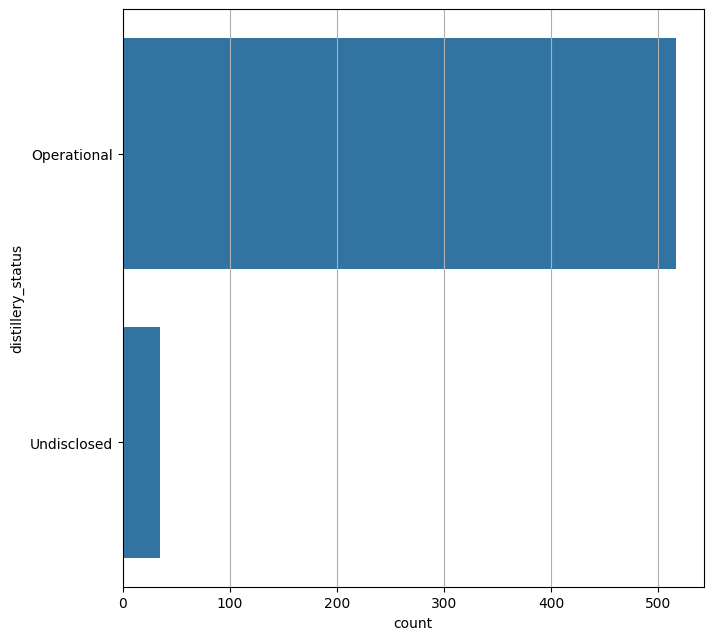

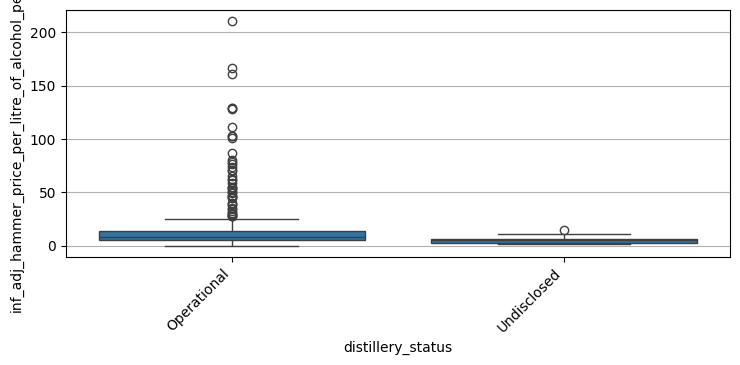

cask_type


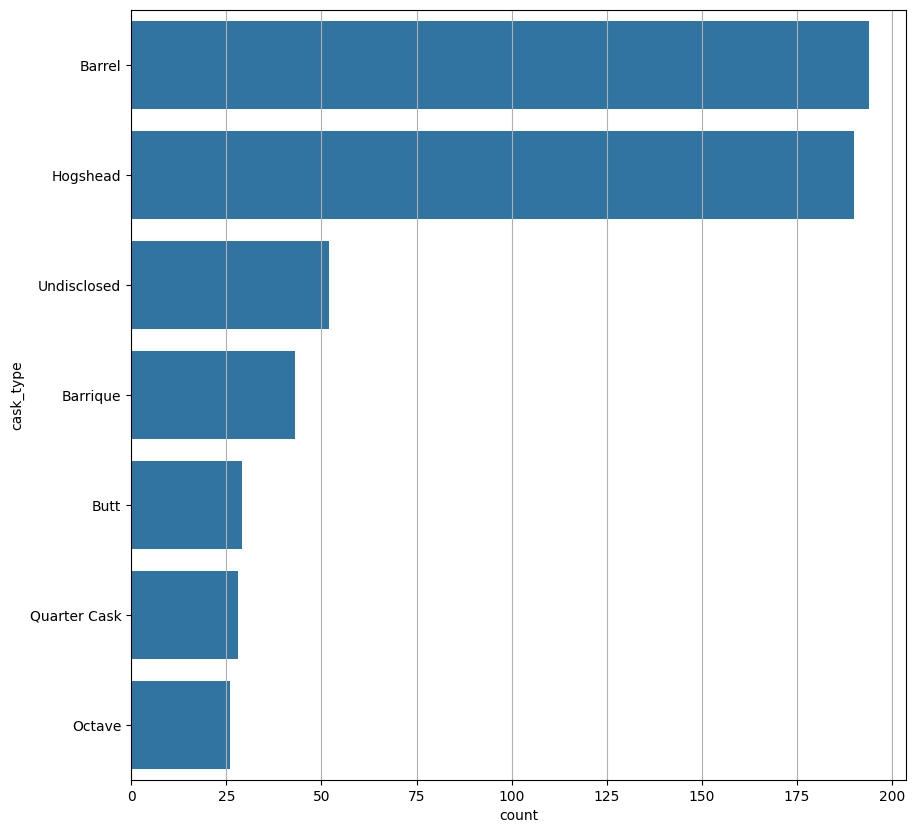

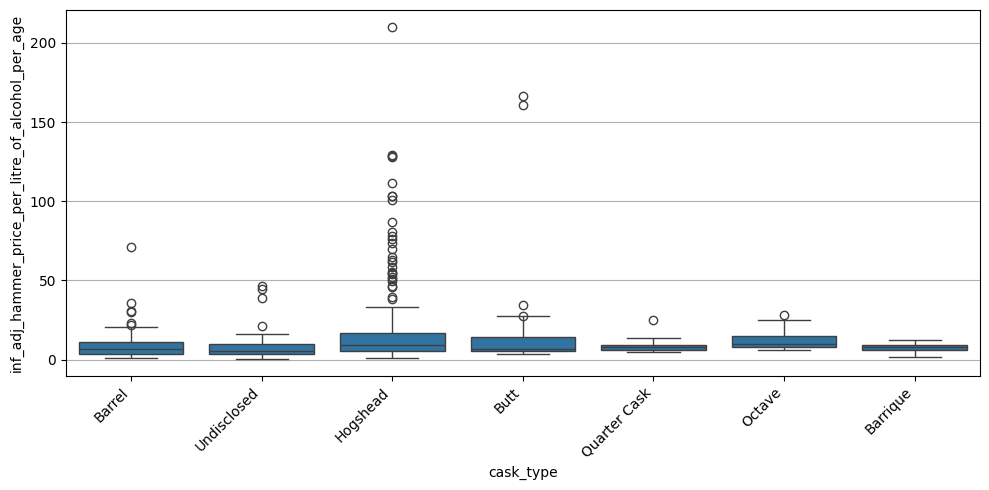

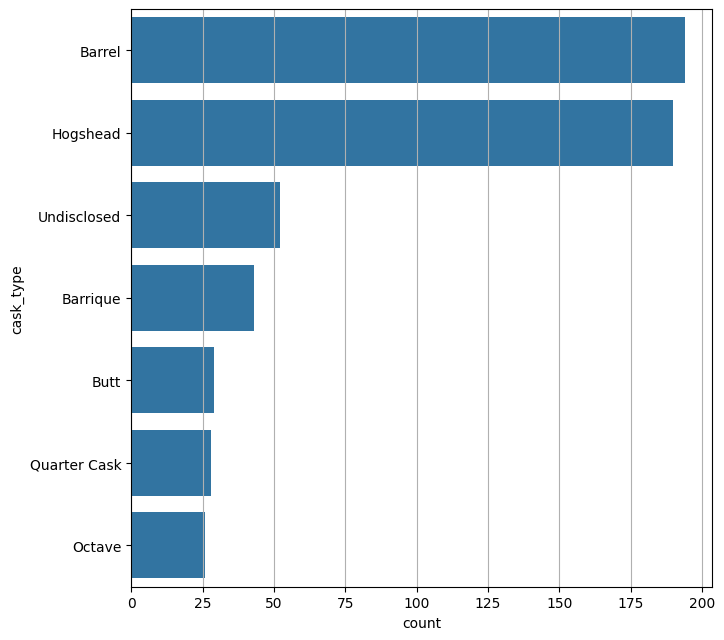

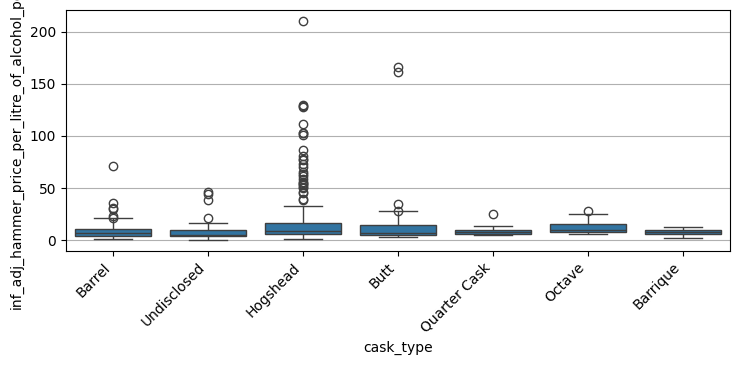

cask_filling


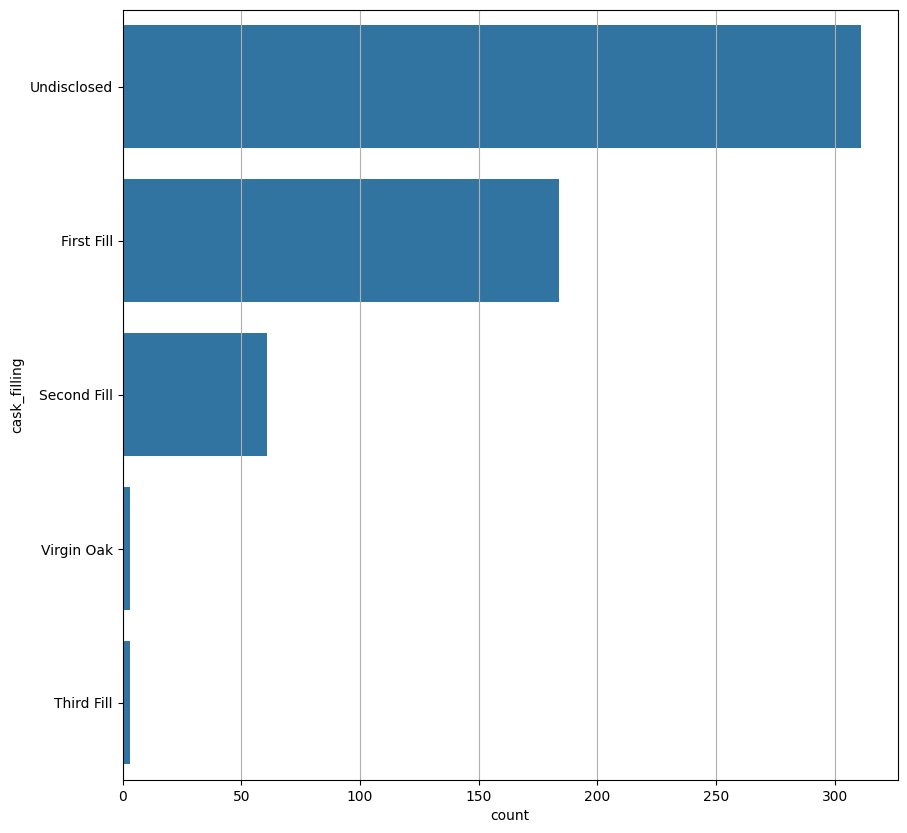

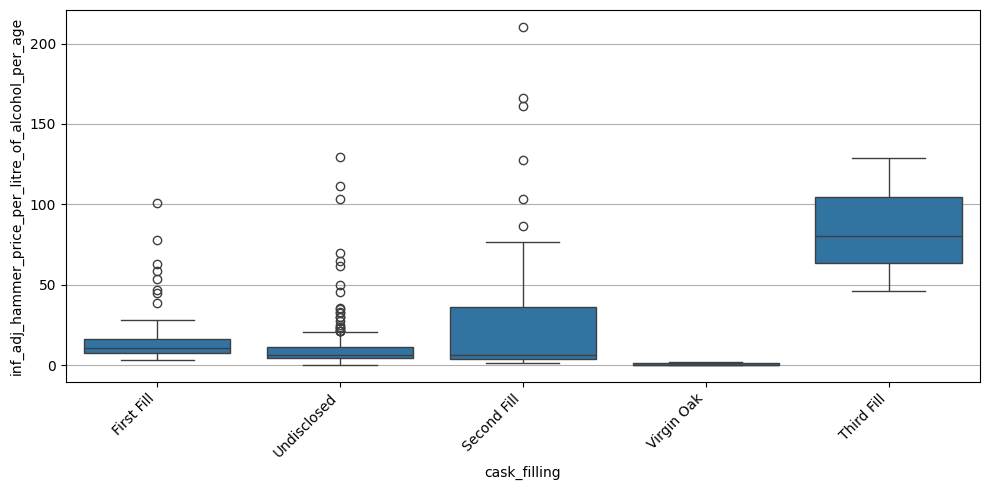

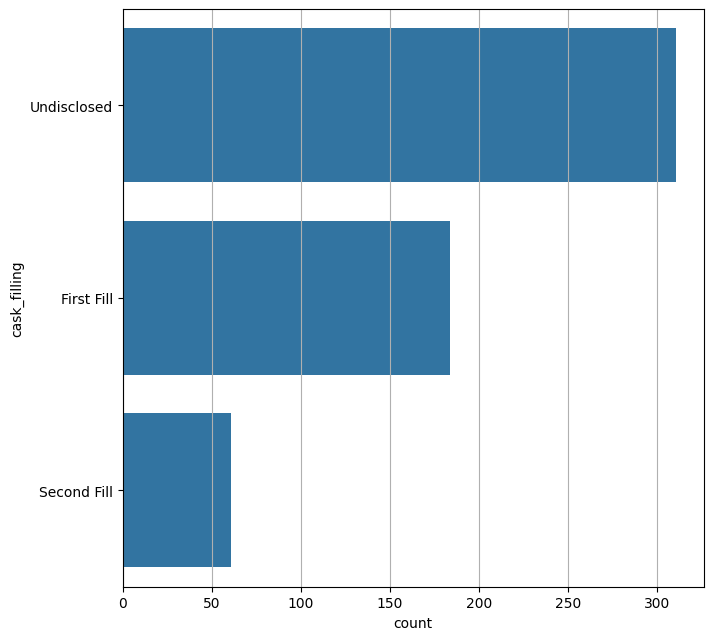

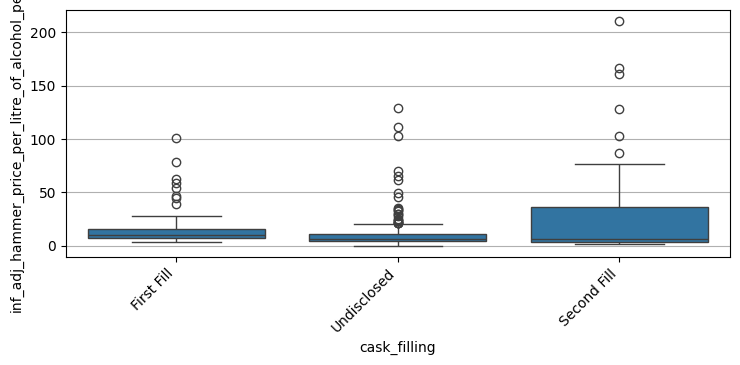

previous_spirit


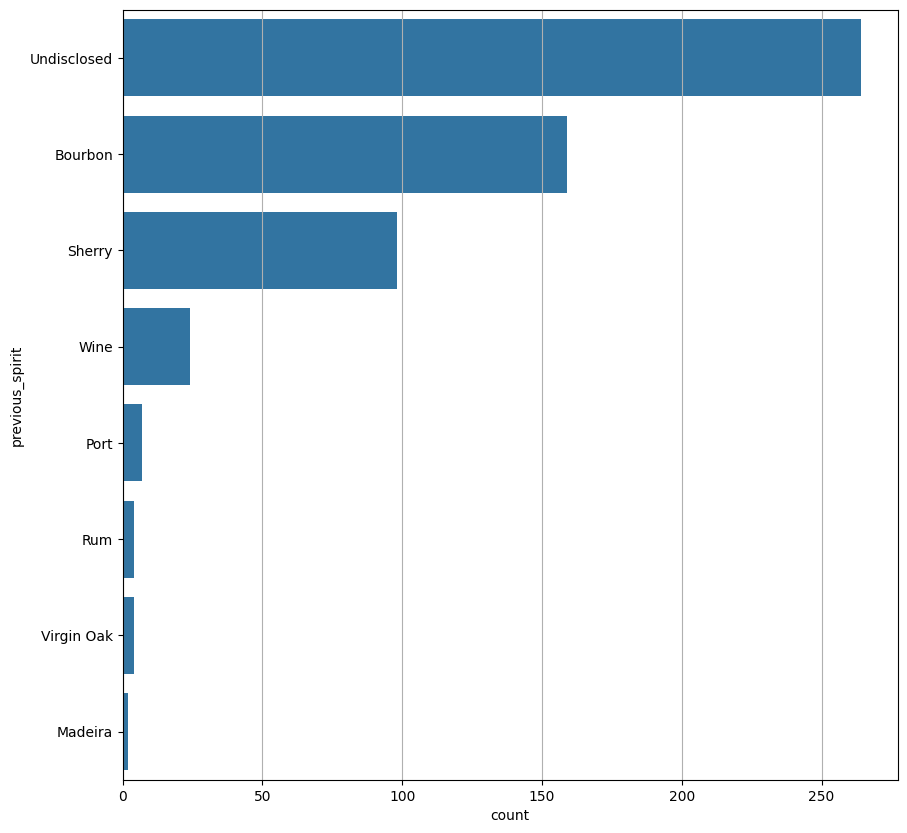

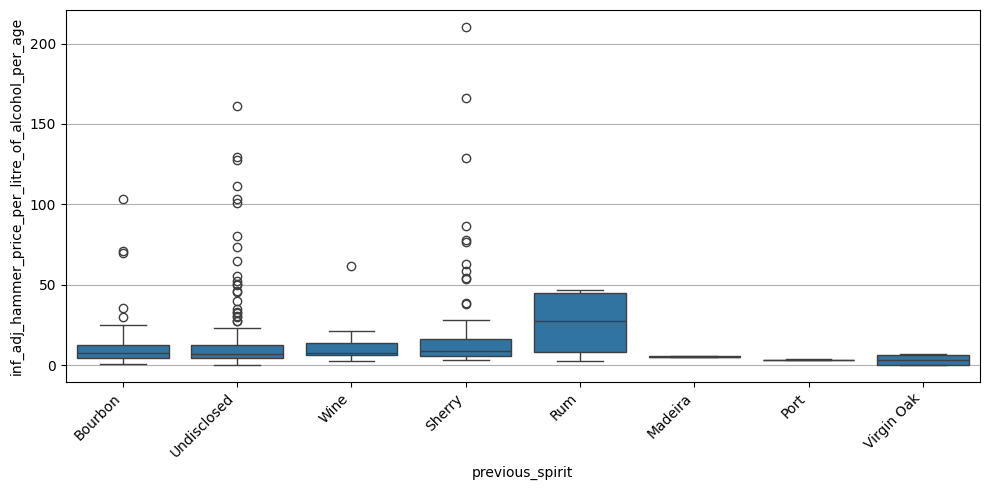

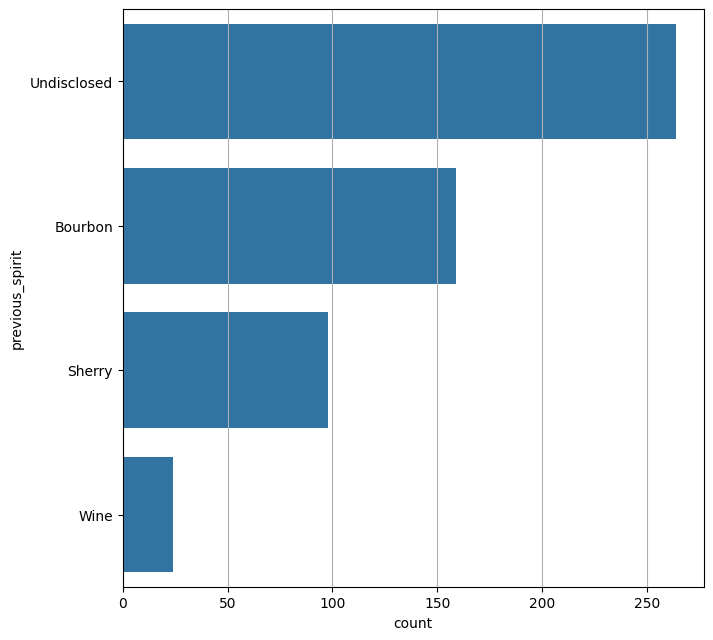

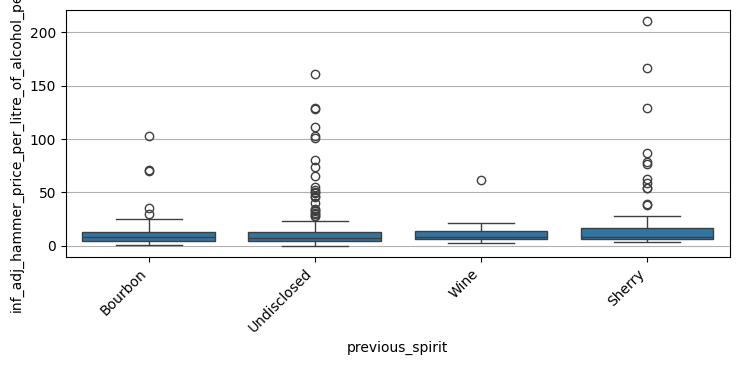

In [271]:
for y_variable in ['inf_adj_hammer_price', 'inf_adj_hammer_price_per_age', 'inf_adj_hammer_price_per_litre_of_alcohol',
                   'inf_adj_hammer_price_per_litre_of_alcohol_per_age']:
    
    print('\n')
    print(y_variable)

    for column in categorical_columns:
        
        print(column)

        if df[column].nunique() > 20:
            fig_length = 22
            fig_height = 15
        else:
            fig_length = 10
            fig_height = 10
        
        plt.figure(figsize=(fig_length, fig_height))
        plt.grid(axis='x')
        sns.countplot(y=df[column], order=df[column].value_counts().index)
        plt.show()

        plt.figure(figsize=(fig_length, fig_height/2))
        plt.grid(axis='both')
        sns.boxplot(x=column, y=y_variable, data=df)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        x_vr_count = df[column].value_counts() / df[column].count()
        significant_categories = x_vr_count[x_vr_count >= 0.02].index.tolist()
        df_significant_categories = df[df[column].isin(significant_categories)]

        plt.figure(figsize=(0.75*fig_length, 0.75*fig_height))
        plt.grid(axis='x')
        sns.countplot(y=df_significant_categories[column], order=df_significant_categories[column].value_counts().index[df_significant_categories[column].value_counts().index.isin(significant_categories)])
        plt.show()

        plt.figure(figsize=(0.75*fig_length, 0.75*fig_height/2))
        plt.grid(axis='both')
        sns.boxplot(x=column, y=y_variable, data=df_significant_categories)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [272]:
pd.crosstab(df['cask_type'], df['previous_spirit'])

previous_spirit  Bourbon  Madeira  Port  Rum  Sherry  Undisclosed  Virgin Oak  \
cask_type                                                                       
Barrel               129        0     0    2       1           60           2   
Barrique               0        1     0    0       5           35           0   
Butt                   0        0     0    0      10           19           0   
Hogshead              17        0     3    0      45          115           0   
Octave                 2        0     0    0      17            1           0   
Quarter Cask           0        1     0    0      13           11           0   
Undisclosed           11        0     4    2       7           23           2   

previous_spirit  Wine  
cask_type              
Barrel              0  
Barrique            2  
Butt                0  
Hogshead           10  
Octave              6  
Quarter Cask        3  
Undisclosed         3

# Data cleaning

In [273]:
df.isna().sum()

auction_date                                           0
distillery                                             0
region                                                 0
country                                                0
strength                                               6
rla                                                   10
bulk_litres                                            8
distillery_status                                      0
cask_type                                              0
cask_filling                                           0
previous_spirit                                        0
age                                                   94
bottles_at_cask_strength                               8
volume_12m                                             0
volume_6m                                              0
volume_3m                                              0
inf_adj_hammer_price                                   0
inf_adj_hammer_price_per_bottle

In [274]:
# Columns with too mutch NaN values
df.drop(columns=['country', 'distillery_status'], inplace=True)

In [275]:
# Unused Y variable
df.drop(columns=['inf_adj_hammer_price_per_bottle_at_cask_strength'], inplace=True)

In [276]:
df = df[df['strength'] >= 40]  # Remove casks with strength less than 40% ABV

In [277]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

auction_date                                         0
distillery                                           0
region                                               0
strength                                             0
rla                                                  0
bulk_litres                                          0
cask_type                                            0
cask_filling                                         0
previous_spirit                                      0
age                                                  0
bottles_at_cask_strength                             0
volume_12m                                           0
volume_6m                                            0
volume_3m                                            0
inf_adj_hammer_price                                 0
inf_adj_hammer_price_per_litre_of_alcohol            0
inf_adj_hammer_price_per_litre_of_alcohol_per_age    0
inf_adj_hammer_price_per_age                         0
dtype: int

# Exploring Y variable

In [278]:
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].hist(df[column], color='blue', alpha=0.5)
    axs[0].set_title(column)

    axs[1].hist(filtered_df[column], color='blue', alpha=0.5)
    axs[1].set_title('No Outliers')

    plt.show()

    return filtered_df

inf_adj_hammer_price


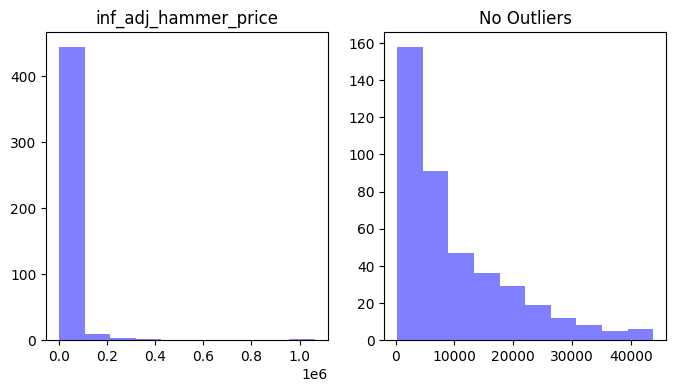

P-value - Shapiro-Wilk: 0.0000


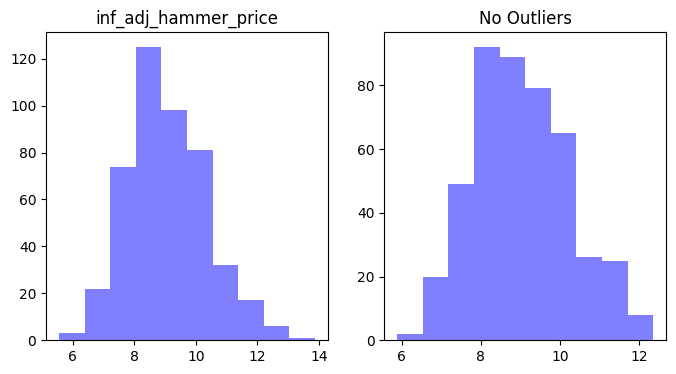

P-value - Shapiro-Wilk: 0.0000


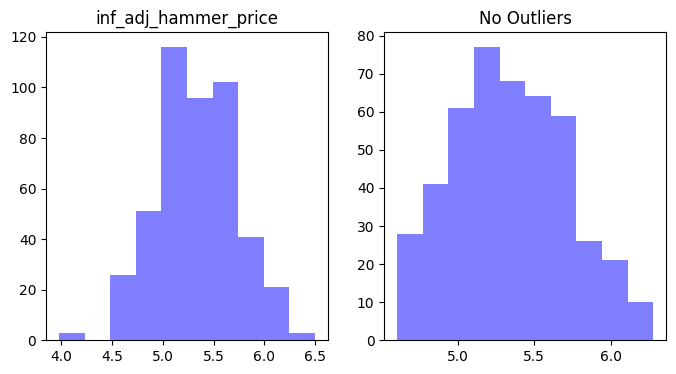

P-value - Shapiro-Wilk: 0.0011


inf_adj_hammer_price_per_litre_of_alcohol


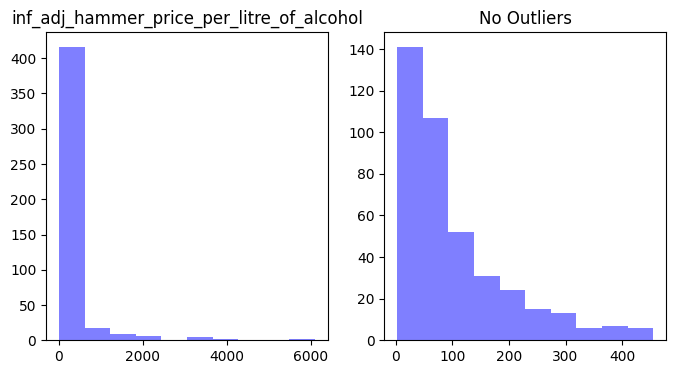

P-value - Shapiro-Wilk: 0.0000


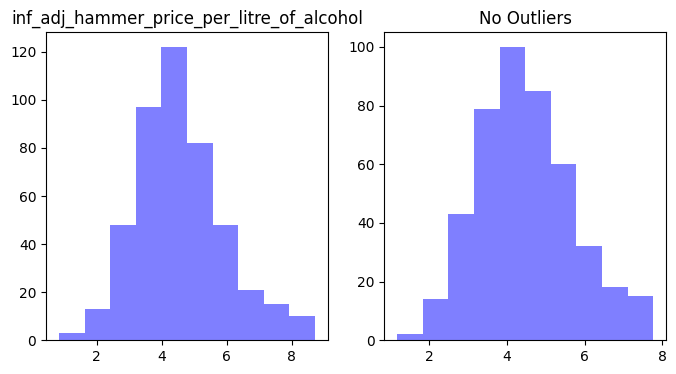

P-value - Shapiro-Wilk: 0.0001


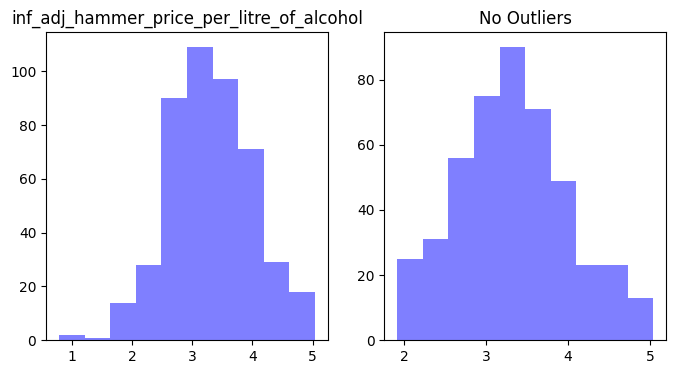

P-value - Shapiro-Wilk: 0.0060


inf_adj_hammer_price_per_age


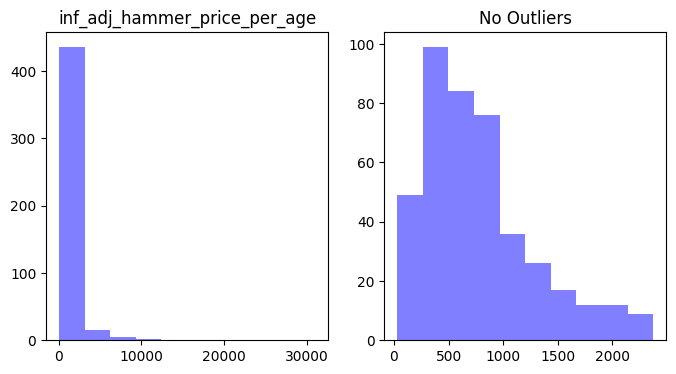

P-value - Shapiro-Wilk: 0.0000


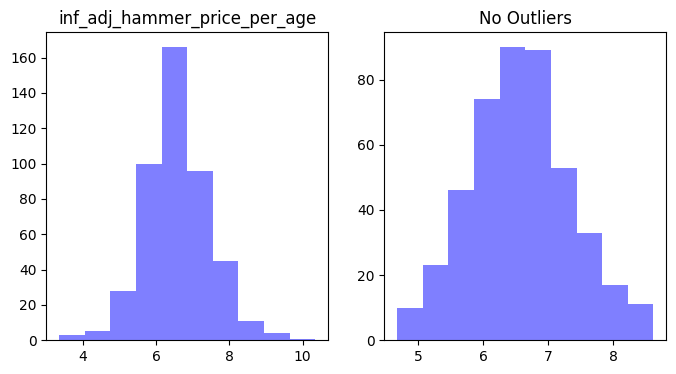

P-value - Shapiro-Wilk: 0.1411


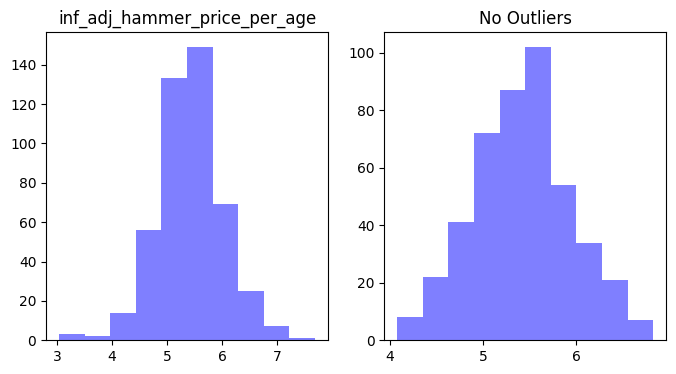

P-value - Shapiro-Wilk: 0.4791


inf_adj_hammer_price_per_litre_of_alcohol_per_age


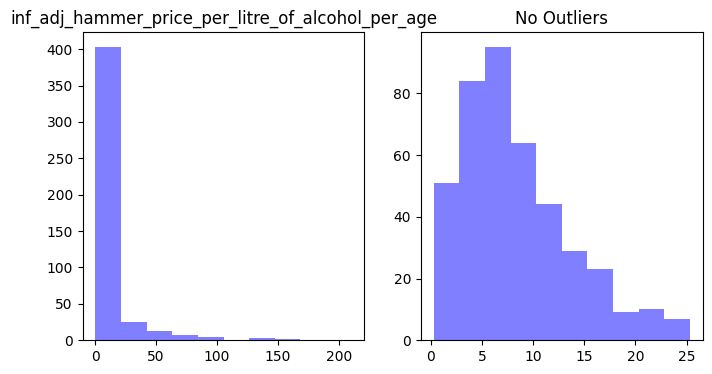

P-value - Shapiro-Wilk: 0.0000


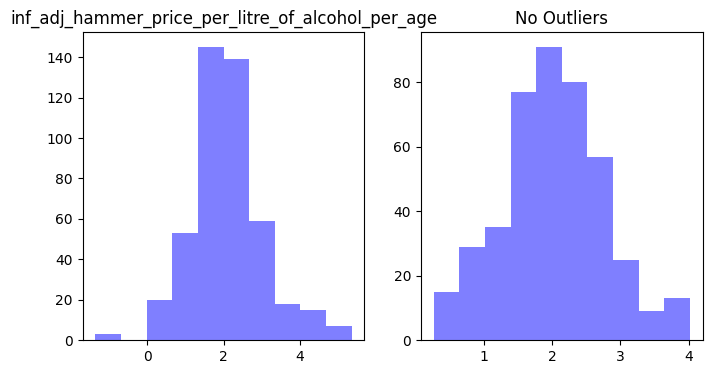

P-value - Shapiro-Wilk: 0.0187


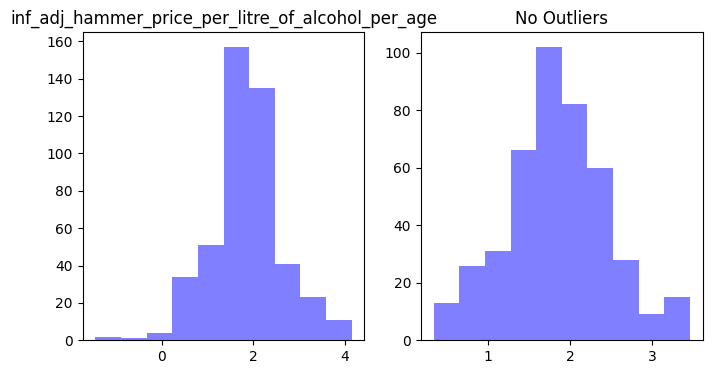

P-value - Shapiro-Wilk: 0.0100




In [279]:
df_correlations = pd.DataFrame()

for y_col in ['inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol',
              'inf_adj_hammer_price_per_age', 'inf_adj_hammer_price_per_litre_of_alcohol_per_age']:
    
    print(y_col)

    # Log Transformation
    y_log = np.log(df[y_col])
    df_log = df.copy()
    df_log[y_col] = y_log

    # Box-Cox Transformation
    y_boxcox, fitted_lambda = boxcox(df[y_col])
    df_boxcox = df.copy()
    df_boxcox[y_col] = y_boxcox

    df_no_outliers = remove_outliers(df, y_col)
    stat, p_value = shapiro(df_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    df_log_no_outliers = remove_outliers(df_log, y_col)
    stat, p_value = shapiro(df_log_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    df_boxcox_no_outliers = remove_outliers(df_boxcox, y_col)
    stat, p_value = shapiro(df_boxcox_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    for x_col in numerical_columns:

        # fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        corr_x_y = round(df_no_outliers[y_col].corr(df_no_outliers[x_col], method='pearson'), 4)

        line_correlation = pd.DataFrame({'y column': [y_col],
                                         'x column': [x_col],
                                         'y transformation': ['None'],
                                         'x transformation': ['None'],
                                         'correlation': [corr_x_y]})
        df_correlations = pd.concat([df_correlations, line_correlation])

        # axs[0].grid()
        # axs[0].scatter(df_no_outliers[x_col], df_no_outliers[y_col], label=y_col, marker='o')
        # axs[0].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        # axs[0].set_xlabel(x_col)
        # axs[0].set_ylabel(y_col)
        # axs[0].legend()

        corr_x_y = round(df_log_no_outliers[y_col].corr(df_log_no_outliers[x_col], method='pearson'), 4)

        line_correlation = pd.DataFrame({'y column': [y_col],
                                         'x column': [x_col],
                                         'y transformation': ['Log'],
                                         'x transformation': ['None'],
                                         'correlation': [corr_x_y]})
        df_correlations = pd.concat([df_correlations, line_correlation])

        # axs[1].grid()
        # axs[1].scatter(df_log_no_outliers[x_col], df_log_no_outliers[y_col], label=y_col, marker='o')
        # axs[1].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        # axs[1].set_xlabel(x_col)
        # axs[1].set_ylabel(f'Log({y_col})')
        # axs[1].legend()

        corr_x_y = round(df_boxcox_no_outliers[y_col].corr(df_boxcox_no_outliers[x_col], method='pearson'), 4)

        line_correlation = pd.DataFrame({'y column': [y_col],
                                         'x column': [x_col],
                                         'y transformation': ['Box-Cox'],
                                         'x transformation': ['None'],
                                         'correlation': [corr_x_y]})
        df_correlations = pd.concat([df_correlations, line_correlation])

        # axs[2].grid()
        # axs[2].scatter(df_boxcox_no_outliers[x_col], df_boxcox_no_outliers[y_col], label=y_col, marker='o')
        # axs[2].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        # axs[2].set_xlabel(x_col)
        # axs[2].set_ylabel(f'BoxCox({y_col})')
        # axs[2].legend()

        # plt.tight_layout()
        # plt.show()

        # fig, axs = plt.subplots(1, 2, figsize=(7, 4))

        x_col_log = np.log(df_log_no_outliers[x_col])

        corr_x_y = round(df_log_no_outliers[y_col].corr(x_col_log, method='pearson'), 4)

        line_correlation = pd.DataFrame({'y column': [y_col],
                                         'x column': [x_col],
                                         'y transformation': ['Log'],
                                         'x transformation': ['Log'],
                                         'correlation': [corr_x_y]})
        df_correlations = pd.concat([df_correlations, line_correlation])

        # axs[0].grid()
        # axs[0].scatter(x_col_log, df_log_no_outliers[y_col], label=y_col, marker='o')
        # axs[0].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        # axs[0].set_xlabel(x_col)
        # axs[0].set_ylabel(f'Log({y_col})')

        x_col_boxcox = pd.Series(boxcox(df_boxcox_no_outliers[x_col])[0], index=df_boxcox_no_outliers.index)

        corr_x_y = round(df_boxcox_no_outliers[y_col].corr(x_col_boxcox, method='pearson'), 4)

        line_correlation = pd.DataFrame({'y column': [y_col],
                                         'x column': [x_col],
                                         'y transformation': ['Box-Cox'],
                                         'x transformation': ['Box-Cox'],
                                         'correlation': [corr_x_y]})
        df_correlations = pd.concat([df_correlations, line_correlation])

        # axs[1].grid()
        # axs[1].scatter(x_col_boxcox, df_boxcox_no_outliers[y_col], label=y_col, marker='o')
        # axs[1].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        # axs[1].set_xlabel(x_col)
        # axs[1].set_ylabel(f'BoxCox({y_col})')

        # plt.tight_layout()
        # plt.show()

    print('\n')

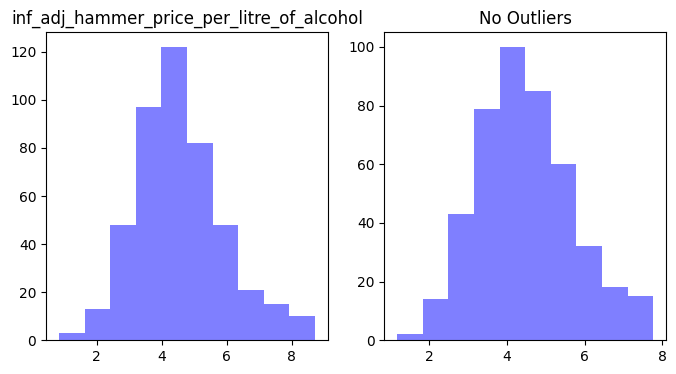

P-value - Shapiro-Wilk: 0.0001


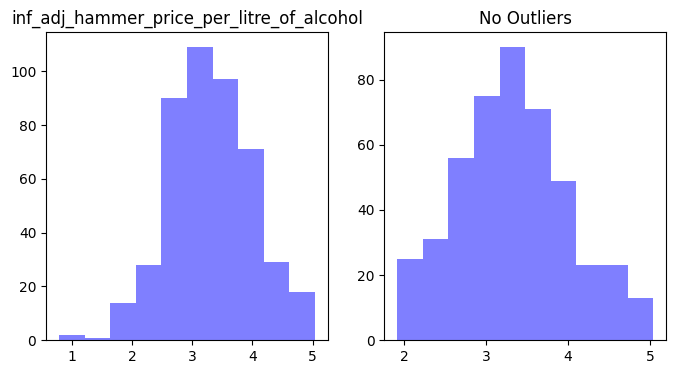

P-value - Shapiro-Wilk: 0.0060


In [280]:
# Log Transformation
y_log = np.log(df['inf_adj_hammer_price_per_litre_of_alcohol'])
df_log = df.copy()
df_log['inf_adj_hammer_price_per_litre_of_alcohol'] = y_log

# Box-Cox Transformation
y_boxcox, fitted_lambda = boxcox(df['inf_adj_hammer_price_per_litre_of_alcohol'])
df_boxcox = df.copy()
df_boxcox['inf_adj_hammer_price_per_litre_of_alcohol'] = y_boxcox

df_log_no_outliers = remove_outliers(df_log, 'inf_adj_hammer_price_per_litre_of_alcohol')
stat, p_value = shapiro(df_log_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'])
print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

df_boxcox_no_outliers = remove_outliers(df_boxcox, 'inf_adj_hammer_price_per_litre_of_alcohol')
stat, p_value = shapiro(df_boxcox_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'])
print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

# Relationship between Y and X variables

In [281]:
df_correlations['correlation type'] = np.where(df_correlations['correlation'] < 0, 'Inverse', 'Direct')
df_correlations['correlation'] = df_correlations['correlation'].abs()

In [282]:
df_correlations.sort_values('correlation', ascending=False).drop_duplicates('x column')

y column  \
0          inf_adj_hammer_price_per_litre_of_alcohol   
0          inf_adj_hammer_price_per_litre_of_alcohol   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0                       inf_adj_hammer_price_per_age   
0                       inf_adj_hammer_price_per_age   
0          inf_adj_hammer_price_per_litre_of_alcohol   
0                               inf_adj_hammer_price   
0                               inf_adj_hammer_price   

                   x column y transformation x transformation  correlation  \
0                       age          Box-Cox             None       0.8110   
0                  strength              Log             None       0.6963   
0                       rla          Box-Cox          Box-Cox       0.4063   
0  bottles_at_cask_strength             None             None       0.3334   
0               bulk_litres             None             None       0.3334   
0                volume_12m              Log              Log       0.3012   
0                 volume_6m              Log              Log       0.1534   
0                 volume_3m              Log             None       0.1005   

  correlation type  
0           Direct  
0          Inverse  
0          Inverse  
0           Direct  
0           Direct  
0          Inverse  
0          Inverse  
0          Inverse

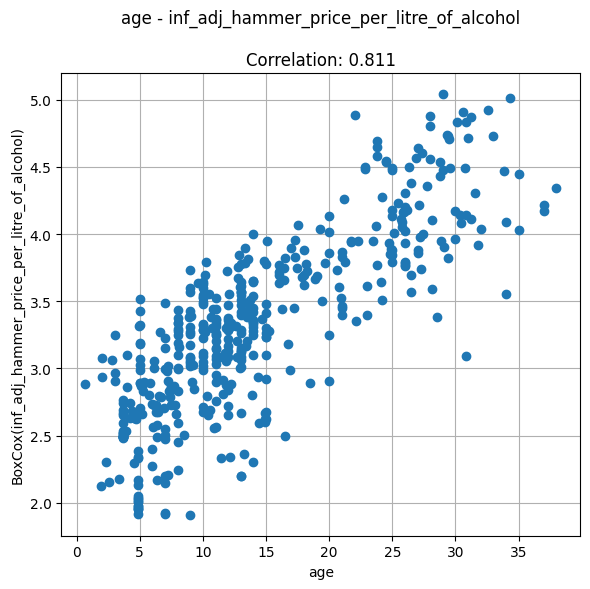

In [283]:
corr = round(df_boxcox_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'].corr(df_boxcox_no_outliers['age'], method='pearson'), 4)

plt.figure(figsize=(6, 6))

plt.grid()
plt.scatter(df_boxcox_no_outliers['age'], df_boxcox_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'], marker='o')
plt.title(f"age - inf_adj_hammer_price_per_litre_of_alcohol\n\nCorrelation: {corr}")
plt.xlabel('age')
plt.ylabel('BoxCox(inf_adj_hammer_price_per_litre_of_alcohol)')

plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

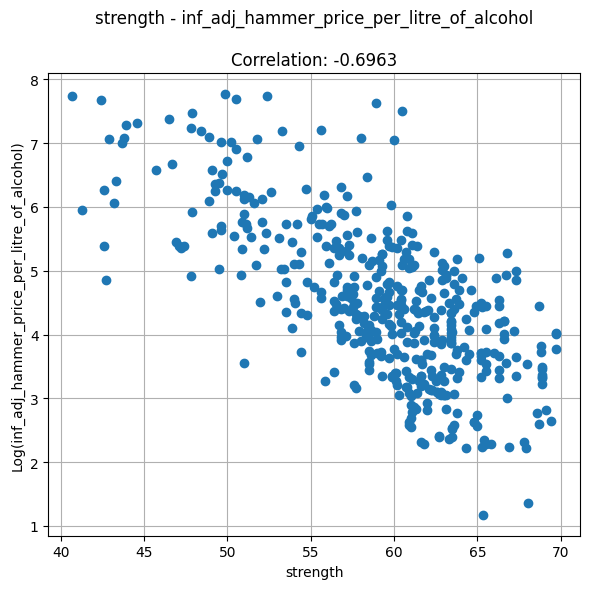

In [284]:
corr = round(df_log_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'].corr(df_log_no_outliers['strength'], method='pearson'), 4)

plt.figure(figsize=(6, 6))

plt.grid()
plt.scatter(df_log_no_outliers['strength'], df_log_no_outliers['inf_adj_hammer_price_per_litre_of_alcohol'], marker='o')
plt.title(f"strength - inf_adj_hammer_price_per_litre_of_alcohol\n\nCorrelation: {corr}")
plt.xlabel('strength')
plt.ylabel('Log(inf_adj_hammer_price_per_litre_of_alcohol)')

plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [285]:
df_correlations[df_correlations['y column'] == 'inf_adj_hammer_price_per_litre_of_alcohol'].sort_values('correlation', ascending=False).drop_duplicates('x column')

y column                  x column  \
0  inf_adj_hammer_price_per_litre_of_alcohol                       age   
0  inf_adj_hammer_price_per_litre_of_alcohol                  strength   
0  inf_adj_hammer_price_per_litre_of_alcohol                       rla   
0  inf_adj_hammer_price_per_litre_of_alcohol                volume_12m   
0  inf_adj_hammer_price_per_litre_of_alcohol  bottles_at_cask_strength   
0  inf_adj_hammer_price_per_litre_of_alcohol               bulk_litres   
0  inf_adj_hammer_price_per_litre_of_alcohol                 volume_6m   
0  inf_adj_hammer_price_per_litre_of_alcohol                 volume_3m   

  y transformation x transformation  correlation correlation type  
0          Box-Cox             None       0.8110           Direct  
0              Log             None       0.6963          Inverse  
0          Box-Cox          Box-Cox       0.3738          Inverse  
0              Log              Log       0.3012          Inverse  
0              Log             None       0.1696          Inverse  
0              Log             None       0.1696          Inverse  
0              Log              Log       0.1423          Inverse  
0              Log             None       0.0790          Inverse

In [286]:
df_correlations[df_correlations['y column'] == 'inf_adj_hammer_price_per_age'].sort_values('correlation', ascending=False).drop_duplicates('x column')

y column                  x column y transformation  \
0  inf_adj_hammer_price_per_age                       age          Box-Cox   
0  inf_adj_hammer_price_per_age  bottles_at_cask_strength             None   
0  inf_adj_hammer_price_per_age               bulk_litres             None   
0  inf_adj_hammer_price_per_age                  strength          Box-Cox   
0  inf_adj_hammer_price_per_age                       rla             None   
0  inf_adj_hammer_price_per_age                volume_12m              Log   
0  inf_adj_hammer_price_per_age                 volume_6m             None   
0  inf_adj_hammer_price_per_age                 volume_3m              Log   

  x transformation  correlation correlation type  
0             None       0.3781           Direct  
0             None       0.3334           Direct  
0             None       0.3334           Direct  
0             None       0.2931          Inverse  
0             None       0.2872           Direct  
0              Log       0.1932          Inverse  
0             None       0.1051          Inverse  
0              Log       0.0902           Direct

In [287]:
df_correlations[df_correlations['y column'] == 'inf_adj_hammer_price_per_litre_of_alcohol_per_age'].sort_values('correlation', ascending=False).drop_duplicates('x column')

y column  \
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   

                   x column y transformation x transformation  correlation  \
0                       age          Box-Cox             None       0.4288   
0                  strength          Box-Cox             None       0.4083   
0                       rla          Box-Cox          Box-Cox       0.4063   
0               bulk_litres          Box-Cox          Box-Cox       0.2791   
0  bottles_at_cask_strength          Box-Cox          Box-Cox       0.2791   
0                volume_12m              Log              Log       0.2341   
0                 volume_3m              Log              Log       0.0875   
0                 volume_6m              Log              Log       0.0868   

  correlation type  
0           Direct  
0          Inverse  
0          Inverse  
0          Inverse  
0          Inverse  
0          Inverse  
0           Direct  
0          Inverse

In [288]:
df_correlations[df_correlations['y column'] == y_col].sort_values('correlation', ascending=False).drop_duplicates('x column')

y column  \
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   
0  inf_adj_hammer_price_per_litre_of_alcohol_per_age   

                   x column y transformation x transformation  correlation  \
0                       age          Box-Cox             None       0.4288   
0                  strength          Box-Cox             None       0.4083   
0                       rla          Box-Cox          Box-Cox       0.4063   
0               bulk_litres          Box-Cox          Box-Cox       0.2791   
0  bottles_at_cask_strength          Box-Cox          Box-Cox       0.2791   
0                volume_12m              Log              Log       0.2341   
0                 volume_3m              Log              Log       0.0875   
0                 volume_6m              Log              Log       0.0868   

  correlation type  
0           Direct  
0          Inverse  
0          Inverse  
0          Inverse  
0          Inverse  
0          Inverse  
0           Direct  
0          Inverse

# Features selection

In [289]:
df = df.drop(columns=['auction_date', 'rla', 'bulk_litres', 'bottles_at_cask_strength', 'volume_12m', 'volume_6m', 'volume_3m'])

In [290]:
df = df.drop(columns=['inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol_per_age', 'inf_adj_hammer_price_per_age'])

In [291]:
df

distillery     region  strength    cask_type cask_filling  \
0              Bruichladdich      Islay     50.40       Barrel   First Fill   
1               Copper House    England     64.80       Barrel  Undisclosed   
2               Copper House    England     64.29  Undisclosed  Undisclosed   
3               Copper House    England     64.29  Undisclosed  Undisclosed   
4                  Tobermory    Islands     50.90     Hogshead  Undisclosed   
..                       ...        ...       ...          ...          ...   
454   Undisclosed Distillery   Lowlands     62.30     Hogshead  Undisclosed   
455   Undisclosed Distillery   Lowlands     62.60     Hogshead  Undisclosed   
456   Undisclosed Distillery   Lowlands     63.10     Hogshead  Undisclosed   
457   Undisclosed Distillery   Lowlands     62.60     Hogshead  Undisclosed   
458  Whitlaw (Highland Park)  Highlands     64.50     Hogshead  Undisclosed   

    previous_spirit    age  inf_adj_hammer_price_per_litre_of_alcohol  
0           Bourbon  20.00                                     254.48  
1           Bourbon  13.00                                      13.78  
2       Undisclosed   9.00                                       9.23  
3       Undisclosed   9.00                                       2.30  
4       Undisclosed  30.00                                     320.60  
..              ...    ...                                        ...  
454          Sherry   3.69                                      22.91  
455          Sherry   3.69                                      22.13  
456          Sherry   3.69                                      21.14  
457          Sherry   3.69                                      22.31  
458     Undisclosed   5.82                                      40.43  

[459 rows x 8 columns]